# Preprocessing Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

C:\Users\m10sa\AppData\Local\Temp\ipykernel_5912\1912864649.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Importing the Dataset

In [2]:
loan_data = pd.read_csv('loan_data.csv') 

C:\Users\m10sa\AppData\Local\Temp\ipykernel_5912\1772530026.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan_data.csv')


In [3]:
df = loan_data.copy()

### Exploratory Data Analysis and Data Cleansing

In [4]:
df.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
len(df.columns)

75

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head()               

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00        

In [11]:
df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
466280  8598660    1440975      18400        18400          18400.0   
466281  9684700   11536848      22000        22000          22000.0   
466282  9584776   11436914      20700        20700          20700.0   
466283  9604874   11457002       2000         2000           2000.0   
466284  9199665   11061576      10000        10000           9975.0   

              term  int_rate  installment grade sub_grade  \
466280   60 months     14.47       432.64     C        C2   
466281   60 months     19.97       582.50     D        D5   
466282   60 months     16.99       514.34     D        D1   
466283   36 months      7.90        62.59     A        A4   
466284   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
466280  https://www.lendingclub.com/browse/loanDetail....   
466281  https://www.lendingclub.com/browse/loanDetail....   
466282  https://www.lendingclub.com/browse/loanDetail....   
466283  https://www.lendingclub.com/browse/loanDetail....   
466284  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
466280                                                NaN  debt_consolidation   
466281                                                NaN  debt_consolidation   
466282    Borrower added on 12/06/13 > I am going to c...  debt_consolidation   
466283                                                NaN         credit_card   
466284    Borrower added on 12/04/13 > I will like a l...               other   

                          title zip_code addr_state    dti  delinq_2yrs  \
466280       Debt consolidation    773xx         TX  19.85          0.0   
466281       Debt consolidation    377xx         TN  18.45          0.0   
466282       Debt consolidation    458xx         OH  25.65          0.0   
466283  Credit card refinancing    913xx         CA   5.39          3.0   
466284                    Other    950xx         CA  22.78          1.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
466280           Apr-03             2.0                     NaN   
466281           Jun-97             5.0                     NaN   
466282           Dec-01             2.0                    65.0   
466283           Feb-03             1.0                    13.0   
466284           Feb-00             0.0                     9.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
466280                     NaN      18.0      0.0      23208        77.6   
466281                   116.0      18.0      1.0      18238        46.3   
466282                     NaN      18.0      0.0       6688        51.1   
466283                     NaN      21.0      0.0      11404        21.5   
466284                     NaN       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
466280       36.0                   w   12574.00       12574.00  10383.360000

In [12]:
df.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [13]:
df_description = pd.read_csv('description.csv')#, index_col='LoanStatNew')
df_description = df_description.iloc[:, 1:]
df_description.set_index('LoanStatNew', inplace=True)
df_description

Description
LoanStatNew                                                               
addr_state               The state provided by the borrower in the loan...
annual_inc               The self-reported annual income provided by th...
annual_inc_joint         The combined self-reported annual income provi...
application_type         Indicates whether the loan is an individual ap...
collection_recovery_fee                     post charge off collection fee
...                                                                    ...
total_cu_tl                                       Number of finance trades
inq_last_12m                  Number of credit inquiries in past 12 months
acc_now_delinq           The number of accounts on which the borrower i...
tot_coll_amt                            Total collection amounts ever owed
tot_cur_bal                          Total current balance of all accounts

[78 rows x 1 columns]

In [14]:
pd.set_option('display.max_colwidth', None)   
pd.set_option('display.max_rows', None)

In [15]:
df_description

Description
LoanStatNew                                                                                                                                                                                                                                    
addr_state                                                                                                                                                                           The state provided by the borrower in the loan application
annual_inc                                                                                                                                                        The self-reported annual income provided by the borrower during registration.
annual_inc_joint                                                                                                                                      The combined self-reported annual income provided by the co-borrowers during registration
application_type                                                                                                                           Indicates whether the loan is an individual application or a joint application with two co-borrowers
collection_recovery_fee                                                                                                                                                                                          post charge off collection fee
collections_12_mths_ex_med                                                                                                                                                     Number of collections in 12 months excluding medical collections
delinq_2yrs                                                                                                                        The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
desc                                                                                                                                                                                                  Loan description provided by the borrower
dti                                    A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
dti_joint                    A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
earliest_cr_line                                                                                                                                                              The month the borrower's earliest reported credit line was opened
emp_length                                                                                                   Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
emp_title                                                                                                                                                                   The job title supplied by the Borrower when applying for the loan.*
fico_range_high                                                                                                                                                    The upper boundary range the borrower’s FICO at loan origination belongs to.
fico_range_low                                                                                                                                                     The lower boundary range the borrower’s FICO at loan origination belongs to.
funded_amnt                                                                                                                                         

In [16]:
print(df_description.loc['addr_state']['Description'])

The state provided by the borrower in the loan application


In [17]:
def feat_info(feature):
    print('\033[1m' + df_description.loc[feature]['Description'] + '\033[0m')

In [18]:
feat_info('emp_length')  # Print bold text in Python

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [19]:
df['emp_length'].head(10)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
5      3 years
6      8 years
7      9 years
8      4 years
9     < 1 year
Name: emp_length, dtype: object

In [20]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [21]:
df['emp_length'].isnull().sum()

21008

In [22]:
df['emp_length_int'] = df['emp_length'].str.replace('+ years', '')     
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', '0')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')

In [23]:
df['emp_length_int'].head(10)

0    10
1     0
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     0
Name: emp_length_int, dtype: object

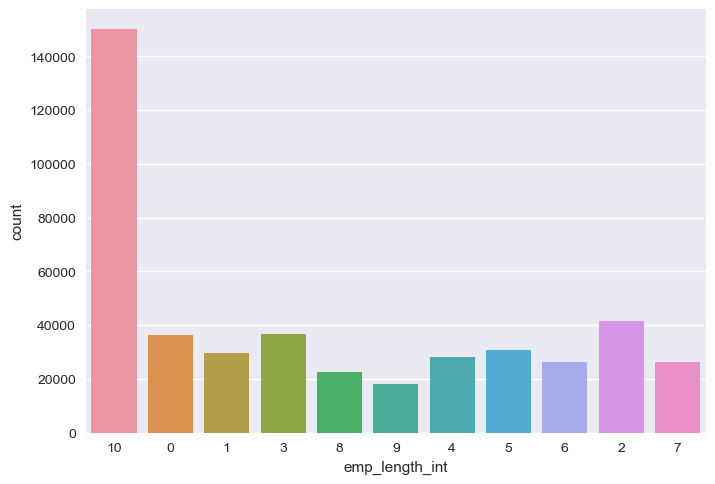

In [24]:
sns.countplot(x='emp_length_int', data=df);

In [25]:
df['emp_length_int'] = pd.to_numeric(df['emp_length_int'])
df[['emp_length','emp_length_int']].head(20)

emp_length  emp_length_int
0   10+ years            10.0
1    < 1 year             0.0
2   10+ years            10.0
3   10+ years            10.0
4      1 year             1.0
5     3 years             3.0
6     8 years             8.0
7     9 years             9.0
8     4 years             4.0
9    < 1 year             0.0
10    5 years             5.0
11  10+ years            10.0
12   < 1 year             0.0
13    3 years             3.0
14    3 years             3.0
15   < 1 year             0.0
16    4 years             4.0
17  10+ years            10.0
18     1 year             1.0
19    6 years             6.0

In [26]:
df['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [27]:
df.drop('emp_length', axis=1, inplace=True)

In [28]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [29]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [30]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')      
df['earliest_cr_line_date'].head()      

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [31]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head()

0    389.0
1    221.0
2    190.0
3    258.0
4    259.0
Name: mths_since_earliest_cr_line, dtype: float64

In [32]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        236.142031
std          92.270010
min        -600.000000
25%         181.000000
50%         222.000000
75%         281.000000
max         577.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [33]:
df.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][df['mths_since_earliest_cr_line'] < 0].head()

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580           Sep-62            2062-09-01                       -526.0
1770           Sep-68            2068-09-01                       -597.0
2799           Sep-64            2064-09-01                       -550.0
3282           Sep-67            2067-09-01                       -585.0
3359           Feb-65            2065-02-01                       -555.0

In [34]:
df[df['mths_since_earliest_cr_line'] < 0 ]['mths_since_earliest_cr_line'].count()

1169

In [35]:
df['mths_since_earliest_cr_line'] = np.where(df['mths_since_earliest_cr_line'] < 0, (df['mths_since_earliest_cr_line'] + 1200), df['mths_since_earliest_cr_line'])
# We add 1200 months for 100 years where df['mths_since_earliest_cr_line'] < 0

In [36]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.150679
std          85.602669
min          73.000000
25%         182.000000
50%         223.000000
75%         281.000000
max         894.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [37]:
df.drop(columns=['earliest_cr_line','earliest_cr_line_date'], inplace=True)

In [38]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [39]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [40]:
df['term_int'] = pd.to_numeric(df['term'].str.replace(' months', ''))
df['term_int'].head()

0    36
1    60
2    36
3    36
4    60
Name: term_int, dtype: int64

In [41]:
df.drop('term', axis=1, inplace=True)

In [42]:
feat_info('issue_d')

The month which the loan was funded


In [43]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [44]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d_date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d_date, dtype: datetime64[ns]

In [45]:
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2023-01-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [46]:
df['mths_since_issue_d'].head()

0    131.0
1    131.0
2    131.0
3    131.0
4    131.0
Name: mths_since_issue_d, dtype: float64

In [47]:
df['mths_since_issue_d'].isnull().sum()

0

In [48]:
df['mths_since_issue_d'] = df['mths_since_issue_d'].astype('int64')
df['mths_since_issue_d'].head()

0    131
1    131
2    131
3    131
4    131
Name: mths_since_issue_d, dtype: int64

In [49]:
df.drop(columns=['issue_d','issue_d_date'], inplace=True)

 # Discrete Variables 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_title                    438697 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

In [51]:
feat_info('addr_state')

The state provided by the borrower in the loan application


In [52]:
df['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [53]:
feat_info('zip_code')

The first 3 numbers of the zip code provided by the borrower in the loan application.


In [54]:
df['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

In [55]:
len(df['zip_code'].unique())

888

In [56]:
feat_info('grade')

LC assigned loan grade


In [57]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [58]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [59]:
df['emp_title'].tail(10)

466275                                  manager
466276                                  MANAGER
466277                                sales rep
466278                                MecÃ¡nica
466279                   Director of Operations
466280                       Financial Advisor 
466281    Chief of Interpretation (Park Ranger)
466282                                   patrol
466283                     Server Engineer Lead
466284                                      NaN
Name: emp_title, dtype: object

In [60]:
len(df['emp_title'].unique())

205476

### Finding missing values and filling 

In [61]:
df.isnull().sum()           

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc    

In [62]:
feat_info('annual_inc')

The self-reported annual income provided by the borrower during registration.


In [63]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

In [64]:
df['total_rev_hi_lim'].head()       # We don't include this feature in our PD model

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: total_rev_hi_lim, dtype: float64

In [65]:
df['acc_now_delinq'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)   
df['inq_last_6mths'].fillna(0, inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace = True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)

### Creating Dummy Variables from Discrete Variables 

In [66]:
df_dummies = [pd.get_dummies(df['addr_state'], prefix='addr_state', prefix_sep=':', dtype=int),
             pd.get_dummies(df['grade'], prefix='grade', prefix_sep =':', dtype=int),
             pd.get_dummies(df['home_ownership'], prefix='home_ownership', prefix_sep=':', dtype=int),
             pd.get_dummies(df['initial_list_status'], prefix='initial_list_status', prefix_sep=':', dtype=int),
             pd.get_dummies(df['loan_status'], prefix='loan_status', prefix_sep=':', dtype=int),
             pd.get_dummies(df['purpose'], prefix='purpose', prefix_sep=':', dtype=int),
             pd.get_dummies(df['verification_status'], prefix='verification_status', prefix_sep=':', dtype=int)]

In [67]:
df_dummies = pd.concat(df_dummies, axis=1)     
df_dummies.head()

addr_state:AK  addr_state:AL  addr_state:AR  addr_state:AZ  addr_state:CA  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              1   
4              0              0              0              0              0   

   addr_state:CO  addr_state:CT  addr_state:DC  addr_state:DE  addr_state:FL  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   addr_state:GA  addr_state:HI  addr_state:IA  addr_state:ID  addr_state:IL  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              0   

   addr_state:IN  addr_state:KS  addr_state:KY  addr_state:LA  addr_state:MA  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   addr_state:MD  addr_state:ME  addr_state:MI  addr_state:MN  addr_state:MO  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   addr_state:MS  addr_state:MT  addr_state:NC  addr_state:NE  addr_state:NH  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   addr_state:NJ  addr_state:NM  addr_state:NV  addr_state:NY  addr_state:OH  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   addr_state:OK  addr_state:OR  addr_state:PA  addr_state:RI  addr_state:SC  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              1              0              0              0   

   addr_state:SD  addr_state:TN  addr_state:TX  addr_state:UT  addr_state:VA  \
0              0              0              0              0              

In [68]:
df = pd.concat([df, df_dummies], axis=1)

# PD Model 

### Data preparation

In [69]:
feat_info('loan_status')

Current status of the loan


In [70]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [71]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [72]:
df['loan_status'].value_counts() / df['loan_status'].count()    

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [73]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# 1 for good (non-defaulted) and 0 for bad (defaulted)

In [74]:
df[['loan_status','good_bad']].head(10)    

loan_status  good_bad
0   Fully Paid         1
1  Charged Off         0
2   Fully Paid         1
3   Fully Paid         1
4      Current         1
5   Fully Paid         1
6      Current         1
7   Fully Paid         1
8  Charged Off         0
9  Charged Off         0

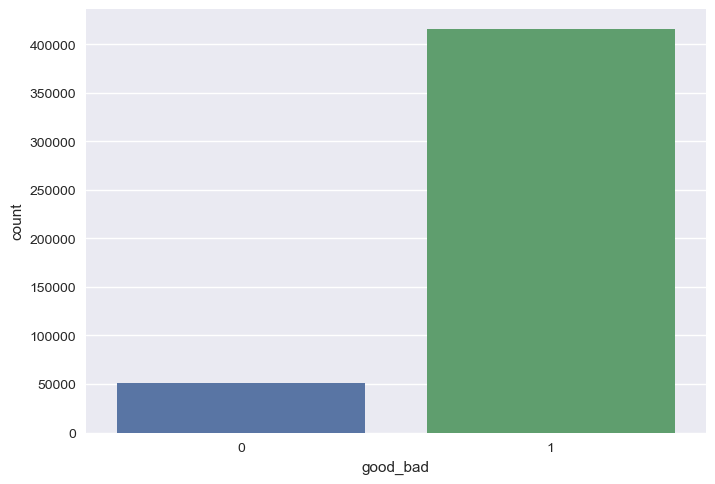

In [75]:
sns.countplot(x='good_bad', data=df);

In [76]:
df = df[df['loan_status'] != 'Current']

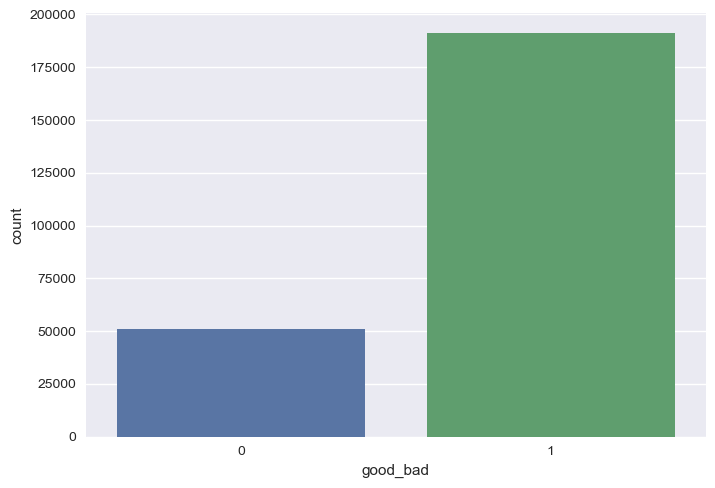

In [77]:
sns.countplot(x='good_bad', data=df);    # imbalanced data

### Data Splitting

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('good_bad', axis=1), df['good_bad'], test_size=0.25, random_state=42)

In [80]:
X_train.shape

(181544, 165)

In [81]:
X_test.shape

(60515, 165)

In [82]:
y_train.shape

(181544,)

In [83]:
df_pre_X = X_train
df_pre_y = y_train

# df_pre_X = X_test
# df_pre_y = y_test

### Preprocessing Discrete variables

In [84]:
def woe_discrete(df, variable_name, good_bad_df):
    df = pd.concat([df[variable_name], good_bad_df], axis=1)
    df = pd.concat([df.groupby(variable_name, as_index=False)[df.columns[1]].count(),              
                   df.groupby(variable_name, as_index=False)[df.columns[1]].mean()], axis=1)     
    
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [variable_name, 'n_obs', 'prop_good']          
                   
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'] .sum()              
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()               
    
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values('WoE')         
    df = df.reset_index(drop=True)              
                             
                   
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE']).sum()
    
    return df              

In [85]:
df_w = woe_discrete(df_pre_X, 'grade', df_pre_y)    
df_w

grade  n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0     G   1490   0.532215    0.008207    793.0    697.0     0.005528   
1     F   5667   0.573496    0.031216   3250.0   2417.0     0.022656   
2     E  13906   0.626348    0.076599   8710.0   5196.0     0.060719   
3     D  29567   0.701289    0.162864  20735.0   8832.0     0.144547   
4     C  46518   0.769208    0.256235  35782.0  10736.0     0.249442   
5     B  54554   0.852348    0.300500  46499.0   8055.0     0.324152   
6     A  29842   0.927518    0.164379  27679.0   2163.0     0.192955   

   prop_n_bad       WoE        IV  
0    0.018296 -1.196825  0.378457  
1    0.063445 -1.029735  0.378457  
2    0.136392 -0.809281  0.378457  
3    0.231835 -0.472422  0.378457  
4    0.281814 -0.122021  0.378457  
5    0.211440  0.427274  0.378457  
6    0.056778  1.223315  0.378457

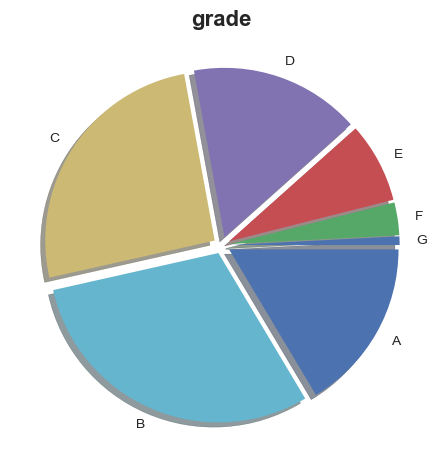

In [86]:
plt.pie(explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], x=df_w['n_obs'], labels=df_w['grade'], shadow=True, labeldistance=1.1)
plt.title('grade', fontdict={'fontweight':'bold', 'fontsize':16})
plt.show()

In [87]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

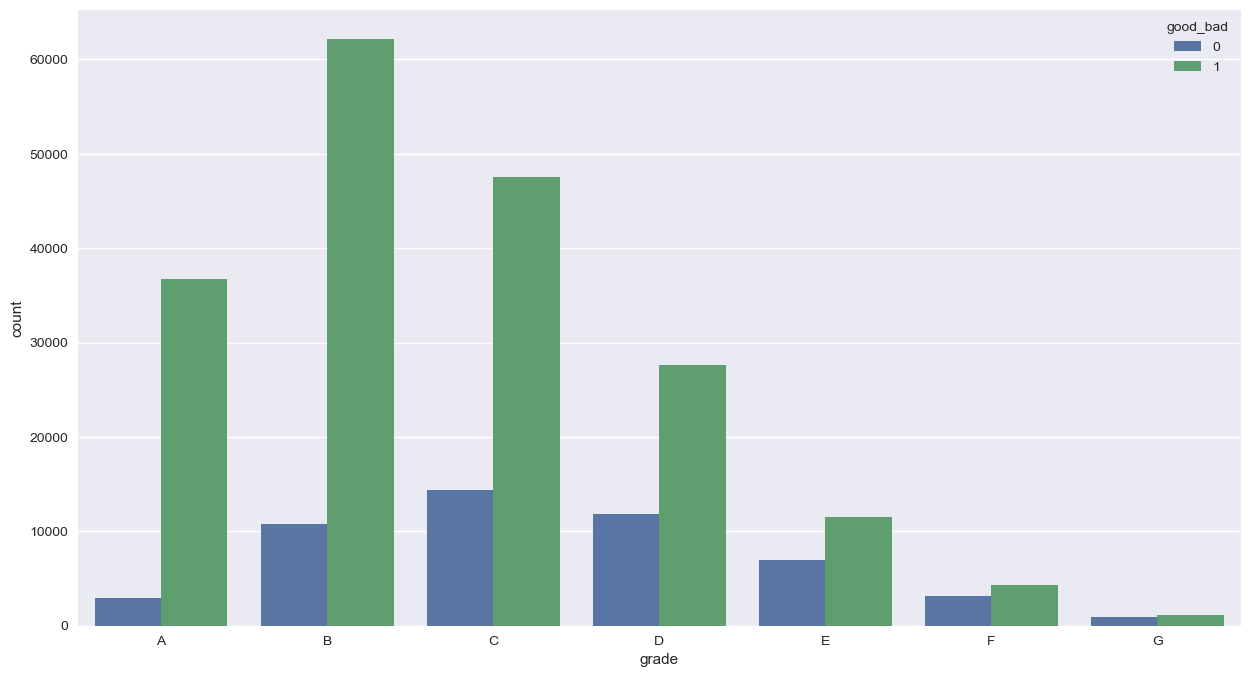

In [88]:
plt.figure(figsize=(15,8))
sns.countplot(x='grade', data=df, hue='good_bad', order=sorted(df['grade'].unique()));

### Preprocessing Discrete Variables: Plotting by Weight of Evidence

In [89]:
def plot_by_woe(df_WoE, rotation_of_xticks=0, fontsize_ticks=10):    # rotation_of_xticks = 0 by default
    x = np.array(df_WoE.iloc[:, 0].apply(str))            
    y = df_WoE['WoE']
    
    plt.figure(figsize=(15, 8))                         
    plt.plot(x, y, marker='o', linestyle='--', color='b')  
    plt.xlabel(df_WoE.columns[0], size=14)
    plt.ylabel('Weight of Evidence', size=14)
    plt.xticks(fontsize=fontsize_ticks, rotation = rotation_of_xticks)
    plt.yticks(fontsize=fontsize_ticks)
    plt.title('Weight of Evidence by ' + df_WoE.columns[0], fontdict={'fontweight':'bold', 'fontsize':16})  

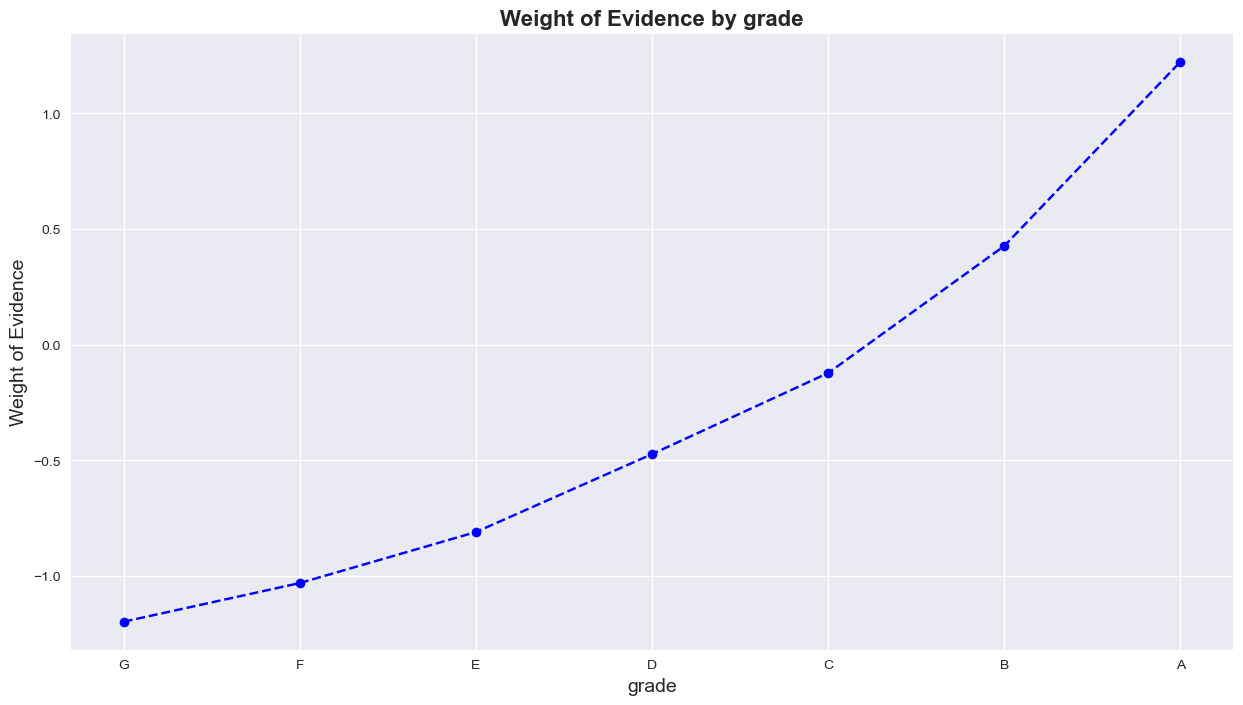

In [90]:
plot_by_woe(df_w)

### Preprocessing Discrete Variables: Coarse Classing and Creating Dummy Variables 

In [91]:
df_w = woe_discrete(df_pre_X, 'home_ownership', df_pre_y)
df_w

home_ownership  n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0           RENT  76850   0.769187    0.423313  59112.0  17738.0     0.412080   
1           NONE     35   0.771429    0.000193     27.0      8.0     0.000188   
2          OTHER    138   0.775362    0.000760    107.0     31.0     0.000746   
3            OWN  15450   0.780906    0.085103  12065.0   3385.0     0.084107   
4       MORTGAGE  89070   0.809880    0.490625  72136.0  16934.0     0.502872   
5            ANY      1   1.000000    0.000006      1.0      0.0     0.000007   

   prop_n_bad       WoE   IV  
0    0.465613 -0.122139  inf  
1    0.000210 -0.109468  inf  
2    0.000814 -0.087022  inf  
3    0.088854 -0.054909  inf  
4    0.444509  0.123366  inf  
5    0.000000       inf  inf

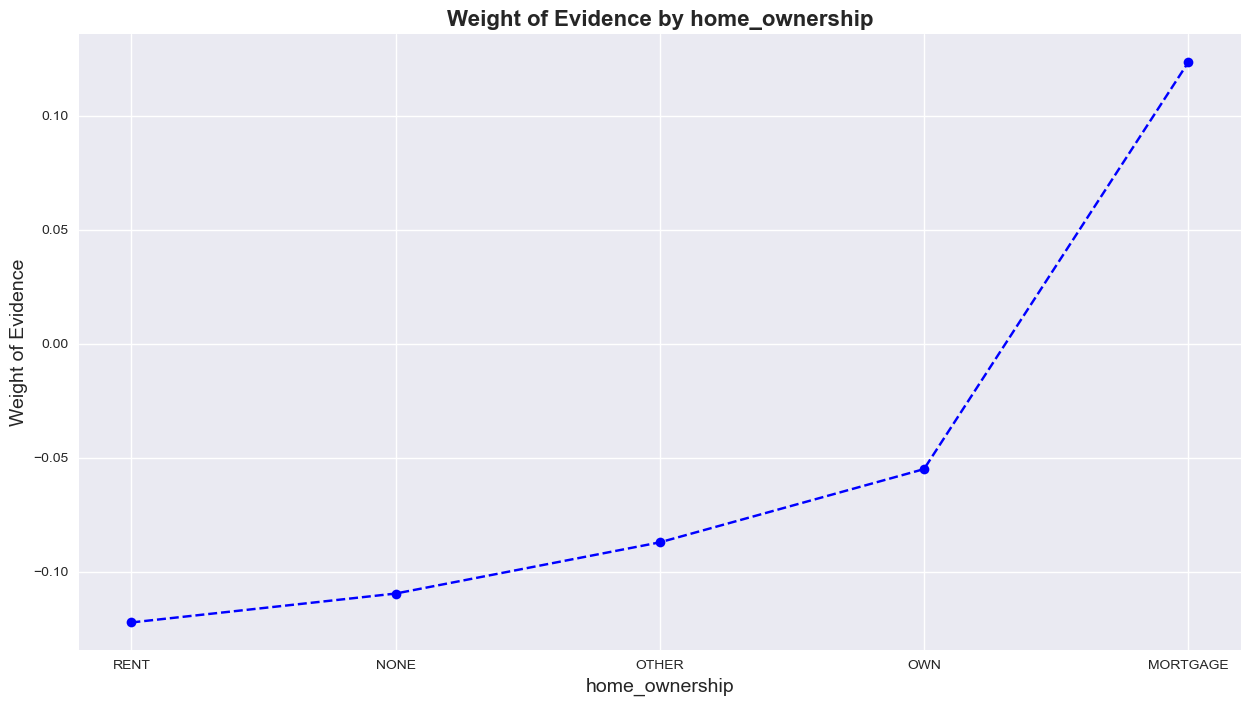

In [92]:
plot_by_woe(df_w)

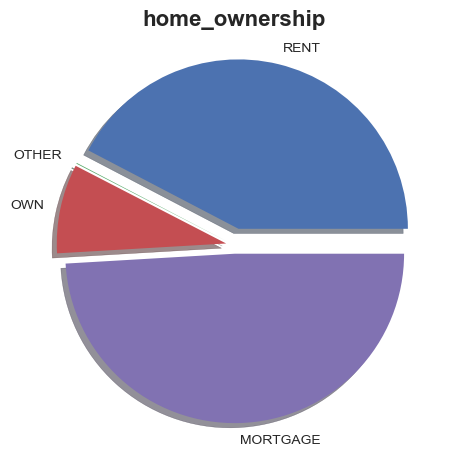

In [93]:
plt.pie(explode=[0.1, 0.05, 0.05, 0.05], x=df_w.loc[[0,2,3,4], 'n_obs'], labels=df_w.loc[[0,2,3,4], 'home_ownership'], shadow=True, labeldistance=1.1)
plt.title('home_ownership', fontdict={'fontweight':'bold', 'fontsize':16})
plt.show()

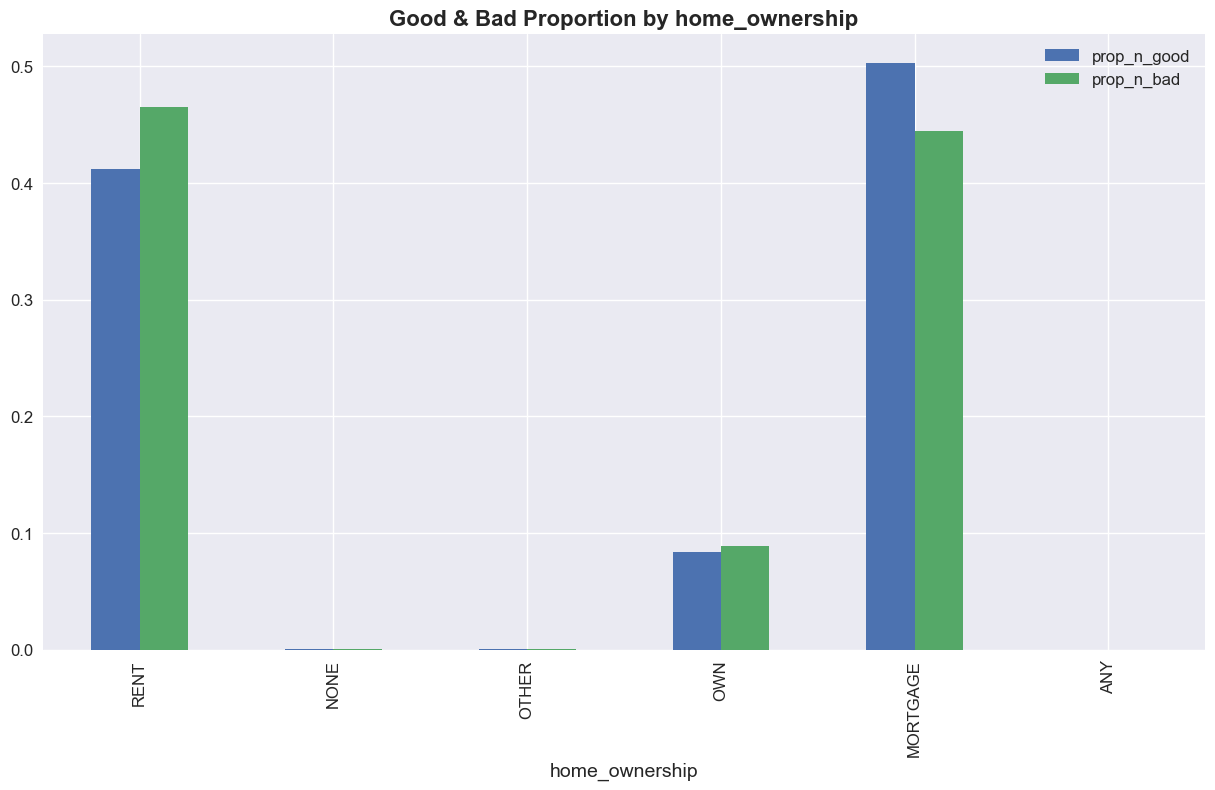

In [94]:
df_w.set_index('home_ownership')[['prop_n_good', 'prop_n_bad']].plot(kind='bar', figsize=(15,8), fontsize=12)
plt.title('Good & Bad Proportion by home_ownership', fontdict={'fontweight':'bold', 'fontsize':16})
plt.xlabel('home_ownership', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [95]:
# categories:
# 'home_ownership:OTHER_NONE_RENT_ANY'
# 'home_ownership:OWN'
# 'home_ownership:MORTGAGE'

# 'home_ownership:OTHER_NONE_RENT_ANY' is the reference category

df_pre_X['home_ownership:OTHER_NONE_RENT_ANY'] = sum([df_pre_X['home_ownership:OTHER'], df_pre_X['home_ownership:NONE'], 
                                                      df_pre_X['home_ownership:RENT'], df_pre_X['home_ownership:ANY']])

In [96]:
df_pre_X[['home_ownership', 'home_ownership:OTHER_NONE_RENT_ANY']].tail()

home_ownership  home_ownership:OTHER_NONE_RENT_ANY
182592           RENT                                   1
161128       MORTGAGE                                   0
195514       MORTGAGE                                   0
211425       MORTGAGE                                   0
184828       MORTGAGE                                   0

In [97]:
feat_info('addr_state')

The state provided by the borrower in the loan application


In [98]:
df_pre_X['addr_state'].unique()

array(['MI', 'FL', 'NY', 'OH', 'NV', 'CA', 'NJ', 'KY', 'WA', 'PA', 'MD',
       'MN', 'NC', 'TX', 'AL', 'UT', 'AZ', 'MO', 'GA', 'KS', 'VA', 'CO',
       'IN', 'CT', 'MA', 'IL', 'MT', 'LA', 'WV', 'AR', 'OK', 'NM', 'SC',
       'VT', 'TN', 'OR', 'WI', 'DE', 'RI', 'WY', 'NH', 'HI', 'DC', 'AK',
       'SD', 'NE', 'MS', 'IA', 'ID', 'ME'], dtype=object)

In [99]:
df_pre_X['addr_state'].nunique()

50

In [100]:
df_w = woe_discrete(df_pre_X, 'addr_state', df_pre_y)
df_w

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     10   0.500000    0.000055      5.0     5.0     0.000035   
1          TN   1717   0.712871    0.009458   1224.0   493.0     0.008533   
2          MS    243   0.728395    0.001339    177.0    66.0     0.001234   
3          IN   1920   0.741146    0.010576   1423.0   497.0     0.009920   
4          NV   2753   0.749364    0.015164   2063.0   690.0     0.014382   
5          AL   2261   0.755860    0.012454   1709.0   552.0     0.011914   
6          NM    975   0.760000    0.005371    741.0   234.0     0.005166   
7          OK   1542   0.763943    0.008494   1178.0   364.0     0.008212   
8          FL  12616   0.766091    0.069493   9665.0  2951.0     0.067376   
9          AR   1269   0.767533    0.006990    974.0   295.0     0.006790   
10         LA   2134   0.767573    0.011755   1638.0   496.0     0.011419   
11         MI   4273   0.771823    0.023537   3298.0   975.0     0.022991   
12         MO   2896   0.773826    0.015952   2241.0   655.0     0.015622   
13         PA   6130   0.776346    0.033766   4759.0  1371.0     0.033176   
14         NY  15782   0.777024    0.086932  12263.0  3519.0     0.085487   
15         IA      9   0.777778    0.000050      7.0     2.0     0.000049   
16         NC   4951   0.778227    0.027272   3853.0  1098.0     0.026860   
17         KY   1654   0.778718    0.009111   1288.0   366.0     0.008979   
18         OH   5559   0.779817    0.030621   4335.0  1224.0     0.030220   
19         MD   4378   0.780950    0.024115   3419.0   959.0     0.023834   
20         HI   1046   0.783939    0.005762    820.0   226.0     0.005716   
21         NJ   7050   0.785248    0.038834   5536.0  1514.0     0.038592   
22         VA   5757   0.788258    0.031711   4538.0  1219.0     0.031635   
23         DE    470   0.789362    0.002589    371.0    99.0     0.002586   
24         MN   3121   0.789491    0.017191   2464.0   657.0     0.017177   
25         AZ   4323   0.790886    0.023812   3419.0   904.0     0.023834   
26         WI   2185   0.794050    0.012036   1735.0   450.0     0.012095   
27         RI    773   0.795602    0.004258    615.0   158.0     0.004287   
28         GA   5722   0.799546    0.031519   4575.0  1147.0     0.031893   
29         SD    382   0.801047    0.002104    306.0    76.0     0.002133   
30         MA   4441   0.801621    0.024462   3560.0   881.0     0.024817   
31         IL   6616   0.802297    0.036443   5308.0  1308.0     0.037003   
32         CA  30657   0.802329    0.168868  24597.0  6060.0     0.171470   
33         UT   1452   0.803719    0.007998   1167.0   285.0     0.008135   
34         MT    548   0.808394    0.003019    443.0   105.0     0.003088   
35         AK    492   0.808943    0.002710    398.0    94.0     0.002775   
36         WA   4132   0.809777    0.022760   3346.0   786.0     0.023326   
37         OR   2351   0.811570    0.012950   1908.0   443.0     0.013301   
38         SC   2065   0.811622    0.011375   1676.0   389.0     0.011684   
39         TX  13786   0.812563    0.075938  11202.0  2584.0     0.078091   
40         VT    296   0.814189    0.001630    241.0    55.0     0.001680   
41         CT   2751   0.817157    0.015153   2248.0   503.0     0.015671   
42         WV    830   0.819277    0.004572    680.0   150.0     0.004740   
43         KS   1469   0.820967    0.008092   1206.0   263.0     0.008407   
44         CO   3879   0.829337    0.021367   3217.0   662.0     0.022426   
45         NH    848   0.850236    0.004671    721.0   127.0     0.005026   
46         WY    422   0.850711    0.002325    359.0    63.0     0.002503   
47         ID      7   0.857143    0.000039      6.0     1.0     0.000042   
48         DC    597   0.874372    0.003288    522.0    75.0     0.003639   
49         ME      4   1.000000    0.000022      4.0     0.0     0.000028   

    prop_n_bad       WoE   IV  
0     0.000131 -1.325863  inf  
1     0.012

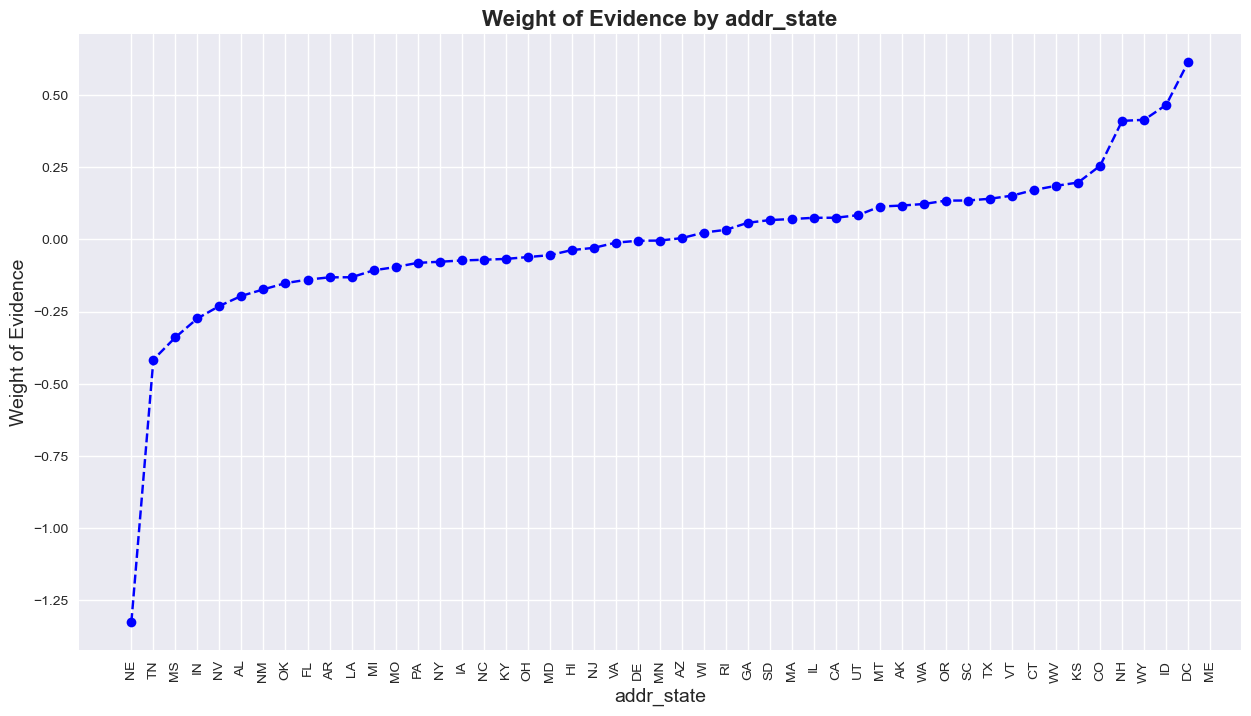

In [101]:
plot_by_woe(df_w, 90)

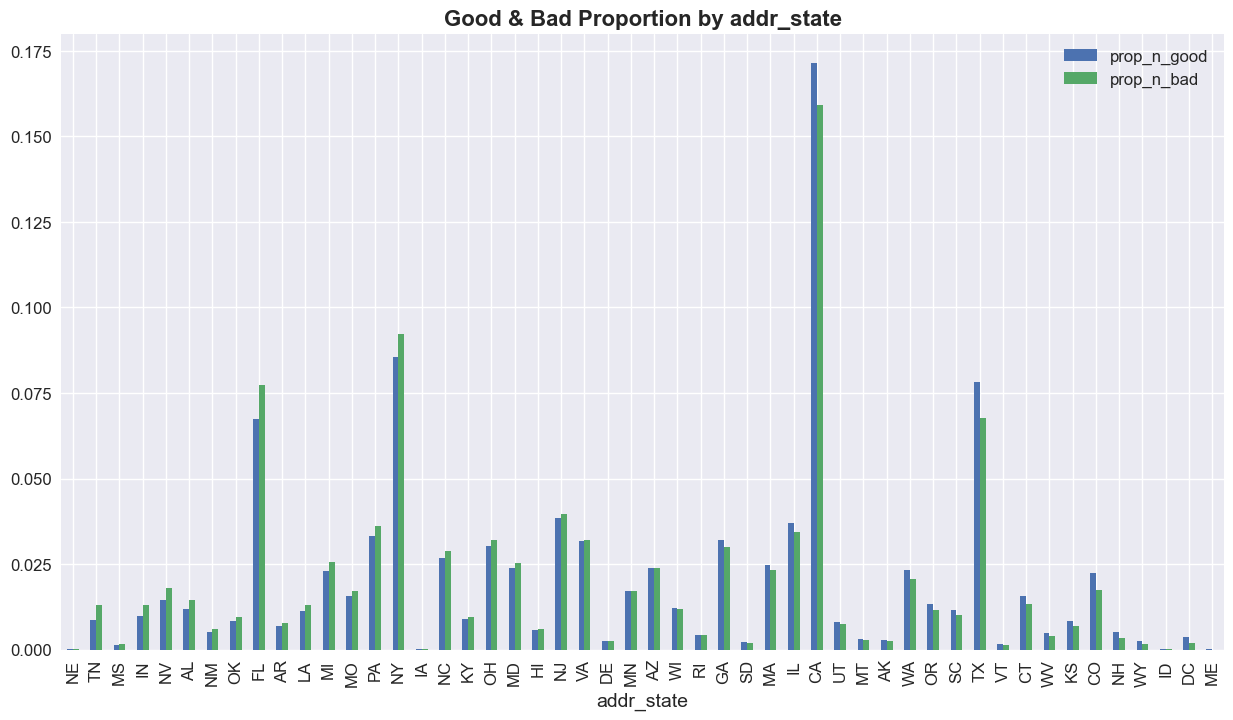

In [102]:
df_w.set_index('addr_state')[['prop_n_good', 'prop_n_bad']].plot(kind='bar', figsize=(15,8), fontsize=12)
plt.title('Good & Bad Proportion by addr_state', fontdict={'fontweight':'bold', 'fontsize':16})
plt.xlabel('addr_state', fontsize=14)
plt.legend(fontsize=12)
plt.show()

There are no borrowers from North Dakota (ND). We add ND to add_state if there are any borrowers later.

In [103]:
# df_inputs_prepr['addr_state:ND']    # ERROR

In [104]:
if ['addr_state:ND'] in df_pre_X.columns.values:
    pass      
else:
    df_pre_X['addr_state:ND'] = 0  

We consider the state with no data in the __category with the highest risk__.

In [105]:
# We define the following categories based on WoE and the number of observations:
# 'ND' 'NE' 'TN' 'MS' 'IN' 'NV'
# 'AL' 'NM' 'OK'
# 'FL' 'AR' 'LA'
# 'MI' 'MO' 'PA'
# 'NY'
# 'IA' 'NC' 'KY' 'OH' 'MD' 'HI'
# 'NJ' 'VA' 'DE' 'MN' 'AZ'
# 'WI' 'RI' 'GA'
# 'SD' 'MA' 'IL' 'UT' ***
# 'CA'
# 'MT' 'AK' 'WA' 'OR' 'SC'
# 'TX'
# 'VT' 'CT' 'WV' 'KS' 'CO'
# 'NH' 'WY' 'ID' 'DC' 'ME'

df_pre_X['addr_state:ND_NE_TN_MS_IN_NV'] = sum([df_pre_X['addr_state:ND'], df_pre_X['addr_state:NE'], df_pre_X['addr_state:TN'],
                                                df_pre_X['addr_state:MS'], df_pre_X['addr_state:IN'], df_pre_X['addr_state:NV']])
    
df_pre_X['addr_state:AL_NM_OK'] = sum([df_pre_X['addr_state:AL'], df_pre_X['addr_state:NM'], df_pre_X['addr_state:OK']])
df_pre_X['addr_state:FL_AR_LA'] = sum([df_pre_X['addr_state:FL'], df_pre_X['addr_state:AR'], df_pre_X['addr_state:LA']])
df_pre_X['addr_state:MI_MO_PA'] = sum([df_pre_X['addr_state:MI'], df_pre_X['addr_state:MO'], df_pre_X['addr_state:PA']])

df_pre_X['addr_state:IA_NC_KY_OH_MD_HI'] = sum([df_pre_X['addr_state:IA'], df_pre_X['addr_state:NC'], df_pre_X['addr_state:KY'], 
                                               df_pre_X['addr_state:OH'], df_pre_X['addr_state:MD'], df_pre_X['addr_state:HI']])
        
df_pre_X['addr_state:NJ_VA_DE_MN_AZ'] = sum([df_pre_X['addr_state:NJ'], df_pre_X['addr_state:VA'], df_pre_X['addr_state:DE'],
                                           df_pre_X['addr_state:MN'], df_pre_X['addr_state:AZ']])
    
df_pre_X['addr_state:WI_RI_GA'] = sum([df_pre_X['addr_state:WI'], df_pre_X['addr_state:RI'], df_pre_X['addr_state:GA']])
df_pre_X['addr_state:SD_MA_IL_UT'] = sum([df_pre_X['addr_state:SD'], df_pre_X['addr_state:MA'], 
                                         df_pre_X['addr_state:IL'], df_pre_X['addr_state:UT']])
    
    
df_pre_X['addr_state:MT_AK_WA_OR_SC'] = sum([df_pre_X['addr_state:MT'], df_pre_X['addr_state:AK'], df_pre_X['addr_state:WA'],
                                            df_pre_X['addr_state:OR'], df_pre_X['addr_state:SC']])
    
df_pre_X['addr_state:VT_CT_WV_KS_CO'] = sum([df_pre_X['addr_state:VT'], df_pre_X['addr_state:CT'], df_pre_X['addr_state:WV'],
                                            df_pre_X['addr_state:KS'], df_pre_X['addr_state:CO']])
    
df_pre_X['addr_state:NH_WY_ID_DC_ME'] = sum([df_pre_X['addr_state:NH'], df_pre_X['addr_state:WY'], df_pre_X['addr_state:ID'],
                                            df_pre_X['addr_state:DC'], df_pre_X['addr_state:ME']])

__verification_status: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified__

In [106]:
df_pre_X['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [107]:
df_w = woe_discrete(df_pre_X, 'verification_status', df_pre_y)
df_w

verification_status  n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0            Verified  67641   0.762895    0.372587  51603.0  16038.0   
1     Source Verified  51365   0.773133    0.282934  39712.0  11653.0   
2        Not Verified  62538   0.833621    0.344478  52133.0  10405.0   

   prop_n_good  prop_n_bad       WoE        IV  
0     0.359733    0.420989 -0.157244  0.038325  
1     0.276839    0.305885 -0.099774  0.038325  
2     0.363428    0.273126  0.285648  0.038325

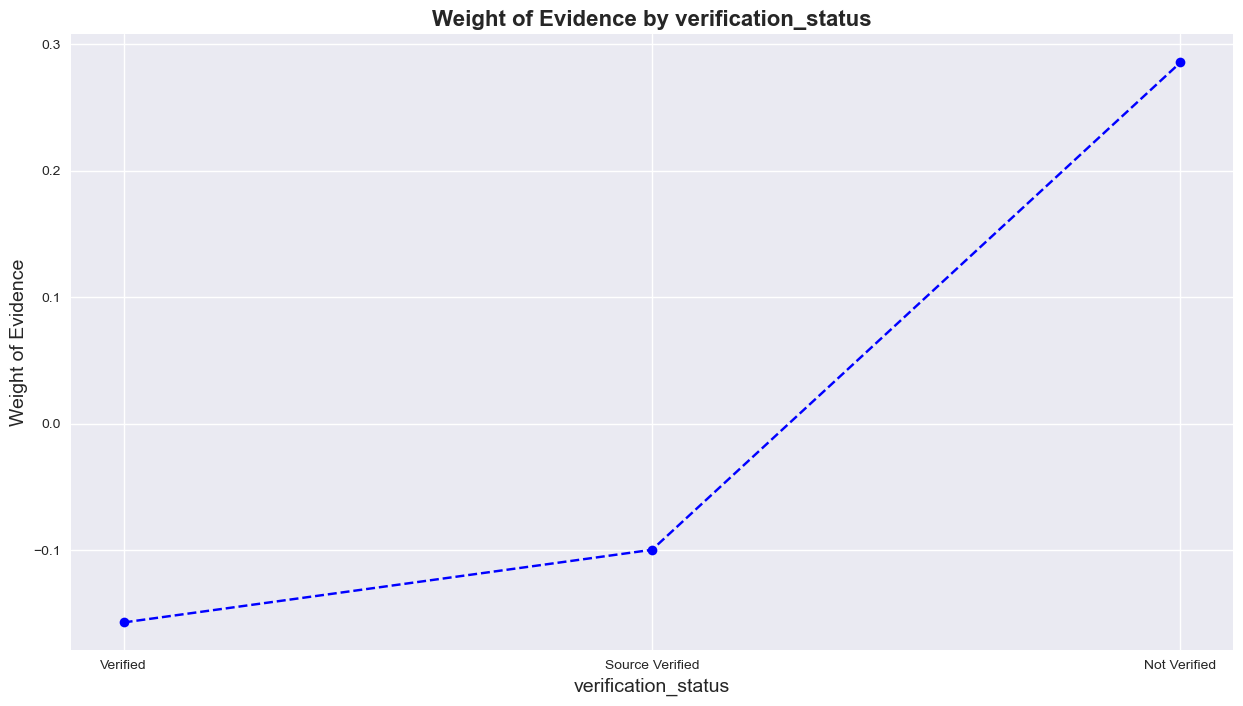

In [108]:
plot_by_woe(df_w)

In [109]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [110]:
df_pre_X['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'home_improvement', 'wedding',
       'car', 'major_purchase', 'other', 'small_business', 'moving',
       'medical', 'house', 'educational', 'vacation', 'renewable_energy'],
      dtype=object)

In [111]:
df_w= woe_discrete(df_pre_X, 'purpose', df_pre_y)
df_w

purpose   n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0       small_business    3668   0.687568    0.020204   2522.0   1146.0   
1               moving    1447   0.761576    0.007971   1102.0    345.0   
2                other   10408   0.767102    0.057330   7984.0   2424.0   
3              medical    2073   0.767969    0.011419   1592.0    481.0   
4   debt_consolidation  105730   0.780318    0.582393  82503.0  23227.0   
5          educational     327   0.782875    0.001801    256.0     71.0   
6     renewable_energy     194   0.798969    0.001069    155.0     39.0   
7             vacation    1121   0.802855    0.006175    900.0    221.0   
8                house    1149   0.804178    0.006329    924.0    225.0   
9          credit_card   36158   0.814757    0.199169  29460.0   6698.0   
10    home_improvement   10526   0.815694    0.057980   8586.0   1940.0   
11      major_purchase    4552   0.844244    0.025074   3843.0    709.0   
12             wedding    1528   0.858639    0.008417   1312.0    216.0   
13                 car    2663   0.867067    0.014669   2309.0    354.0   

    prop_n_good  prop_n_bad       WoE        IV  
0      0.017581    0.030082 -0.537089  0.024724  
1      0.007682    0.009056 -0.164526  0.024724  
2      0.055658    0.063629 -0.133843  0.024724  
3      0.011098    0.012626 -0.128984  0.024724  
4      0.575142    0.609697 -0.058344  0.024724  
5      0.001785    0.001864 -0.043366  0.024724  
6      0.001081    0.001024  0.054000  0.024724  
7      0.006274    0.005801  0.078369  0.024724  
8      0.006441    0.005906  0.086748  0.024724  
9      0.205371    0.175819  0.155361  0.024724  
10     0.059854    0.050924  0.161582  0.024724  
11     0.026790    0.018611  0.364290  0.024724  
12     0.009146    0.005670  0.478166  0.024724  
13     0.016096    0.009292  0.549410  0.024724

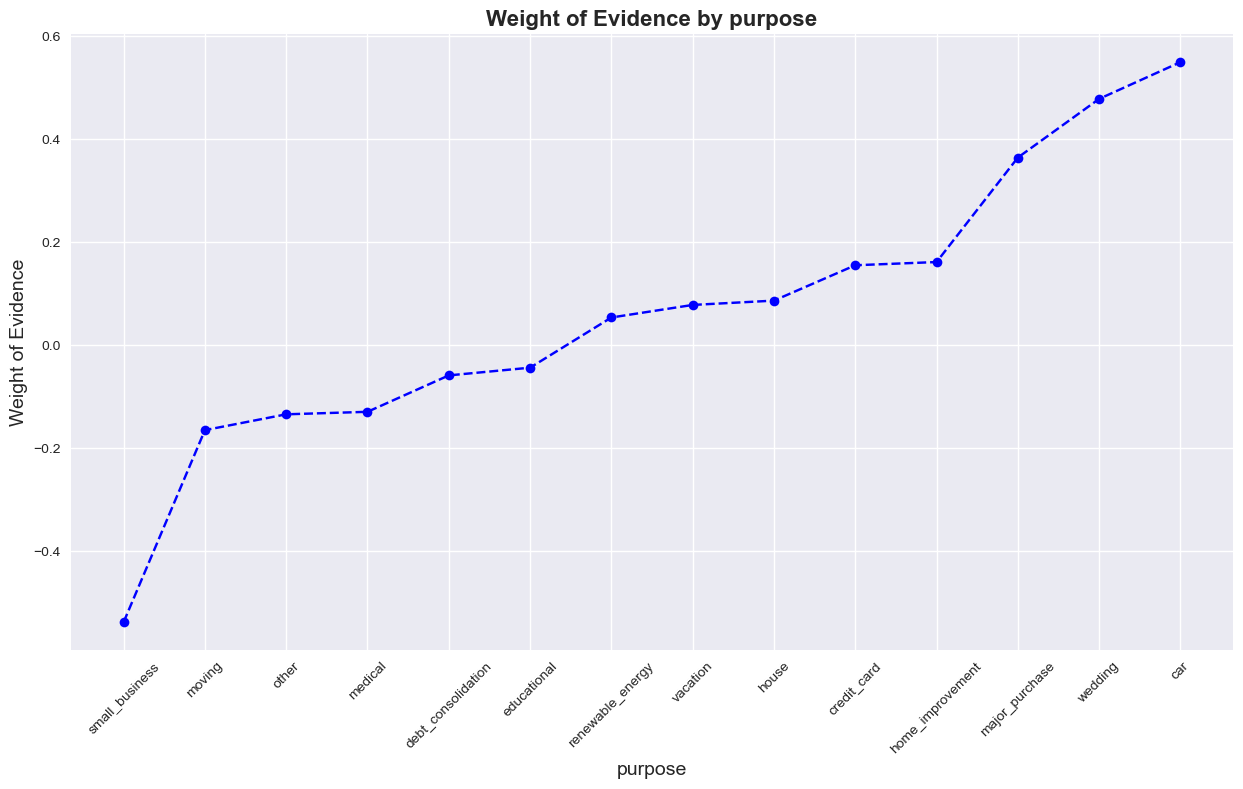

In [112]:
plot_by_woe(df_w, 45)

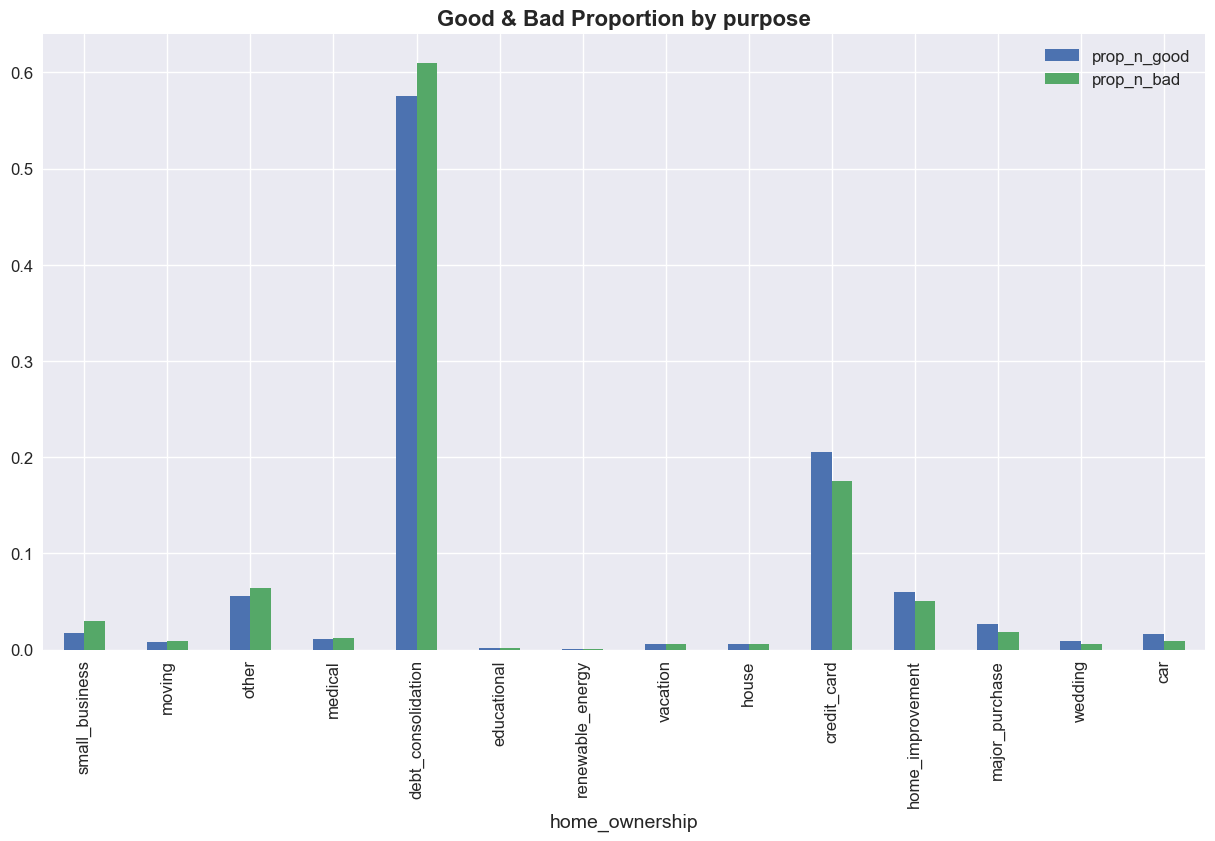

In [113]:
df_w.set_index(['purpose'])[['prop_n_good', 'prop_n_bad']].plot(kind='bar', figsize=(15,8), fontsize=12)
plt.title('Good & Bad Proportion by purpose', fontdict={'fontweight':'bold', 'fontsize':16})
plt.xlabel('home_ownership', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [114]:
# We consider the following categories:
# 'small_business', moving', 'other', 'medical','educational'
# 'renewable_energy', 'vacation', 'house', 'home_improvement', 
# 'major_purchase', 'wedding', 'car' 
# 'debt_consolidtion' 
# 'credit_card' 

df_pre_X['purpose:sm_b__mov__oth__med__edu'] = sum([df_pre_X['purpose:small_business'], df_pre_X['purpose:moving'],
                                                  df_pre_X['purpose:other'], df_pre_X['purpose:medical'], df_pre_X['purpose:educational']])


df_pre_X['purpose:ren_en__vac__house__home_impr'] = sum([df_pre_X['purpose:renewable_energy'], df_pre_X['purpose:vacation'],
                                                       df_pre_X['purpose:home_improvement']])

df_pre_X['purpose:major_purch__wed__car'] = sum([df_pre_X['purpose:major_purchase'], df_pre_X['purpose:wedding'],
                                               df_pre_X['purpose:car']])

In [115]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [116]:
df_pre_X['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [117]:
df_w = woe_discrete(df_pre_X, 'initial_list_status', df_pre_y)
df_w

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   w   46932   0.769965    0.258516   36136.0  10796.0   
1                   f  134612   0.797195    0.741484  107312.0  27300.0   

   prop_n_good  prop_n_bad       WoE       IV  
0      0.25191    0.283389 -0.117749  0.00506  
1      0.74809    0.716611  0.042990  0.00506

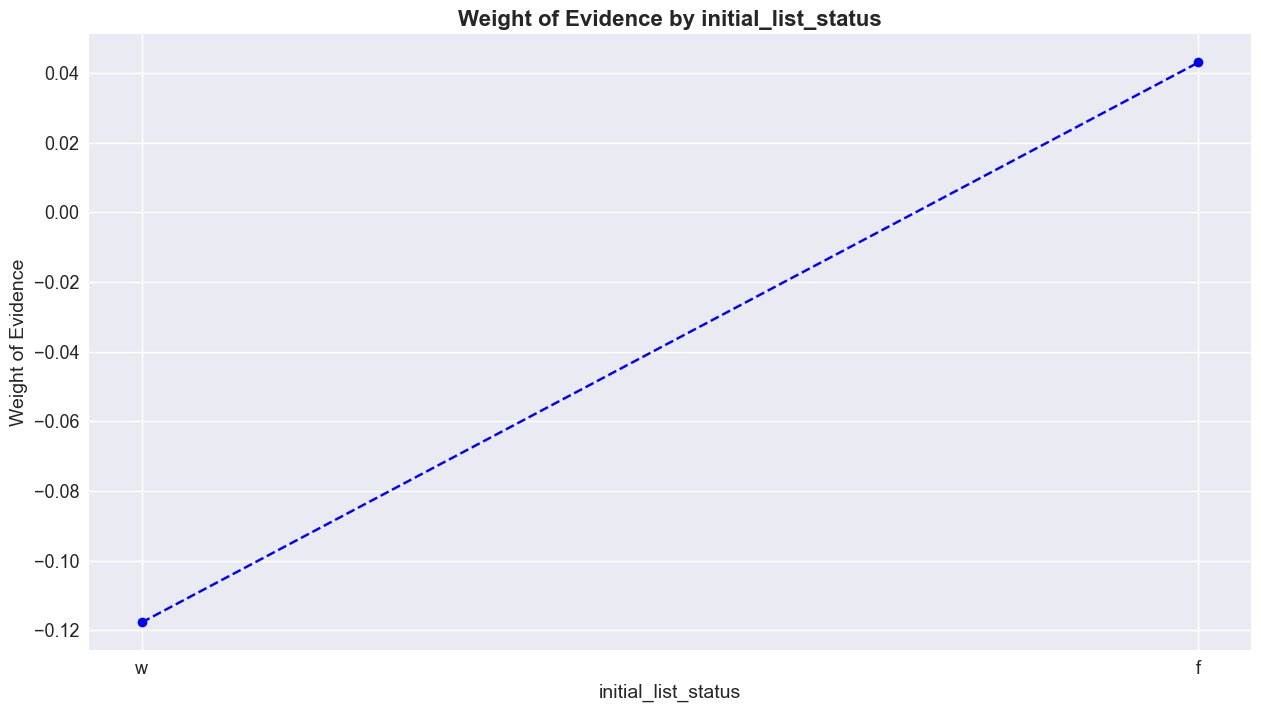

In [118]:
plot_by_woe(df_w, fontsize_ticks=13)

### Preprocessing Ordered Discrete and Continuous Variables

In [119]:
# It calculates the 'Weigth of Evidence' for ordered discrete and continuous variables
def woe_ordered_continuous(df, variable_name, good_bad_df):
    df = pd.concat([df[variable_name], good_bad_df], axis=1)
    df = pd.concat([df.groupby(variable_name, as_index=False)[df.columns[1]].count(),
                    df.groupby(variable_name, as_index=False)[df.columns[1]].mean()], axis=1)
   
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [variable_name, 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE']).sum()

    return df

### Preprocessing Continuous Variables: Fine Classing and Coarse Classing

In [120]:
df_pre_X.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'addr_state:IA_NC_KY_OH_MD_HI', 'addr_state:NJ_VA_DE_MN_AZ',
       'addr_state:WI_RI_GA', 'addr_state:SD_MA_IL_UT',
       'addr_state:MT_AK_WA_OR_SC', 'addr_state:VT_CT_WV_KS_CO',
       'addr_state:NH_WY_ID_DC_ME', 'purpose:sm_b__mov__oth__med__edu',
       'purpose:ren_en__vac__house__home_impr',
       'purpose:major_purch__wed__car'],
      dtype='object', length=181)

__term_int__

In [121]:
df_pre_X['term_int'].unique()

array([36, 60], dtype=int64)

In [122]:
df_w = woe_ordered_continuous(df_pre_X, 'term_int', df_pre_y)
df_w

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  141139   0.826568    0.777437  116661.0  24478.0     0.813263   
1        60   40405   0.662963    0.222563   26787.0  13618.0     0.186737   

   prop_n_bad       WoE       IV  
0    0.642535  0.235634  0.15109  
1    0.357465 -0.649339  0.15109

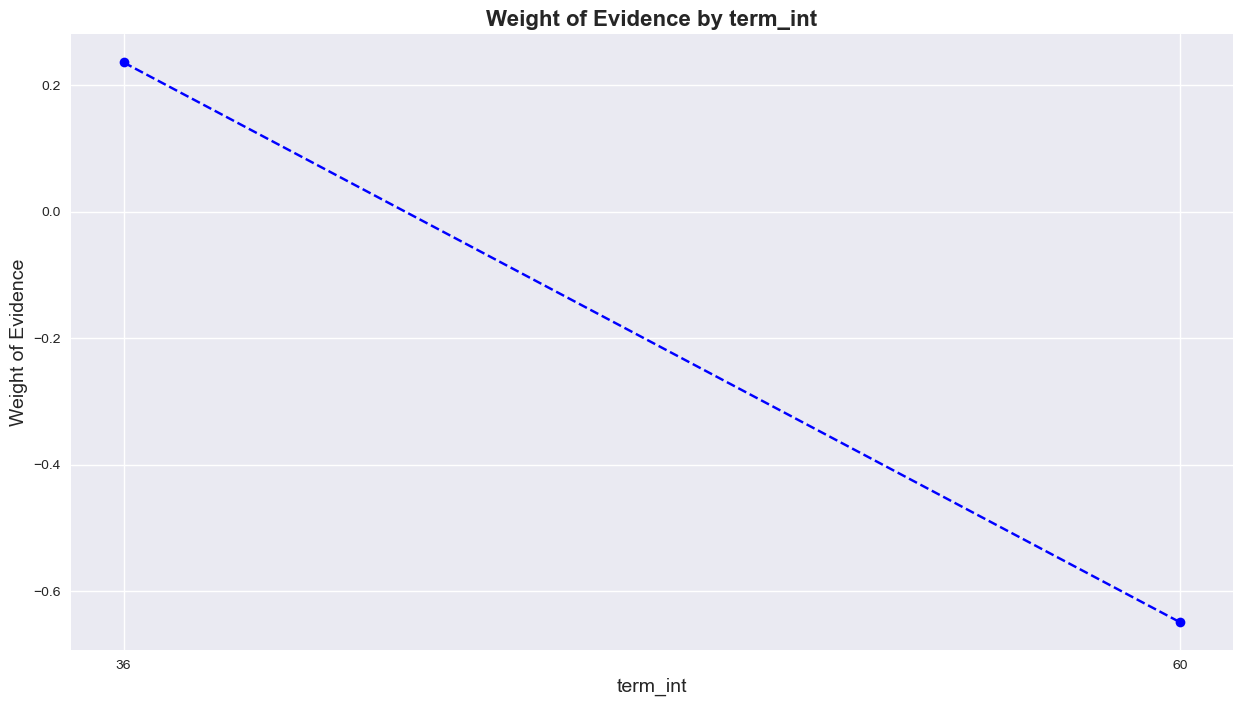

In [123]:
plot_by_woe(df_w)

In [124]:
df_pre_X['term:36'] = np.where((df_pre_X['term_int'] == 36), 1, 0)
df_pre_X['term:60'] = np.where((df_pre_X['term_int'] == 60), 1, 0)

__emp_length_int__

In [125]:
df_pre_X['emp_length_int'].unique()

array([ 0., 10.,  9.,  5.,  8.,  7.,  2.,  4.,  1.,  6.,  3.])

In [126]:
df_w = woe_ordered_continuous(df_pre_X, 'emp_length_int', df_pre_y)
df_w

emp_length_int  n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0              0.0  22293   0.759252    0.122797  16926.0   5367.0   
1              1.0  12143   0.796179    0.066887   9668.0   2475.0   
2              2.0  16967   0.797961    0.093459  13539.0   3428.0   
3              3.0  14784   0.798228    0.081435  11801.0   2983.0   
4              4.0  11723   0.800819    0.064574   9388.0   2335.0   
5              5.0  13207   0.802529    0.072748  10599.0   2608.0   
6              6.0  10845   0.788935    0.059738   8556.0   2289.0   
7              7.0  10143   0.786552    0.055871   7978.0   2165.0   
8              8.0   8391   0.784174    0.046220   6580.0   1811.0   
9              9.0   6842   0.782081    0.037688   5351.0   1491.0   
10            10.0  54206   0.794414    0.298583  43062.0  11144.0   

    prop_n_good  prop_n_bad       WoE        IV  
0      0.117994    0.140881 -0.177282  0.005615  
1      0.067397    0.064967  0.036718  0.005615  
2      0.094383    0.089983  0.047734  0.005615  
3      0.082267    0.078302  0.049391  0.005615  
4      0.065445    0.061293  0.065557  0.005615  
5      0.073887    0.068459  0.076313  0.005615  
6      0.059645    0.060085 -0.007346  0.005615  
7      0.055616    0.056830 -0.021596  0.005615  
8      0.045870    0.047538 -0.035708  0.005615  
9      0.037303    0.039138 -0.048027  0.005615  
10     0.300192    0.292524  0.025876  0.005615

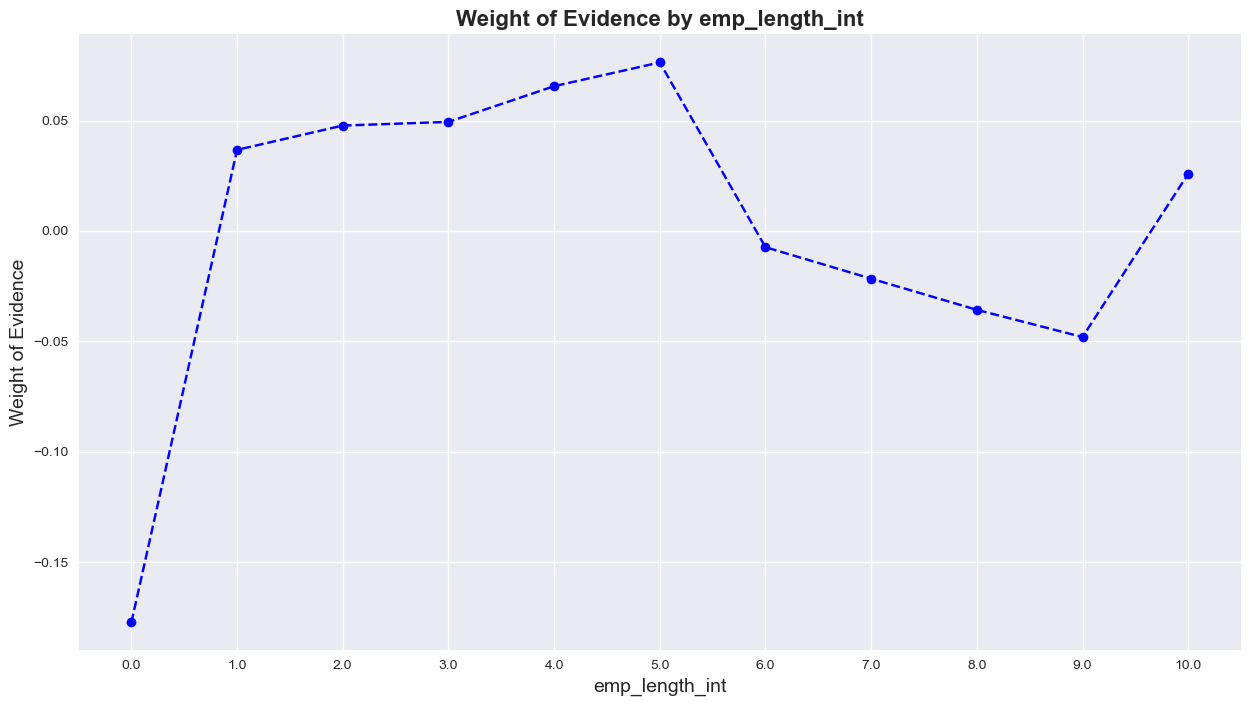

In [127]:
plot_by_woe(df_w)

In [128]:
df_pre_X['emp_length:0'] = np.where(df_pre_X['emp_length_int'] == 0, 1, 0)    
df_pre_X['emp_length:1'] = np.where(df_pre_X['emp_length_int'].isin([1]), 1, 0)
df_pre_X['emp_length:2-5'] = np.where(df_pre_X['emp_length_int'].isin(range(2, 6)), 1, 0)
df_pre_X['emp_length:6-9'] = np.where(df_pre_X['emp_length_int'].isin(range(6, 10)), 1, 0)
df_pre_X['emp_length:10'] = np.where(df_pre_X['emp_length_int'] == 10, 1, 0)

__mths_since_issue_d: The number of months since the loan was funded__

In [129]:
df_pre_X['mths_since_issue_d'].unique()

array([106, 100, 121, 107, 125,  97, 138, 115,  96, 105, 173, 128,  99,
       110, 114, 155, 117, 143, 103, 102, 123, 104, 126, 113, 127, 109,
       111, 101, 145, 131, 147, 119, 129, 118,  98, 108, 141, 116, 112,
       122, 120, 133, 124,  95, 144, 176, 137, 166, 136, 146, 172, 157,
       142, 168, 170, 130, 139, 165, 152, 140, 151, 177, 135, 132, 148,
       134, 184, 160, 174, 158, 156, 150, 153, 149, 154, 159, 163, 182,
       162, 167, 161, 164, 180, 178, 175, 181, 183, 171, 179, 169],
      dtype=int64)

In [130]:
df_pre_X['mths_since_issue_d_factor'] = pd.cut(df_pre_X['mths_since_issue_d'], 50)     

In [131]:
df_w = woe_ordered_continuous(df_pre_X, 'mths_since_issue_d_factor', df_pre_y)
df_w

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good   n_bad  \
0            (94.911, 96.78]   5978   0.748913    0.032929  4477.0  1501.0   
1             (96.78, 98.56]   9932   0.733689    0.054709  7287.0  2645.0   
2            (98.56, 100.34]  11539   0.746165    0.063560  8610.0  2929.0   
3           (100.34, 102.12]   9816   0.748879    0.054070  7351.0  2465.0   
4            (102.12, 103.9]   5477   0.753515    0.030169  4127.0  1350.0   
5            (103.9, 105.68]   9690   0.754799    0.053375  7314.0  2376.0   
6           (105.68, 107.46]  10511   0.773285    0.057898  8128.0  2383.0   
7           (107.46, 109.24]  10593   0.769848    0.058349  8155.0  2438.0   
8           (109.24, 111.02]   9988   0.768522    0.055017  7676.0  2312.0   
9            (111.02, 112.8]   4857   0.766523    0.026754  3723.0  1134.0   
10           (112.8, 114.58]   9372   0.761524    0.051624  7137.0  2235.0   
11          (114.58, 116.36]   8148   0.778596    0.044882  6344.0  1804.0   
12          (116.36, 118.14]   7743   0.805889    0.042651  6240.0  1503.0   
13          (118.14, 119.92]   4100   0.841951    0.022584  3452.0   648.0   
14           (119.92, 121.7]   8887   0.838641    0.048952  7453.0  1434.0   
15           (121.7, 123.48]   8139   0.838309    0.044832  6823.0  1316.0   
16          (123.48, 125.26]   5904   0.814702    0.032521  4810.0  1094.0   
17          (125.26, 127.04]   4705   0.834219    0.025917  3925.0   780.0   
18          (127.04, 128.82]   2064   0.831395    0.011369  1716.0   348.0   
19           (128.82, 130.6]   3619   0.826471    0.019935  2991.0   628.0   
20           (130.6, 132.38]   3024   0.817791    0.016657  2473.0   551.0   
21          (132.38, 134.16]   2903   0.840165    0.015991  2439.0   464.0   
22          (134.16, 135.94]   1343   0.851824    0.007398  1144.0   199.0   
23          (135.94, 137.72]   2555   0.841096    0.014074  2149.0   406.0   
24           (137.72, 139.5]   3160   0.827215    0.017406  2614.0   546.0   
25           (139.5, 141.28]   1952   0.862193    0.010752  1683.0   269.0   
26          (141.28, 143.06]   1923   0.867915    0.010592  1669.0   254.0   
27          (143.06, 144.84]    940   0.850000    0.005178   799.0   141.0   
28          (144.84, 146.62]   1781   0.838855    0.009810  1494.0   287.0   
29           (146.62, 148.4]   1743   0.849684    0.009601  1481.0   262.0   
30           (148.4, 150.18]   1402   0.880171    0.007723  1234.0   168.0   
31          (150.18, 151.96]    628   0.890127    0.003459   559.0    69.0   
32          (151.96, 153.74]    989   0.870576    0.005448   861.0   128.0   
33          (153.74, 155.52]    953   0.876180    0.005249   835.0   118.0   
34           (155.52, 157.3]    824   0.839806    0.004539   692.0   132.0   
35           (157.3, 159.08]    660   0.874242    0.003635   577.0    83.0   
36          (159.08, 160.86]    289   0.858131    0.001592   248.0    41.0   
37          (160.86, 162.64]    526   0.857414    0.002897   451.0    75.0   
38          (162.64, 164.42]    484   0.865702    0.002666   419.0    65.0   
39           (164.42, 166.2]    376   0.861702    0.002071   324.0    52.0   
40           (166.2, 167.98]    154   0.805195    0.000848   124.0    30.0   
41          (167.98, 169.76]    133   0.827068    0.000733   110.0    23.0   
42          (169.76, 171.54]    166   0.825301    0.000914   137.0    29.0   
43          (171.54, 173.32]    174   0.816092    0.000958   142.0    32.0   
44           (173.32, 175.1]    496   0.756048    0.002732   375.0   121.0   
45           (175.1, 176.88]    227   0.775330    0.001250   176.0    51.0   
46          (176.88, 178.66]    361   0.728532    0.001988   263.0    98.0   
47          (178.66, 180.44]    159   0.723270    0.000876   115.0    44.0   
48          (180.44, 182.22]     91   0.714286    0.000501    65.0    26.0   
49           (182.22, 184.0]     66   0.863636    0.000364    57.0     9.0   

    prop_n_good  prop_n_

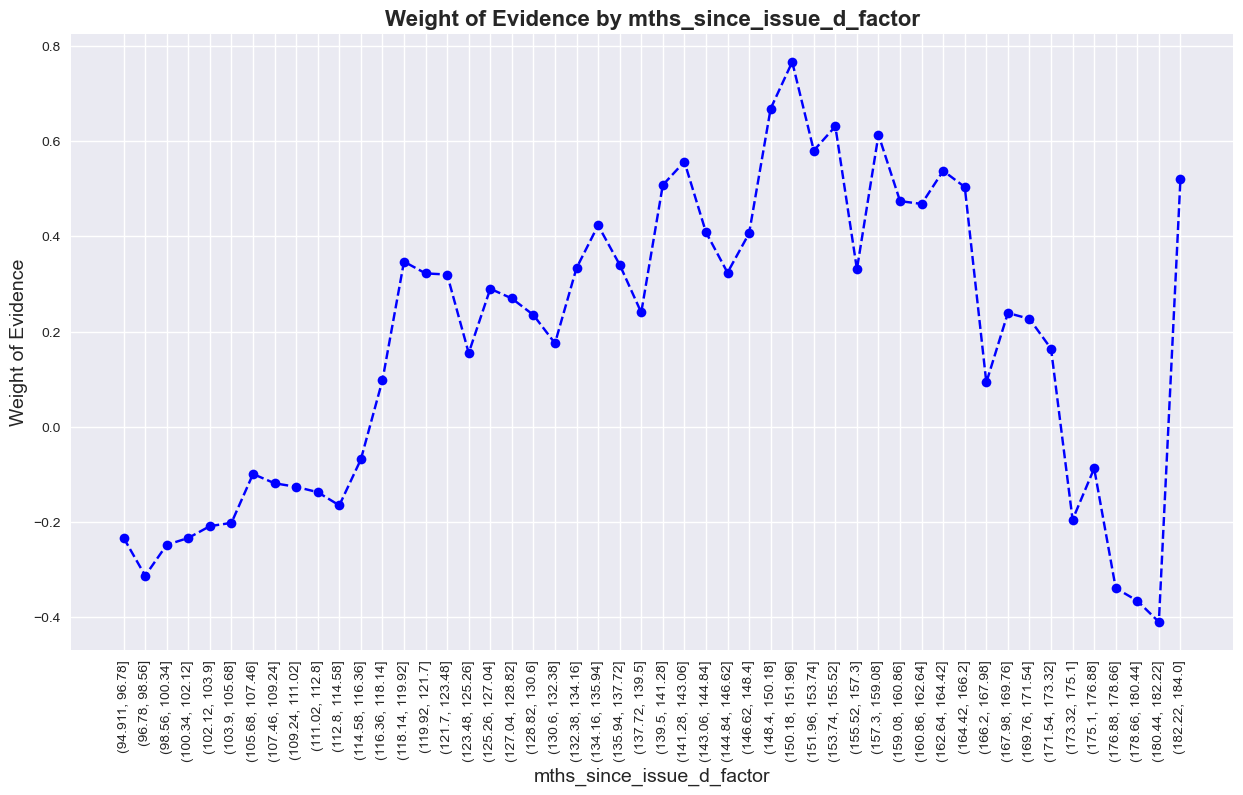

In [132]:
plot_by_woe(df_w, 90)

In [133]:
df_pre_X['mths_since_issue_d:<106'] = np.where(df_pre_X['mths_since_issue_d'].isin(range(0, 106)), 1, 0)
df_pre_X['mths_since_issue_d:106-117'] = np.where(df_pre_X['mths_since_issue_d'].isin(range(106, 117)), 1, 0)
df_pre_X['mths_since_issue_d:117-140'] = np.where(df_pre_X['mths_since_issue_d'].isin(range(117, 140)), 1, 0)
df_pre_X['mths_since_issue_d:140-149'] = np.where(df_pre_X['mths_since_issue_d'].isin(range(140, 149)), 1, 0)
df_pre_X['mths_since_issue_d:149-156'] = np.where(df_pre_X['mths_since_issue_d'].isin(range(149, 156)), 1, 0)
df_pre_X['mths_since_issue_d:156-167'] = np.where(df_pre_X['mths_since_issue_d'].isin(range(156, 167)), 1, 0)
df_pre_X['mths_since_issue_d:167-174'] = np.where(df_pre_X['mths_since_issue_d'].isin(range(167, 174)), 1, 0)
df_pre_X['mths_since_issue_d:>=174'] = np.where(df_pre_X['mths_since_issue_d'] >= 174, 1, 0)

In [134]:
feat_info('int_rate')

Interest Rate on the loan


In [135]:
df_pre_X['int_rate_factor'] = pd.cut(df_pre_X['int_rate'], 50)

In [136]:
df_w = woe_ordered_continuous(df_pre_X, 'int_rate_factor', df_pre_y)
df_w

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good   n_bad  \
0     (5.399, 5.833]    741   0.958165    0.004082   710.0    31.0   
1     (5.833, 6.246]   4116   0.965015    0.022672  3972.0   144.0   
2     (6.246, 6.658]   3632   0.942731    0.020006  3424.0   208.0   
3     (6.658, 7.071]   1024   0.944336    0.005641   967.0    57.0   
4     (7.071, 7.484]   1159   0.940466    0.006384  1090.0    69.0   
5     (7.484, 7.897]   6283   0.929651    0.034609  5841.0   442.0   
6      (7.897, 8.31]   5263   0.919628    0.028990  4840.0   423.0   
7      (8.31, 8.722]   1996   0.888277    0.010995  1773.0   223.0   
8     (8.722, 9.135]   5471   0.895997    0.030136  4902.0   569.0   
9     (9.135, 9.548]   1877   0.891849    0.010339  1674.0   203.0   
10    (9.548, 9.961]   4041   0.876268    0.022259  3541.0   500.0   
11   (9.961, 10.374]   5603   0.876316    0.030863  4910.0   693.0   
12  (10.374, 10.786]   3337   0.862751    0.018381  2879.0   458.0   
13  (10.786, 11.199]   8694   0.868070    0.047889  7547.0  1147.0   
14  (11.199, 11.612]   2469   0.845281    0.013600  2087.0   382.0   
15  (11.612, 12.025]   6078   0.837611    0.033479  5091.0   987.0   
16  (12.025, 12.438]   8017   0.852688    0.044160  6836.0  1181.0   
17   (12.438, 12.85]   4451   0.820490    0.024517  3652.0   799.0   
18   (12.85, 13.263]  10670   0.820619    0.058774  8756.0  1914.0   
19  (13.263, 13.676]   6475   0.792587    0.035666  5132.0  1343.0   
20  (13.676, 14.089]   4819   0.775680    0.026545  3738.0  1081.0   
21  (14.089, 14.502]  11931   0.793647    0.065720  9469.0  2462.0   
22  (14.502, 14.914]   2617   0.791746    0.014415  2072.0   545.0   
23  (14.914, 15.327]   8909   0.764171    0.049074  6808.0  2101.0   
24   (15.327, 15.74]   4734   0.727714    0.026076  3445.0  1289.0   
25   (15.74, 16.153]   4533   0.750055    0.024969  3400.0  1133.0   
26  (16.153, 16.566]   6321   0.727891    0.034818  4601.0  1720.0   
27  (16.566, 16.978]   2088   0.710728    0.011501  1484.0   604.0   
28  (16.978, 17.391]   5451   0.714915    0.030026  3897.0  1554.0   
29  (17.391, 17.804]   6054   0.693261    0.033347  4197.0  1857.0   
30  (17.804, 18.217]    729   0.735254    0.004016   536.0   193.0   
31   (18.217, 18.63]   5607   0.693597    0.030885  3889.0  1718.0   
32   (18.63, 19.042]   3539   0.662899    0.019494  2346.0  1193.0   
33  (19.042, 19.455]   2591   0.685836    0.014272  1777.0   814.0   
34  (19.455, 19.868]   3158   0.651045    0.017395  2056.0  1102.0   
35  (19.868, 20.281]   2032   0.629429    0.011193  1279.0   753.0   
36  (20.281, 20.694]   1748   0.655606    0.009629  1146.0   602.0   
37  (20.694, 21.106]   1947   0.609656    0.010725  1187.0   760.0   
38  (21.106, 21.519]   1498   0.611482    0.008251   916.0   582.0   
39  (21.519, 21.932]    538   0.605948    0.002963   326.0   212.0   
40  (21.932, 22.345]   1637   0.596823    0.009017   977.0   660.0   
41  (22.345, 22.758]   1225   0.577959    0.006748   708.0   517.0   
42   (22.758, 23.17]    848   0.577830    0.004671   490.0   358.0   
43   (23.17, 23.583]   1312   0.579268    0.007227   760.0   552.0   
44  (23.583, 23.996]    923   0.554713    0.005084   512.0   411.0   
45  (23.996, 24.409]    704   0.558239    0.003878   393.0   311.0   
46  (24.409, 24.822]    801   0.566792    0.004412   454.0   347.0   
47  (24.822, 25.234]    632   0.552215    0.003481   349.0   283.0   
48  (25.234, 25.647]    383   0.509138    0.002110   195.0   188.0   
49   (25.647, 26.06]    838   0.497613    0.004616   417.0   421.0   

    prop_n_good  prop_n_bad       WoE        IV  
0      0.004950    0.000814  1.805414  0.407759  
1      0.027689    0.003780  1.991348  0.407759  
2      0.023869    0.005460  1.475163  0.407759  
3      0.006741    0.001496  1.505284  0.407759  
4      0.007599    0.001811  1.433963  0.407759  
5      0.040719    0.011602  1.255484  0.407759  
6      0.033740    0.011104  1.111435  0.407759  
7      0.012360    0.005854  0.747

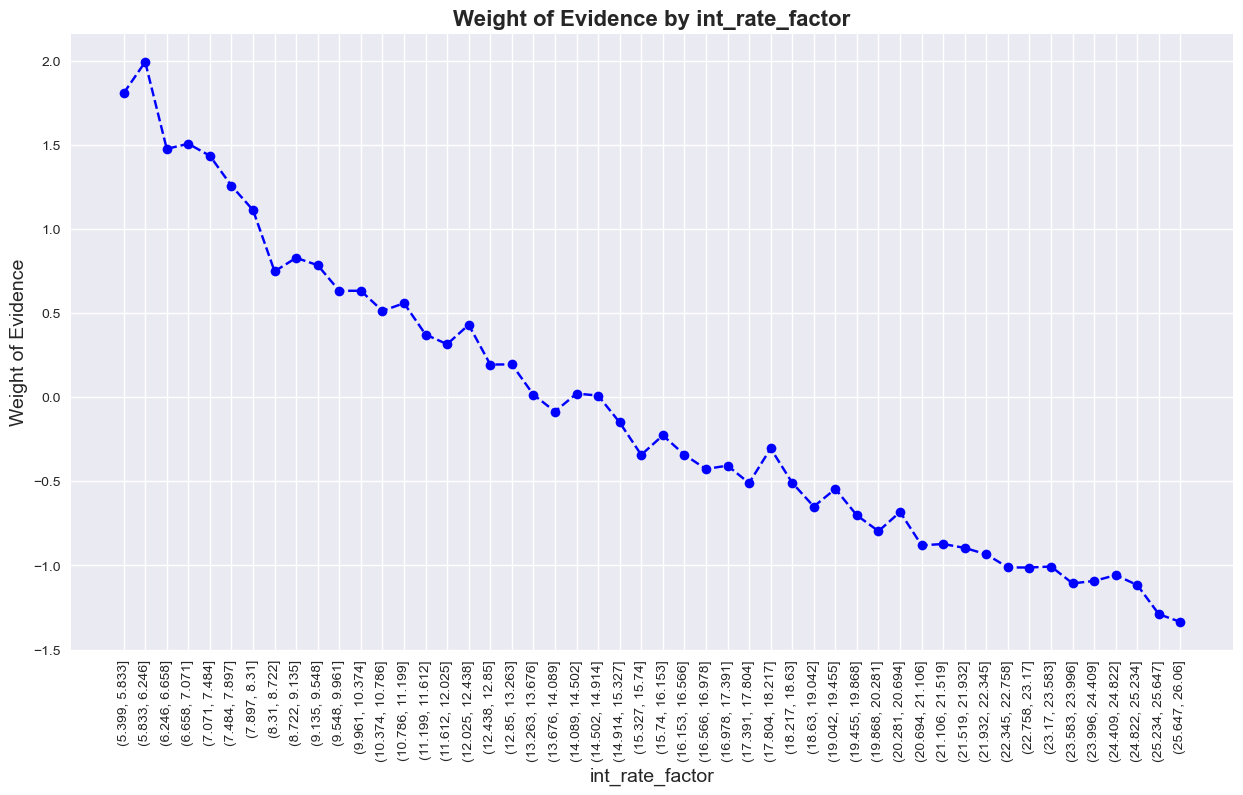

In [137]:
plot_by_woe(df_w, 90)

In [138]:
df_pre_X['int_rate:<=8.31'] = np.where((df_pre_X['int_rate'] <= 8.31), 1, 0) 
df_pre_X['int_rate:8.31-13.263'] = np.where((df_pre_X['int_rate'] > 8.31) & (df_pre_X['int_rate'] <= 13.263), 1, 0)
df_pre_X['int_rate:13.263-18.63'] = np.where((df_pre_X['int_rate'] > 13.263) & (df_pre_X['int_rate'] <= 18.63), 1, 0)
df_pre_X['int_rate:18.63-23.583'] = np.where((df_pre_X['int_rate'] > 18.63) & (df_pre_X['int_rate'] <= 23.583), 1, 0)
df_pre_X['int_rate:>23.583'] = np.where((df_pre_X['int_rate'] > 23.583), 1, 0)

In [139]:
feat_info('funded_amnt')

The total amount committed to that loan at that point in time.


In [140]:
df_pre_X['funded_amnt_factor'] = pd.cut(df_pre_X['funded_amnt'], 50)
df_w = woe_ordered_continuous(df_pre_X, 'funded_amnt_factor', df_pre_y)
df_w

funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (465.5, 1190.0]    727   0.839065    0.004005    610.0   117.0   
1     (1190.0, 1880.0]   1849   0.851271    0.010185   1574.0   275.0   
2     (1880.0, 2570.0]   3503   0.826434    0.019296   2895.0   608.0   
3     (2570.0, 3260.0]   4104   0.817739    0.022606   3356.0   748.0   
4     (3260.0, 3950.0]   2702   0.821614    0.014883   2220.0   482.0   
5     (3950.0, 4640.0]   5176   0.821484    0.028511   4252.0   924.0   
6     (4640.0, 5330.0]   8313   0.811741    0.045791   6748.0  1565.0   
7     (5330.0, 6020.0]   9295   0.836902    0.051200   7779.0  1516.0   
8     (6020.0, 6710.0]   3743   0.807374    0.020618   3022.0   721.0   
9     (6710.0, 7400.0]   6358   0.825889    0.035022   5251.0  1107.0   
10    (7400.0, 8090.0]   9265   0.816190    0.051034   7562.0  1703.0   
11    (8090.0, 8780.0]   3371   0.800356    0.018569   2698.0   673.0   
12    (8780.0, 9470.0]   5057   0.797706    0.027856   4034.0  1023.0   
13   (9470.0, 10160.0]  16930   0.804430    0.093256  13619.0  3311.0   
14  (10160.0, 10850.0]   3290   0.754103    0.018122   2481.0   809.0   
15  (10850.0, 11540.0]   4154   0.774675    0.022882   3218.0   936.0   
16  (11540.0, 12230.0]  11477   0.816241    0.063219   9368.0  2109.0   
17  (12230.0, 12920.0]   2421   0.768691    0.013336   1861.0   560.0   
18  (12920.0, 13610.0]   3514   0.797382    0.019356   2802.0   712.0   
19  (13610.0, 14300.0]   4140   0.806039    0.022804   3337.0   803.0   
20  (14300.0, 14990.0]   2447   0.758888    0.013479   1857.0   590.0   
21  (14990.0, 15680.0]  10013   0.796864    0.055155   7979.0  2034.0   
22  (15680.0, 16370.0]   5510   0.767695    0.030351   4230.0  1280.0   
23  (16370.0, 17060.0]   3039   0.759460    0.016740   2308.0   731.0   
24  (17060.0, 17750.0]   1645   0.726444    0.009061   1195.0   450.0   
25  (17750.0, 18440.0]   5285   0.763860    0.029111   4037.0  1248.0   
26  (18440.0, 19130.0]   1833   0.731042    0.010097   1340.0   493.0   
27  (19130.0, 19820.0]   1820   0.712637    0.010025   1297.0   523.0   
28  (19820.0, 20510.0]   8825   0.782550    0.048611   6906.0  1919.0   
29  (20510.0, 21200.0]   2970   0.781481    0.016360   2321.0   649.0   
30  (21200.0, 21890.0]    915   0.690710    0.005040    632.0   283.0   
31  (21890.0, 22580.0]   1762   0.754824    0.009706   1330.0   432.0   
32  (22580.0, 23270.0]   1006   0.724652    0.005541    729.0   277.0   
33  (23270.0, 23960.0]    858   0.678322    0.004726    582.0   276.0   
34  (23960.0, 24650.0]   4099   0.781410    0.022579   3203.0   896.0   
35  (24650.0, 25340.0]   4249   0.763709    0.023405   3245.0  1004.0   
36  (25340.0, 26030.0]    816   0.702206    0.004495    573.0   243.0   
37  (26030.0, 26720.0]    516   0.637597    0.002842    329.0   187.0   
38  (26720.0, 27410.0]    648   0.714506    0.003569    463.0   185.0   
39  (27410.0, 28100.0]   2454   0.766096    0.013517   1880.0   574.0   
40  (28100.0, 28790.0]    346   0.682081    0.001906    236.0   110.0   
41  (28790.0, 29480.0]    504   0.716270    0.002776    361.0   143.0   
42  (29480.0, 30170.0]   2955   0.732657    0.016277   2165.0   790.0   
43  (30170.0, 30860.0]    254   0.633858    0.001399    161.0    93.0   
44  (30860.0, 31550.0]    355   0.732394    0.001955    260.0    95.0   
45  (31550.0, 32240.0]    535   0.715888    0.002947    383.0   152.0   
46  (32240.0, 32930.0]    286   0.734266    0.001575    210.0    76.0   
47  (32930.0, 33620.0]    400   0.740000    0.002203    296.0   104.0   
48  (33620.0, 34310.0]    226   0.743363    0.001245    168.0    58.0   
49  (34310.0, 35000.0]   5584   0.731554    0.030758   4085.0  1499.0   

    prop_n_good  prop_n_bad       WoE        IV  
0      0.004252    0.003071  0.325422  0.042622  
1      0.010973    0.007219  0.418741  0.042622  
2      0.020182    0.015960  0.234702  0.042622  
3      0.023395    0.019635  0.175239  0.042622  
4      0.015476    0.012652  0

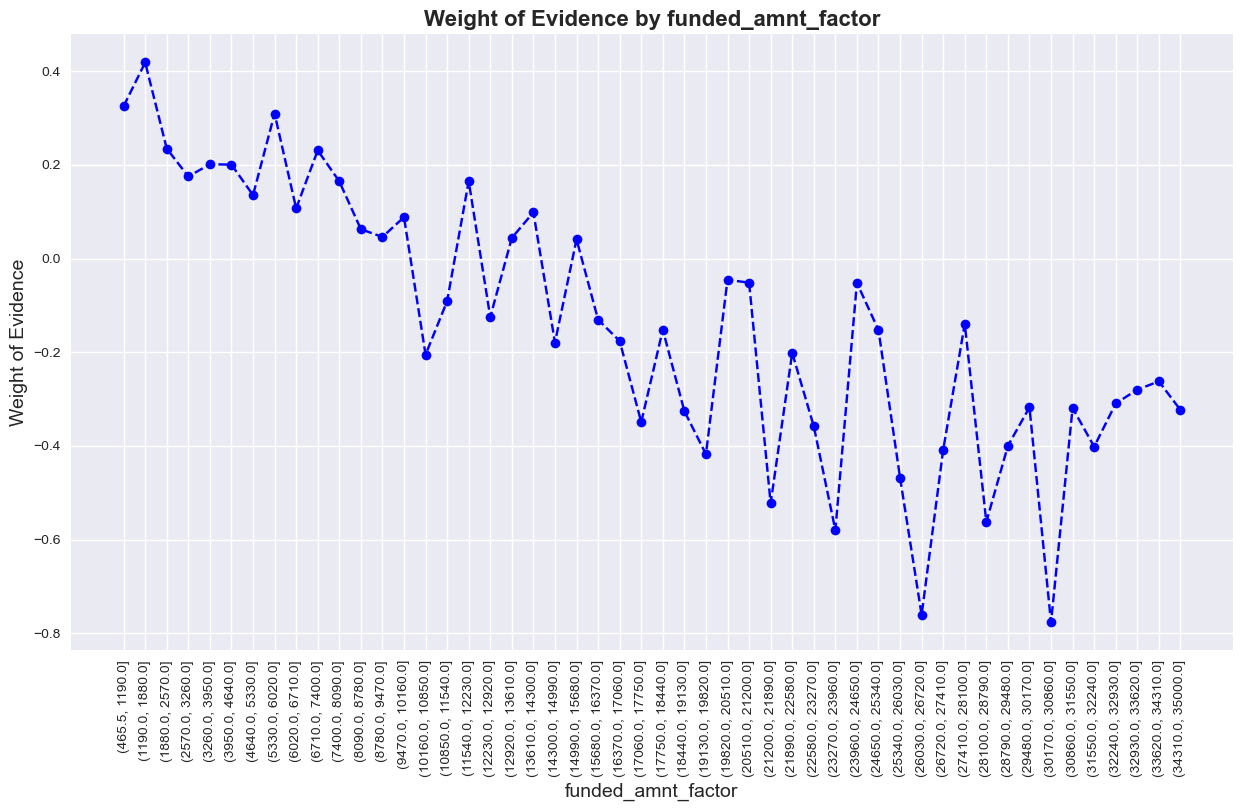

In [141]:
plot_by_woe(df_w, 90)

There are no relationships between 'funded amount' and 'WoE'. Hence, we __do not to include the funded amount variable in the PD model__.  

__mths_since_earliest_cr_line__

In [142]:
df_pre_X['mths_since_earliest_cr_line_factor'] = pd.cut(df_pre_X['mths_since_earliest_cr_line'], 50)
df_w = woe_ordered_continuous(df_pre_X, 'mths_since_earliest_cr_line_factor', df_pre_y)
df_w

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                       (-0.87, 17.4]     20   0.900000    0.000110     18.0   
1                        (17.4, 34.8]      0        NaN    0.000000      NaN   
2                        (34.8, 52.2]      0        NaN    0.000000      NaN   
3                        (52.2, 69.6]      0        NaN    0.000000      NaN   
4                        (69.6, 87.0]    498   0.680723    0.002743    339.0   
5                       (87.0, 104.4]   1477   0.673663    0.008136    995.0   
6                      (104.4, 121.8]   3994   0.738858    0.022000   2951.0   
7                      (121.8, 139.2]   9485   0.756458    0.052246   7175.0   
8                      (139.2, 156.6]  10399   0.779690    0.057281   8108.0   
9                      (156.6, 174.0]  13779   0.782205    0.075899  10778.0   
10                     (174.0, 191.4]  17222   0.780223    0.094864  13437.0   
11                     (191.4, 208.8]  20279   0.790621    0.111703  16033.0   
12                     (208.8, 226.2]  19943   0.791656    0.109852  15788.0   
13                     (226.2, 243.6]  14906   0.795921    0.082107  11864.0   
14                     (243.6, 261.0]  14350   0.798467    0.079044  11458.0   
15                     (261.0, 278.4]  11303   0.806335    0.062260   9114.0   
16                     (278.4, 295.8]   8881   0.809256    0.048919   7187.0   
17                     (295.8, 313.2]   6506   0.809253    0.035837   5265.0   
18                     (313.2, 330.6]   5740   0.808188    0.031618   4639.0   
19                     (330.6, 348.0]   5178   0.802820    0.028522   4157.0   
20                     (348.0, 365.4]   3891   0.817785    0.021433   3182.0   
21                     (365.4, 382.8]   2955   0.803384    0.016277   2374.0   
22                     (382.8, 400.2]   2667   0.800525    0.014691   2135.0   
23                     (400.2, 417.6]   1947   0.808423    0.010725   1574.0   
24                     (417.6, 435.0]   1220   0.809836    0.006720    988.0   
25                     (435.0, 452.4]   1040   0.804808    0.005729    837.0   
26                     (452.4, 469.8]   1012   0.806324    0.005574    816.0   
27                     (469.8, 487.2]    776   0.792526    0.004274    615.0   
28                     (487.2, 504.6]    469   0.797441    0.002583    374.0   
29                     (504.6, 522.0]    432   0.814815    0.002380    352.0   
30                     (522.0, 539.4]    307   0.827362    0.001691    254.0   
31                     (539.4, 556.8]    225   0.755556    0.001239    170.0   
32                     (556.8, 574.2]    227   0.792952    0.001250    180.0   
33                     (574.2, 591.6]     25   0.720000    0.000138     18.0   
34                     (591.6, 609.0]     68   0.808824    0.000375     55.0   
35                     (609.0, 626.4]    115   0.617391    0.000633     71.0   
36                     (626.4, 643.8]     72   0.680556    0.000397     49.0   
37                     (643.8, 661.2]     50   0.640000    0.000275     32.0   
38                     (661.2, 678.6]     36   0.861111    0.000198     31.0   
39                     (678.6, 696.0]     17   0.764706    0.000094     13.0   
40                     (696.0, 713.4]     11   0.636364    0.000061      7.0   
41                     (713.4, 730.8]      5   0.600000    0.000028      3.0   
42                     (730.8, 748.2]      4   0.500000    0.000022      2.0   
43                     (748.2, 765.6]      6   0.500000    0.000033      3.0   
44                     (765.6, 783.0]      4   1.000000    0.000022      4.0   
45                     (783.0, 800.4]      0        NaN    0.000000      NaN   
46                     (800.4, 817.8]      1   1.000000    0.000006      1.0   
47                     (817.8, 835.2]      0        NaN    0.000000      NaN   
48                     (835.2, 852.6]      1   1.000000    0.000006      1.0   
49 

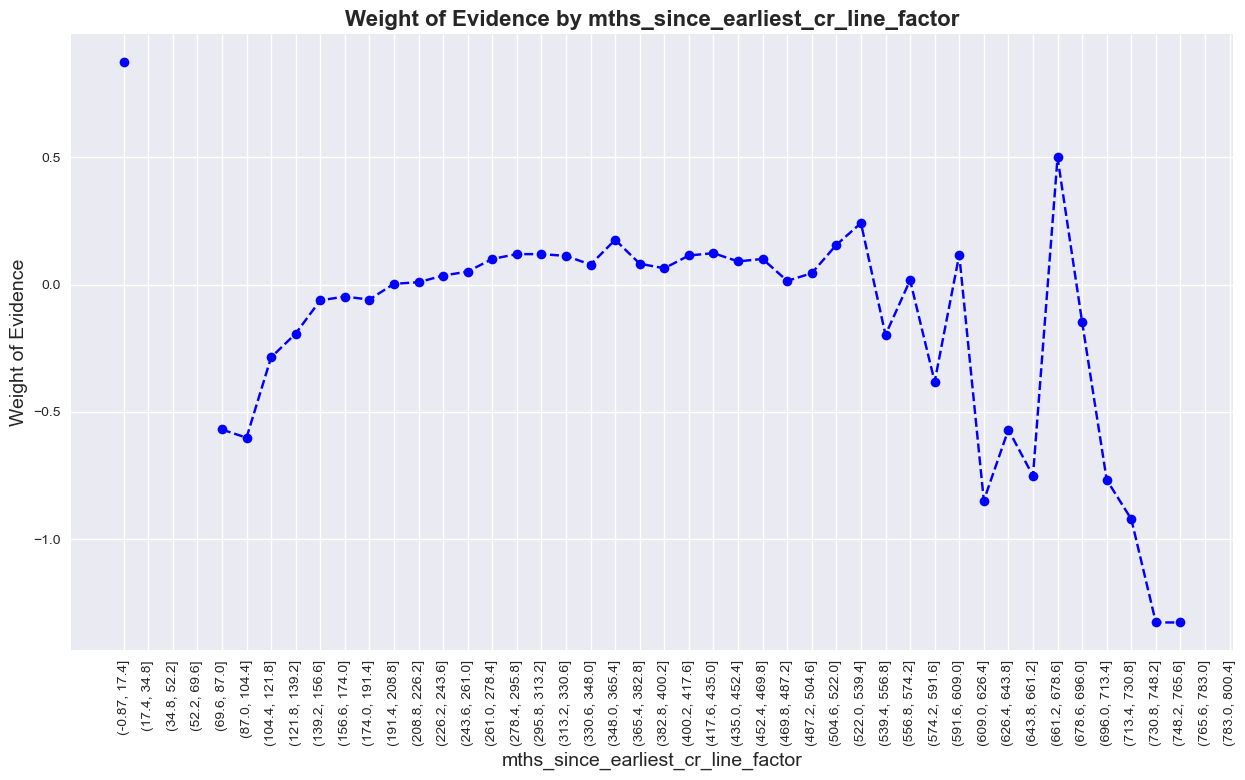

In [143]:
plot_by_woe(df_w, 90)

It is almost a constant function. So, there are no relationships between 'mths_since_earliest_cr_line' and 'WoE'. Hence, we __do not to include the mths_since_earliest_cr_line variable in the PD model__.  

In [144]:
feat_info('delinq_2yrs')

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


In [145]:
df_w = woe_ordered_continuous(df_pre_X, 'delinq_2yrs', df_pre_y)
df_w

C:\Users\m10sa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  152260   0.794523    0.838695  120974.0  31286.0   
1           1.0   20152   0.775159    0.111003   15621.0   4531.0   
2           2.0    5698   0.757634    0.031386    4317.0   1381.0   
3           3.0    1882   0.737513    0.010367    1388.0    494.0   
4           4.0     726   0.745179    0.003999     541.0    185.0   
5           5.0     361   0.756233    0.001988     273.0     88.0   
6           6.0     193   0.746114    0.001063     144.0     49.0   
7           7.0     111   0.684685    0.000611      76.0     35.0   
8           8.0      57   0.736842    0.000314      42.0     15.0   
9           9.0      38   0.736842    0.000209      28.0     10.0   
10         10.0      20   0.750000    0.000110      15.0      5.0   
11         11.0       8   0.750000    0.000044       6.0      2.0   
12         12.0      16   0.500000    0.000088       8.0      8.0   
13         13.0       5   0.600000    0.000028       3.0      2.0   
14         14.0       5   0.800000    0.000028       4.0      1.0   
15         15.0       3   0.666667    0.000017       2.0      1.0   
16         16.0       1   1.000000    0.000006       1.0      0.0   
17         17.0       1   0.000000    0.000006       0.0      1.0   
18         18.0       4   0.750000    0.000022       3.0      1.0   
19         21.0       1   0.000000    0.000006       0.0      1.0   
20         22.0       1   1.000000    0.000006       1.0      0.0   
21         29.0       1   1.000000    0.000006       1.0      0.0   

    prop_n_good  prop_n_bad       WoE   IV  
0      0.843330    0.821241  0.026542  inf  
1      0.108897    0.118936 -0.088190  inf  
2      0.030095    0.036251 -0.186110  inf  
3      0.009676    0.012967 -0.292780  inf  
4      0.003771    0.004856 -0.252800  inf  
5      0.001903    0.002310 -0.193728  inf  
6      0.001004    0.001286 -0.247870  inf  
7      0.000530    0.000919 -0.550478  inf  
8      0.000293    0.000394 -0.296244  inf  
9      0.000195    0.000262 -0.296244  inf  
10     0.000105    0.000131 -0.227251  inf  
11     0.000042    0.000052 -0.227251  inf  
12     0.000056    0.000210 -1.325863  inf  
13     0.000021    0.000052 -0.920398  inf  
14     0.000028    0.000026  0.060431  inf  
15     0.000014    0.000026 -0.632716  inf  
16     0.000007    0.000000       inf  inf  
17     0.000000    0.000026      -inf  inf  
18     0.000021    0.000026 -0.227251  inf  
19     0.000000    0.000026      -inf  inf  
20     0.000007    0.000000       inf  inf  
21     0.000007    0.000000       inf  inf

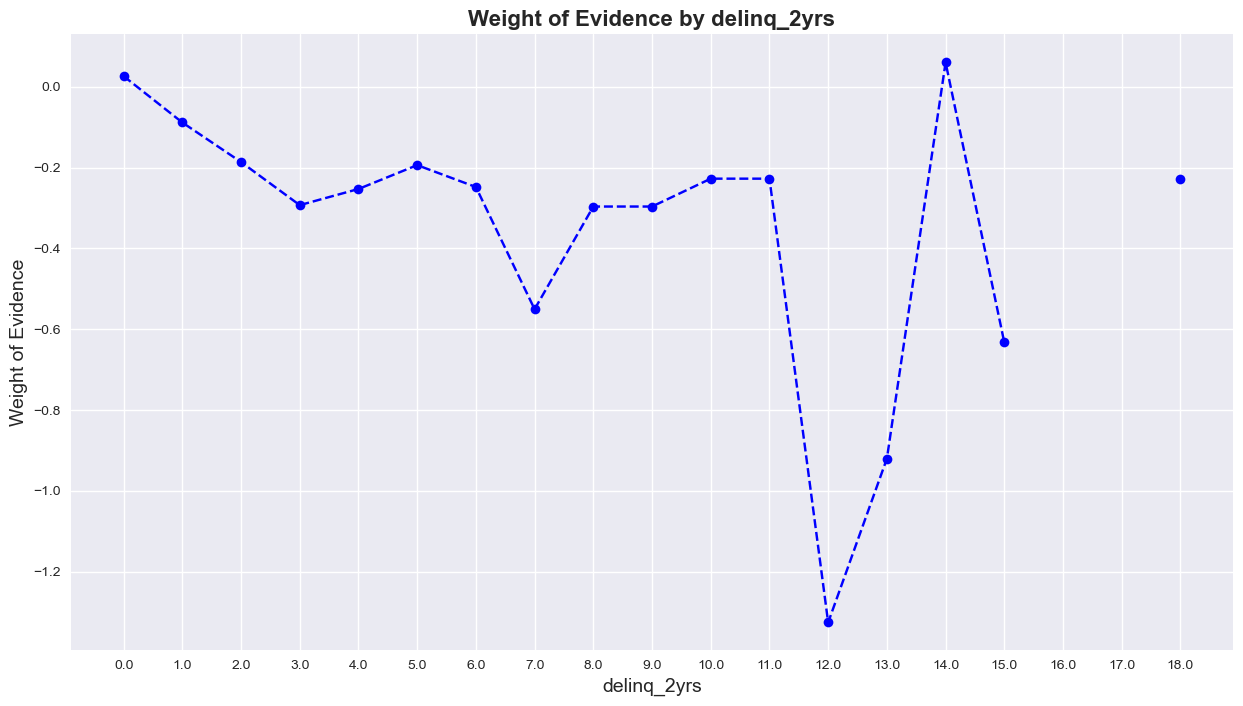

In [146]:
plot_by_woe(df_w)

In [147]:
df_pre_X['delinq_2yrs:0'] = np.where((df_pre_X['delinq_2yrs'] == 0), 1, 0)
df_pre_X['delinq_2yrs:1'] = np.where((df_pre_X['delinq_2yrs'] == 1), 1, 0)
df_pre_X['delinq_2yrs:2-6'] = np.where((df_pre_X['delinq_2yrs'] >= 2) & (df_pre_X['delinq_2yrs'] <= 6), 1, 0)
df_pre_X['delinq_2yrs:>=7'] = np.where((df_pre_X['delinq_2yrs'] >= 7), 1, 0)

In [148]:
feat_info('inq_last_6mths')

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


In [149]:
df_w = woe_ordered_continuous(df_pre_X, 'inq_last_6mths', df_pre_y)
df_w

C:\Users\m10sa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0              0.0  86885   0.809185    0.478589  70306.0  16579.0   
1              1.0  51870   0.784731    0.285716  40704.0  11166.0   
2              2.0  25381   0.768094    0.139806  19495.0   5886.0   
3              3.0  11855   0.750063    0.065301   8892.0   2963.0   
4              4.0   3230   0.745511    0.017792   2408.0    822.0   
5              5.0   1357   0.739130    0.007475   1003.0    354.0   
6              6.0    620   0.677419    0.003415    420.0    200.0   
7              7.0    148   0.648649    0.000815     96.0     52.0   
8              8.0     85   0.588235    0.000468     50.0     35.0   
9              9.0     43   0.627907    0.000237     27.0     16.0   
10            10.0     16   0.875000    0.000088     14.0      2.0   
11            11.0     10   0.800000    0.000055      8.0      2.0   
12            12.0     11   0.636364    0.000061      7.0      4.0   
13            13.0      5   0.600000    0.000028      3.0      2.0   
14            14.0      6   0.166667    0.000033      1.0      5.0   
15            15.0      5   0.400000    0.000028      2.0      3.0   
16            16.0      3   1.000000    0.000017      3.0      0.0   
17            17.0      2   0.500000    0.000011      1.0      1.0   
18            18.0      4   0.500000    0.000022      2.0      2.0   
19            19.0      1   1.000000    0.000006      1.0      0.0   
20            20.0      1   0.000000    0.000006      0.0      1.0   
21            24.0      2   1.000000    0.000011      2.0      0.0   
22            27.0      1   1.000000    0.000006      1.0      0.0   
23            28.0      1   1.000000    0.000006      1.0      0.0   
24            31.0      1   1.000000    0.000006      1.0      0.0   
25            33.0      1   0.000000    0.000006      0.0      1.0   

    prop_n_good  prop_n_bad       WoE   IV  
0      0.490115    0.435190  0.118857  inf  
1      0.283754    0.293102 -0.032410  inf  
2      0.135903    0.154504 -0.128282  inf  
3      0.061988    0.077777 -0.226914  inf  
4      0.016787    0.021577 -0.251052  inf  
5      0.006992    0.009292 -0.284409  inf  
6      0.002928    0.005250 -0.583926  inf  
7      0.000669    0.001365 -0.712759  inf  
8      0.000349    0.000919 -0.969188  inf  
9      0.000188    0.000420 -0.802615  inf  
10     0.000098    0.000052  0.620047  inf  
11     0.000056    0.000052  0.060431  inf  
12     0.000049    0.000105 -0.766248  inf  
13     0.000021    0.000052 -0.920398  inf  
14     0.000007    0.000131 -2.935301  inf  
15     0.000014    0.000079 -1.731328  inf  
16     0.000021    0.000000       inf  inf  
17     0.000007    0.000026 -1.325863  inf  
18     0.000014    0.000052 -1.325863  inf  
19     0.000007    0.000000       inf  inf  
20     0.000000    0.000026      -inf  inf  
21     0.000014    0.000000       inf  inf  
22     0.000007    0.000000       inf  inf  
23     0.000007    0.000000       inf  inf  
24     0.000007    0.000000       inf  inf  
25     0.000000    0.000026      -inf  inf

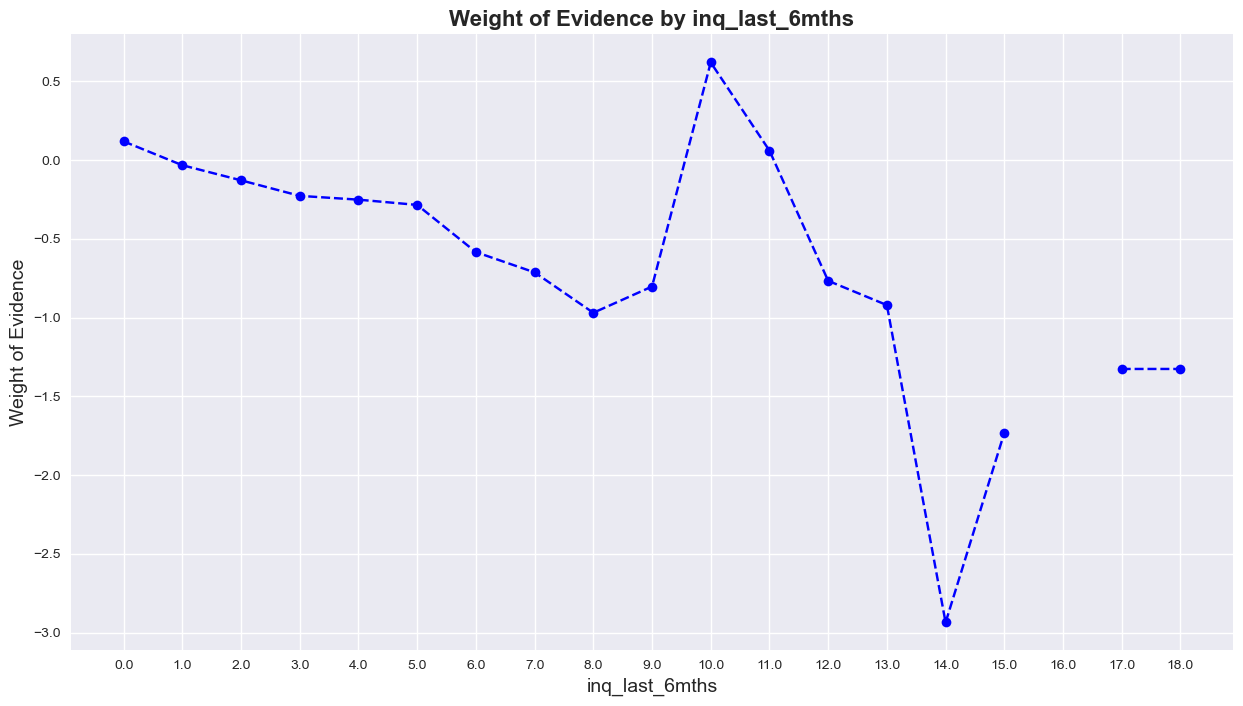

In [150]:
plot_by_woe(df_w)

In [151]:
df_pre_X['inq_last_6mths:0'] = np.where((df_pre_X['inq_last_6mths'] == 0), 1, 0)
df_pre_X['inq_last_6mths:1-2'] = np.where((df_pre_X['inq_last_6mths'].isin([1, 2])), 1, 0)
df_pre_X['inq_last_6mths:3-5'] = np.where((df_pre_X['inq_last_6mths'].isin([3, 4, 5])), 1, 0)
df_pre_X['inq_last_6mths:>=6'] = np.where((df_pre_X['inq_last_6mths'] >= 6), 1, 0)

In [152]:
df_pre_X.loc[:, ['inq_last_6mths', 'inq_last_6mths:1-2']].head()

inq_last_6mths  inq_last_6mths:1-2
452448             2.0                   1
363441             0.0                   0
465236             1.0                   1
194452             3.0                   0
45189              0.0                   0

In [153]:
feat_info('open_acc')

The number of open credit lines in the borrower's credit file.


In [154]:
df_w = woe_ordered_continuous(df_pre_X, 'open_acc', df_pre_y)
df_w

C:\Users\m10sa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0     26   0.769231    0.000143     20.0     6.0     0.000139   
1        1.0     69   0.782609    0.000380     54.0    15.0     0.000376   
2        2.0    967   0.775595    0.005327    750.0   217.0     0.005228   
3        3.0   2661   0.802706    0.014658   2136.0   525.0     0.014890   
4        4.0   5573   0.815898    0.030698   4547.0  1026.0     0.031698   
5        5.0   9073   0.805797    0.049977   7311.0  1762.0     0.050966   
6        6.0  12955   0.805172    0.071360  10431.0  2524.0     0.072716   
7        7.0  15118   0.800304    0.083275  12099.0  3019.0     0.084344   
8        8.0  16767   0.795014    0.092358  13330.0  3437.0     0.092926   
9        9.0  17608   0.792594    0.096990  13956.0  3652.0     0.097290   
10      10.0  16395   0.785361    0.090309  12876.0  3519.0     0.089761   
11      11.0  15205   0.785794    0.083754  11948.0  3257.0     0.083292   
12      12.0  13414   0.784106    0.073888  10518.0  2896.0     0.073323   
13      13.0  11173   0.792267    0.061544   8852.0  2321.0     0.061709   
14      14.0   9344   0.784461    0.051470   7330.0  2014.0     0.051099   
15      15.0   7521   0.777822    0.041428   5850.0  1671.0     0.040781   
16      16.0   6107   0.782053    0.033639   4776.0  1331.0     0.033294   
17      17.0   4767   0.776799    0.026258   3703.0  1064.0     0.025814   
18      18.0   3866   0.783756    0.021295   3030.0   836.0     0.021123   
19      19.0   3040   0.775987    0.016745   2359.0   681.0     0.016445   
20      20.0   2328   0.779639    0.012823   1815.0   513.0     0.012653   
21      21.0   1851   0.768233    0.010196   1422.0   429.0     0.009913   
22      22.0   1403   0.766928    0.007728   1076.0   327.0     0.007501   
23      23.0   1077   0.783658    0.005932    844.0   233.0     0.005884   
24      24.0    833   0.762305    0.004588    635.0   198.0     0.004427   
25      25.0    625   0.731200    0.003443    457.0   168.0     0.003186   
26      26.0    397   0.780856    0.002187    310.0    87.0     0.002161   
27      27.0    317   0.776025    0.001746    246.0    71.0     0.001715   
28      28.0    214   0.766355    0.001179    164.0    50.0     0.001143   
29      29.0    187   0.684492    0.001030    128.0    59.0     0.000892   
30      30.0    136   0.691176    0.000749     94.0    42.0     0.000655   
31      31.0    100   0.700000    0.000551     70.0    30.0     0.000488   
32      32.0     82   0.817073    0.000452     67.0    15.0     0.000467   
33      33.0     70   0.671429    0.000386     47.0    23.0     0.000328   
34      34.0     55   0.709091    0.000303     39.0    16.0     0.000272   
35      35.0     46   0.826087    0.000253     38.0     8.0     0.000265   
36      36.0     34   0.558824    0.000187     19.0    15.0     0.000132   
37      37.0     31   0.677419    0.000171     21.0    10.0     0.000146   
38      38.0     25   0.680000    0.000138     17.0     8.0     0.000119   
39      39.0     21   0.809524    0.000116     17.0     4.0     0.000119   
40      40.0     10   0.500000    0.000055      5.0     5.0     0.000035   
41      41.0     11   0.727273    0.000061      8.0     3.0     0.000056   
42      42.0      8   0.875000    0.000044      7.0     1.0     0.000049   
43      43.0      6   0.666667    0.000033      4.0     2.0     0.000028   
44      44.0      4   0.750000    0.000022      3.0     1.0     0.000021   
45      45.0      5   0.600000    0.000028      3.0     2.0     0.000021   
46      46.0      2   1.000000    0.000011      2.0     0.0     0.000014   
47      47.0      4   0.750000    0.000022      3.0     1.0     0.000021   
48      48.0      1   1.000000    0.000006      1.0     0.0     0.000007   
49      49.0      4   1.000000    0.000022      4.0     0.0     0.000028   
50      50.0      1   1.000000    0.000006      1.0     0.0     0.000007   
51      51.0      1   1.000000    0.000006      1.0 

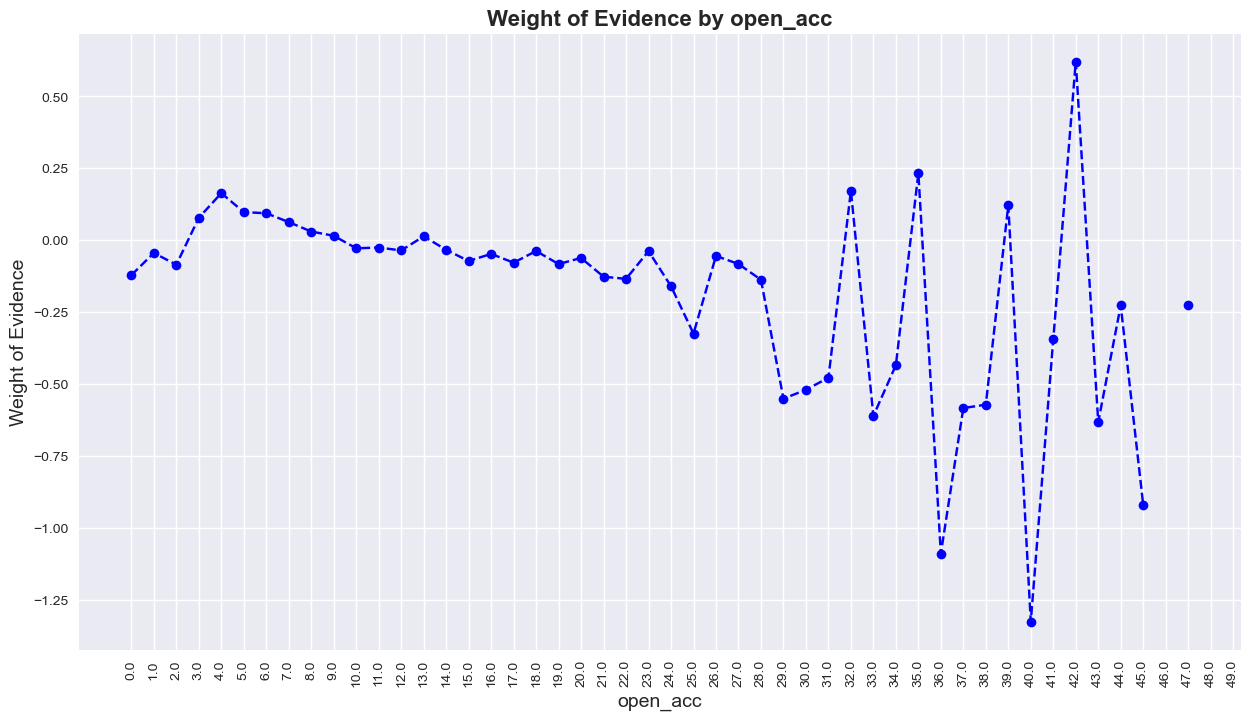

In [155]:
plot_by_woe(df_w, 90)

It is almost a constant function. So, there are no relationships between 'opn_acc' and 'WoE'. Hence, we __do not to include the open_acc variable in the PD model__.  

In [156]:
feat_info('pub_rec')

Number of derogatory public records


In [157]:
df_w = woe_ordered_continuous(df_pre_X, 'pub_rec', df_pre_y)
df_w

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  160527   0.792322    0.884232  127189.0  33338.0     0.886656   
1       1.0   18678   0.776689    0.102884   14507.0   4171.0     0.101131   
2       2.0    1657   0.752565    0.009127    1247.0    410.0     0.008693   
3       3.0     429   0.755245    0.002363     324.0    105.0     0.002259   
4       4.0     140   0.721429    0.000771     101.0     39.0     0.000704   
5       5.0      66   0.696970    0.000364      46.0     20.0     0.000321   
6       6.0      25   0.760000    0.000138      19.0      6.0     0.000132   
7       7.0      11   0.545455    0.000061       6.0      5.0     0.000042   
8       8.0       3   0.666667    0.000017       2.0      1.0     0.000014   
9       9.0       3   0.666667    0.000017       2.0      1.0     0.000014   
10     10.0       4   1.000000    0.000022       4.0      0.0     0.000028   
11     11.0       1   1.000000    0.000006       1.0      0.0     0.000007   

    prop_n_bad       WoE   IV  
0     0.875105  0.013113  inf  
1     0.109487 -0.079388  inf  
2     0.010762 -0.213525  inf  
3     0.002756 -0.199080  inf  
4     0.001024 -0.374304  inf  
5     0.000525 -0.492954  inf  
6     0.000157 -0.173184  inf  
7     0.000131 -1.143542  inf  
8     0.000026 -0.632716  inf  
9     0.000026 -0.632716  inf  
10    0.000000       inf  inf  
11    0.000000       inf  inf

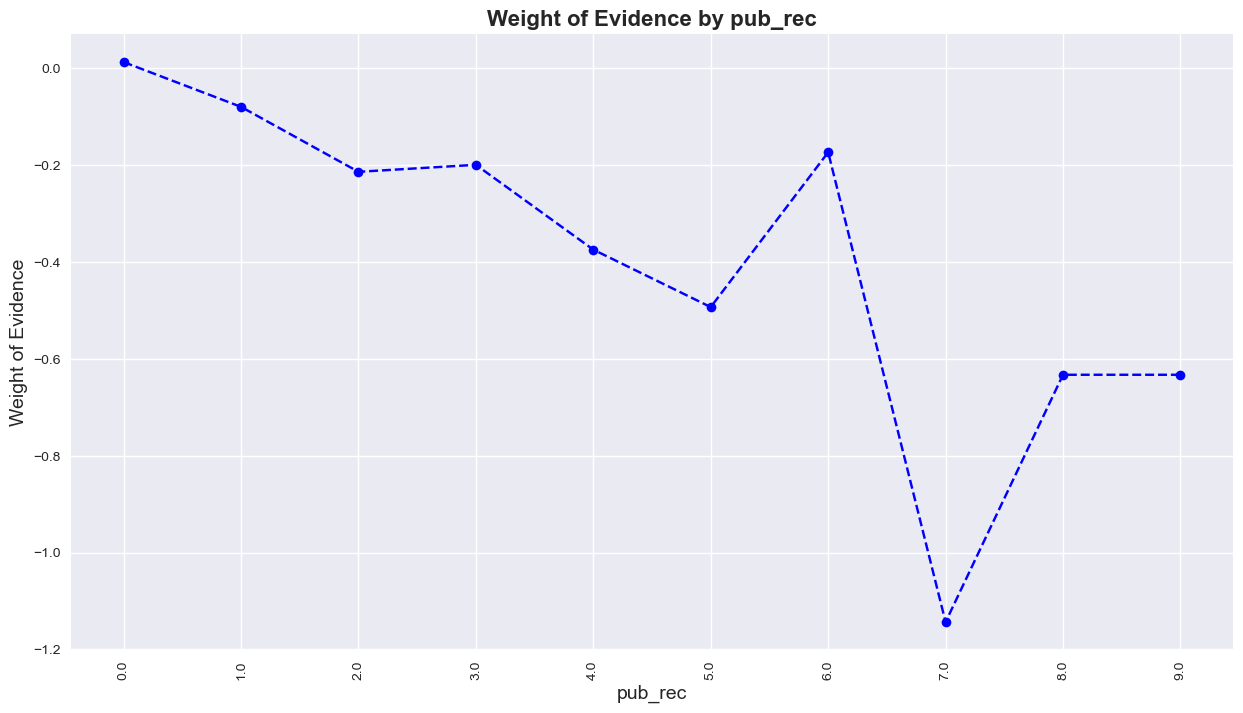

In [158]:
plot_by_woe(df_w, 90)

In [159]:
df_pre_X['pub_rec:0'] = np.where(df_pre_X['pub_rec'] == 0, 1, 0)
df_pre_X['pub_rec:1'] = np.where(df_pre_X['pub_rec'] == 1, 1, 0)
df_pre_X['pub_rec:2-3'] = np.where((df_pre_X['pub_rec'].isin([2,3])), 1, 0)
df_pre_X['pub_rec:>=4'] = np.where((df_pre_X['pub_rec'] >= 4), 1, 0)

In [160]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [161]:
df_pre_X[['open_acc','total_acc']].head()

open_acc  total_acc
452448      12.0       32.0
363441       6.0       18.0
465236      11.0       30.0
194452       8.0       33.0
45189        7.0       27.0

In [162]:
df_pre_X['total_acc_factor'] = pd.cut(df_pre_X['total_acc'], 50)
df_w = woe_ordered_continuous(df_pre_X, 'total_acc_factor', df_pre_y)
df_w

C:\Users\m10sa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-0.15, 3.0]    363   0.771350    0.002000    280.0    83.0   
1        (3.0, 6.0]   3452   0.775492    0.019015   2677.0   775.0   
2        (6.0, 9.0]   8039   0.773355    0.044281   6217.0  1822.0   
3       (9.0, 12.0]  12662   0.776813    0.069746   9836.0  2826.0   
4      (12.0, 15.0]  16532   0.778853    0.091063  12876.0  3656.0   
5      (15.0, 18.0]  18911   0.784253    0.104168  14831.0  4080.0   
6      (18.0, 21.0]  19693   0.782461    0.108475  15409.0  4284.0   
7      (21.0, 24.0]  19248   0.788809    0.106024  15183.0  4065.0   
8      (24.0, 27.0]  17260   0.793048    0.095073  13688.0  3572.0   
9      (27.0, 30.0]  15038   0.800572    0.082834  12039.0  2999.0   
10     (30.0, 33.0]  12418   0.796666    0.068402   9893.0  2525.0   
11     (33.0, 36.0]   9990   0.803904    0.055028   8031.0  1959.0   
12     (36.0, 39.0]   7545   0.808748    0.041560   6102.0  1443.0   
13     (39.0, 42.0]   5744   0.802925    0.031640   4612.0  1132.0   
14     (42.0, 45.0]   4337   0.795481    0.023890   3450.0   887.0   
15     (45.0, 48.0]   3146   0.800699    0.017329   2519.0   627.0   
16     (48.0, 51.0]   2210   0.803167    0.012173   1775.0   435.0   
17     (51.0, 54.0]   1600   0.835000    0.008813   1336.0   264.0   
18     (54.0, 57.0]   1046   0.805927    0.005762    843.0   203.0   
19     (57.0, 60.0]    771   0.796368    0.004247    614.0   157.0   
20     (60.0, 63.0]   1125   0.806222    0.006197    907.0   218.0   
21     (63.0, 66.0]    129   0.798450    0.000711    103.0    26.0   
22     (66.0, 69.0]     92   0.836957    0.000507     77.0    15.0   
23     (69.0, 72.0]     50   0.840000    0.000275     42.0     8.0   
24     (72.0, 75.0]     41   0.756098    0.000226     31.0    10.0   
25     (75.0, 78.0]     28   0.750000    0.000154     21.0     7.0   
26     (78.0, 81.0]     24   0.750000    0.000132     18.0     6.0   
27     (81.0, 84.0]     14   0.714286    0.000077     10.0     4.0   
28     (84.0, 87.0]      8   0.875000    0.000044      7.0     1.0   
29     (87.0, 90.0]     13   0.769231    0.000072     10.0     3.0   
30     (90.0, 93.0]      8   0.750000    0.000044      6.0     2.0   
31     (93.0, 96.0]      2   0.500000    0.000011      1.0     1.0   
32     (96.0, 99.0]      1   0.000000    0.000006      0.0     1.0   
33    (99.0, 102.0]      2   1.000000    0.000011      2.0     0.0   
34   (102.0, 105.0]      1   1.000000    0.000006      1.0     0.0   
35   (105.0, 108.0]      0        NaN    0.000000      NaN     NaN   
36   (108.0, 111.0]      0        NaN    0.000000      NaN     NaN   
37   (111.0, 114.0]      0        NaN    0.000000      NaN     NaN   
38   (114.0, 117.0]      0        NaN    0.000000      NaN     NaN   
39   (117.0, 120.0]      0        NaN    0.000000      NaN     NaN   
40   (120.0, 123.0]      0        NaN    0.000000      NaN     NaN   
41   (123.0, 126.0]      0        NaN    0.000000      NaN     NaN   
42   (126.0, 129.0]      0        NaN    0.000000      NaN     NaN   
43   (129.0, 132.0]      0        NaN    0.000000      NaN     NaN   
44   (132.0, 135.0]      0        NaN    0.000000      NaN     NaN   
45   (135.0, 138.0]      0        NaN    0.000000      NaN     NaN   
46   (138.0, 141.0]      0        NaN    0.000000      NaN     NaN   
47   (141.0, 144.0]      0        NaN    0.000000      NaN     NaN   
48   (144.0, 147.0]      0        NaN    0.000000      NaN     NaN   
49   (147.0, 150.0]      1   1.000000    0.000006      1.0     0.0   

    prop_n_good  prop_n_bad       WoE   IV  
0      0.001952    0.002179 -0.109914  inf  
1      0.018662    0.020343 -0.086274  inf  
2      0.043340    0.047827 -0.098511  inf  
3      0.068568    0.074181 -0.078676  inf  
4      0.089761    0.095968 -0.066868  inf  
5      0.103389    0.107098 -0.035241  inf  
6      0.107419    0.112453 -0.045799  inf  
7      0.105843    0.106704 -0.008101  inf  
8      0.095421    0.093763

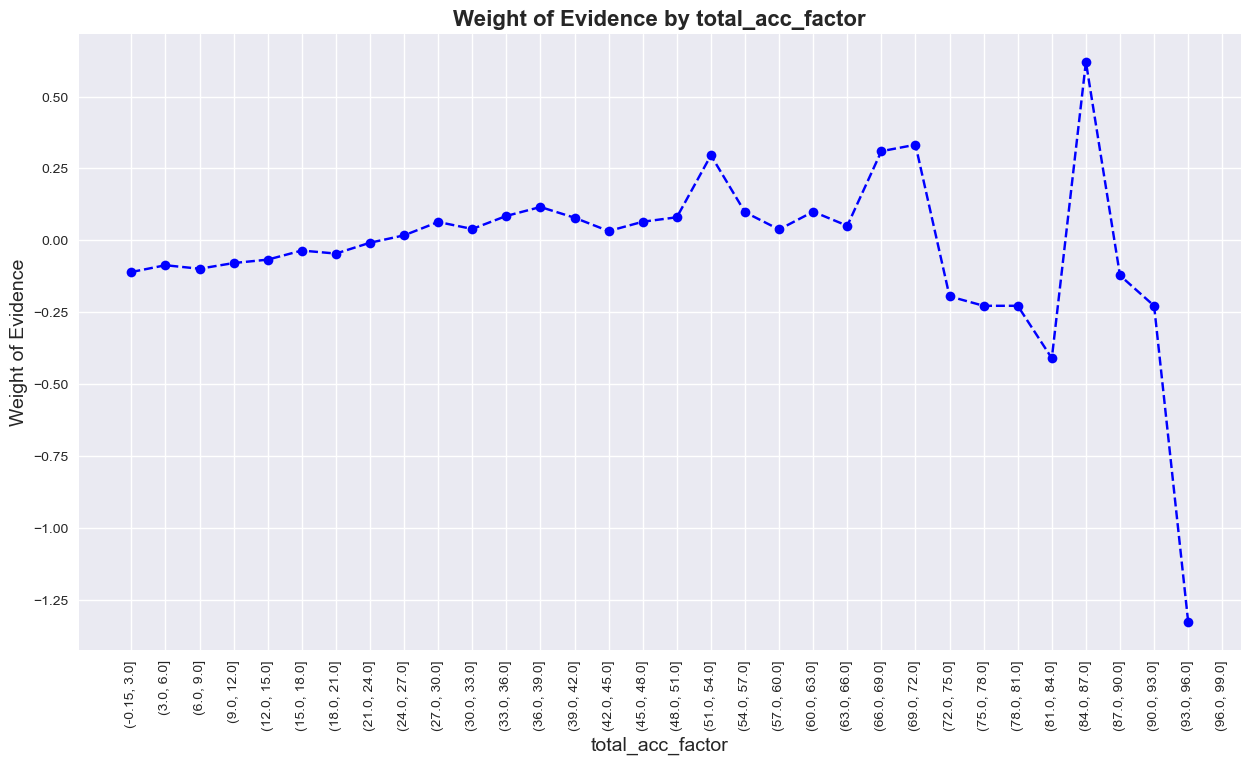

In [163]:
plot_by_woe(df_w, 90)

It is almost a constant function. So, there are no relationships between 'total_acc' and 'WoE'. Hence, we __do not to include the total_acc variable in the PD model__.  

In [164]:
feat_info('acc_now_delinq')

The number of accounts on which the borrower is now delinquent.


In [165]:
df_w = woe_ordered_continuous(df_pre_X, 'acc_now_delinq', df_pre_y)
df_w

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  181046   0.790385    0.997257  143096.0  37950.0   
1             1.0     474   0.708861    0.002611     336.0    138.0   
2             2.0      20   0.700000    0.000110      14.0      6.0   
3             3.0       3   0.333333    0.000017       1.0      2.0   
4             4.0       1   1.000000    0.000006       1.0      0.0   

   prop_n_good  prop_n_bad       WoE   IV  
0     0.997546    0.996168  0.001383  inf  
1     0.002342    0.003622 -0.436006  inf  
2     0.000098    0.000157 -0.478565  inf  
3     0.000007    0.000052 -2.019010  inf  
4     0.000007    0.000000       inf  inf

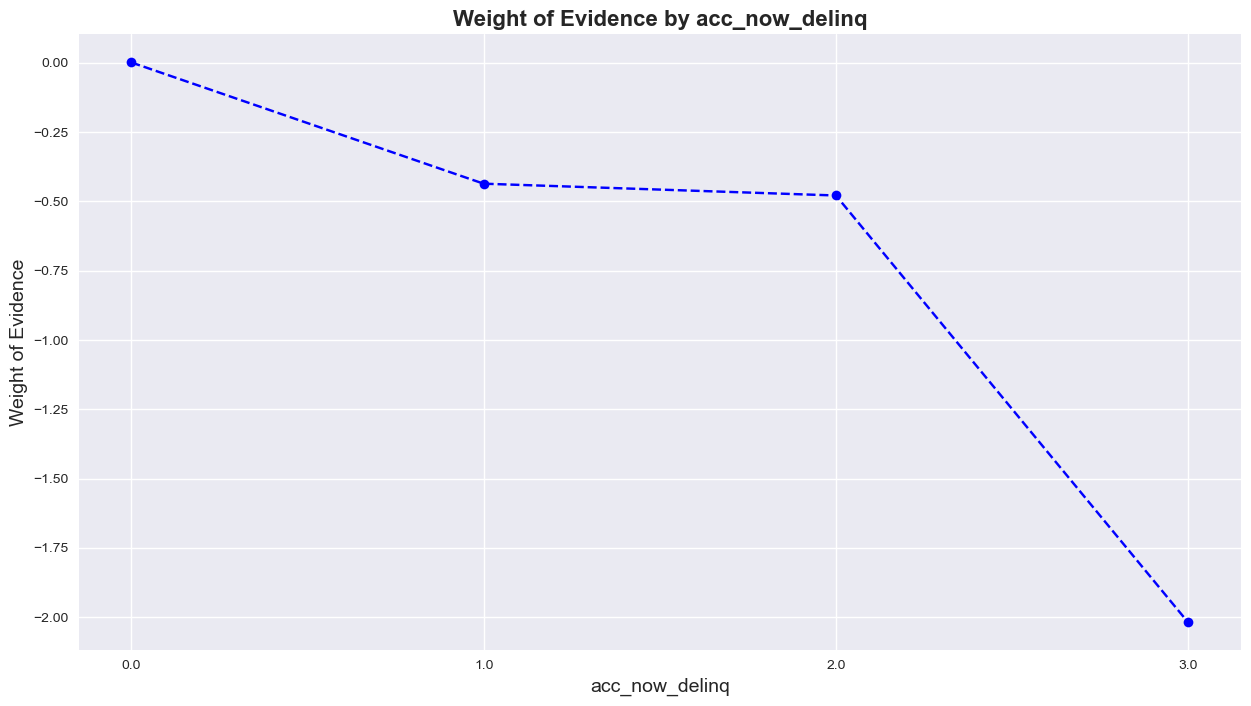

In [166]:
plot_by_woe(df_w)

In [167]:
df_pre_X['acc_now_delinq:0'] = np.where((df_pre_X['acc_now_delinq'] == 0), 1, 0)
df_pre_X['acc_now_delinq:>=1'] = np.where((df_pre_X['acc_now_delinq'] >= 1), 1, 0)

__total_rev_hi_lim: Total revolving high credit/credit limit__

In [168]:
df_pre_X['total_rev_hi_lim_factor'] = pd.cut(df_pre_X['total_rev_hi_lim'], 2000)
df_w = woe_ordered_continuous(df_pre_X, 'total_rev_hi_lim_factor', df_pre_y)
df_w

C:\Users\m10sa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  \
0          (-2013.133, 1006.566]    242   0.756198    0.001840   183.0   
1           (1006.566, 2013.133]    460   0.686957    0.003497   316.0   
2             (2013.133, 3019.7]    810   0.703704    0.006158   570.0   
3             (3019.7, 4026.266]   1192   0.739094    0.009062   881.0   
4           (4026.266, 5032.832]   1932   0.739648    0.014688  1429.0   
5           (5032.832, 6039.399]   2471   0.739377    0.018785  1827.0   
6           (6039.399, 7045.966]   2931   0.741385    0.022283  2173.0   
7           (7045.966, 8052.532]   3158   0.754275    0.024008  2382.0   
8           (8052.532, 9059.098]   3636   0.748075    0.027642  2720.0   
9          (9059.098, 10065.665]   3819   0.757004    0.029033  2891.0   
10        (10065.665, 11072.232]   3876   0.757998    0.029467  2938.0   
11        (11072.232, 12078.798]   4005   0.759301    0.030447  3041.0   
12        (12078.798, 13085.364]   4031   0.753163    0.030645  3036.0   
13        (13085.364, 14091.931]   4056   0.755178    0.030835  3063.0   
14        (14091.931, 15098.498]   4102   0.761580    0.031185  3124.0   
15        (15098.498, 16105.064]   4364   0.753666    0.033177  3289.0   
16         (16105.064, 17111.63]   3958   0.759474    0.030090  3006.0   
17         (17111.63, 18118.197]   3748   0.763340    0.028494  2861.0   
18        (18118.197, 19124.764]   3549   0.752043    0.026981  2669.0   
19         (19124.764, 20131.33]   3554   0.770400    0.027019  2738.0   
20         (20131.33, 21137.896]   3355   0.774367    0.025506  2598.0   
21        (21137.896, 22144.463]   3104   0.773196    0.023598  2400.0   
22         (22144.463, 23151.03]   3120   0.766987    0.023719  2393.0   
23         (23151.03, 24157.596]   2958   0.765720    0.022488  2265.0   
24        (24157.596, 25164.163]   2783   0.772548    0.021157  2150.0   
25        (25164.163, 26170.729]   2779   0.776538    0.021127  2158.0   
26        (26170.729, 27177.296]   2665   0.769606    0.020260  2051.0   
27        (27177.296, 28183.862]   2518   0.766084    0.019143  1929.0   
28        (28183.862, 29190.428]   2307   0.781101    0.017539  1802.0   
29        (29190.428, 30196.995]   2222   0.777228    0.016892  1727.0   
30        (30196.995, 31203.562]   2257   0.765175    0.017159  1727.0   
31        (31203.562, 32210.128]   1906   0.778594    0.014490  1484.0   
32        (32210.128, 33216.694]   1883   0.766861    0.014315  1444.0   
33        (33216.694, 34223.261]   1810   0.771271    0.013760  1396.0   
34        (34223.261, 35229.828]   1790   0.769832    0.013608  1378.0   
35        (35229.828, 36236.394]   1567   0.763880    0.011913  1197.0   
36         (36236.394, 37242.96]   1493   0.787006    0.011350  1175.0   
37         (37242.96, 38249.527]   1443   0.783784    0.010970  1131.0   
38        (38249.527, 39256.094]   1389   0.793377    0.010560  1102.0   
39         (39256.094, 40262.66]   1354   0.793944    0.010294  1075.0   
40         (40262.66, 41269.227]   1280   0.789844    0.009731  1011.0   
41        (41269.227, 42275.793]   1198   0.808848    0.009108   969.0   
42         (42275.793, 43282.36]   1161   0.776916    0.008826   902.0   
43         (43282.36, 44288.926]   1086   0.787293    0.008256   855.0   
44        (44288.926, 45295.492]   1012   0.801383    0.007694   811.0   
45        (45295.492, 46302.059]   1088   0.788603    0.008271   858.0   
46        (46302.059, 47308.626]    900   0.821111    0.006842   739.0   
47        (47308.626, 48315.192]    901   0.794673    0.006850   716.0   
48        (48315.192, 49321.758]    822   0.782238    0.006249   643.0   
49        (49321.758, 50328.325]    774   0.779070    0.005884   603.0   
50        (50328.325, 51334.892]    727   0.792297    0.005527   576.0   
51        (51334.892, 52341.458]    718   0.798050    0.005458   573.0   
52        (52341.458, 53348.024]    686   0.794461    0.005215   545.0   
53        (53

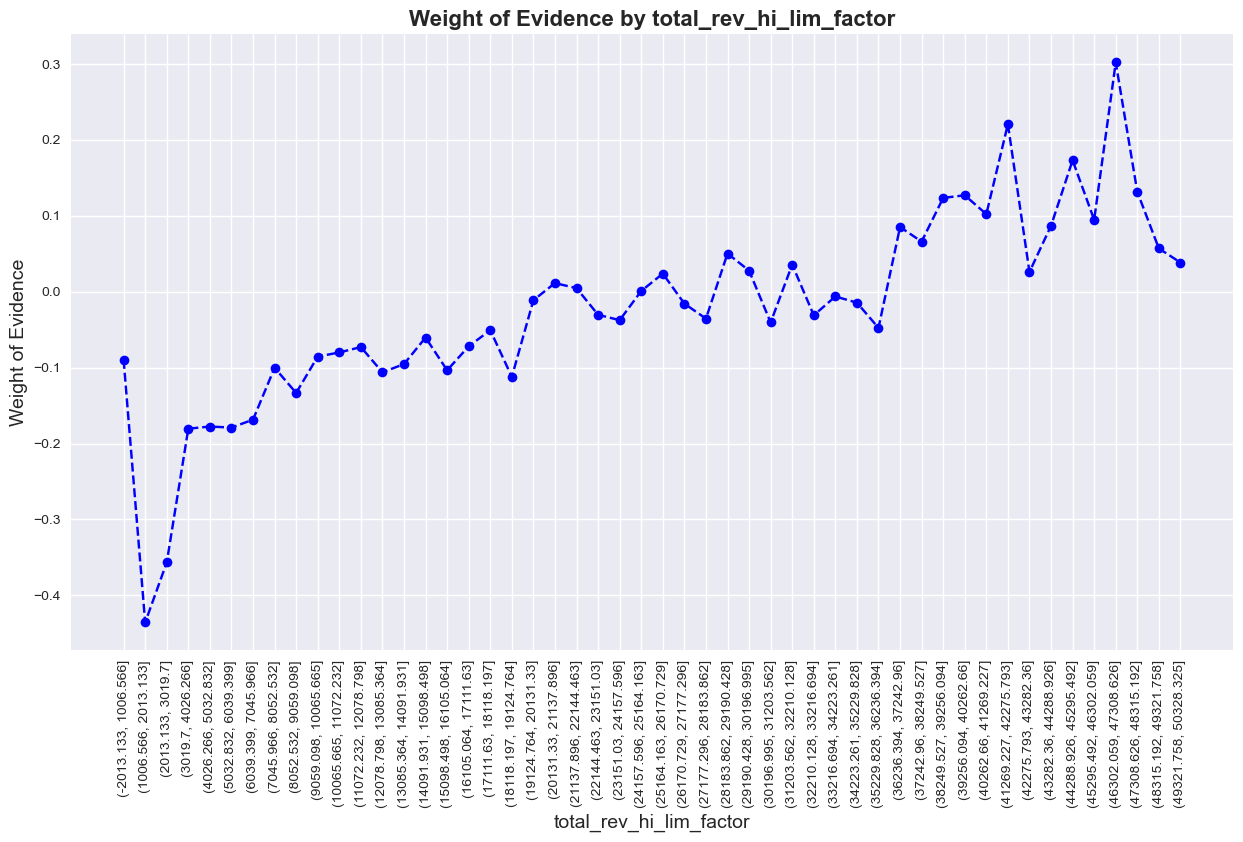

In [169]:
plot_by_woe(df_w.iloc[:50, :], 90)

There are no relationships between 'total_rev_hi_lim' and 'WoE'. Hence, we __do not to include the total_rev_hi_lim variable in the PD model__.

In [170]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [171]:
df_pre_X['installment_factor'] = pd.cut(df_pre_X['installment'], 50)
df_w = woe_ordered_continuous(df_pre_X, 'installment_factor', df_pre_y)
df_w

installment_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (14.298, 43.539]   1106   0.839060    0.006092    928.0   178.0   
1       (43.539, 71.388]   2932   0.844475    0.016150   2476.0   456.0   
2       (71.388, 99.236]   4093   0.831664    0.022545   3404.0   689.0   
3      (99.236, 127.085]   5250   0.825333    0.028919   4333.0   917.0   
4     (127.085, 154.934]   5708   0.824807    0.031441   4708.0  1000.0   
5     (154.934, 182.783]   8818   0.815718    0.048572   7193.0  1625.0   
6     (182.783, 210.632]   9128   0.834794    0.050280   7620.0  1508.0   
7      (210.632, 238.48]   7676   0.820479    0.042282   6298.0  1378.0   
8      (238.48, 266.329]   9035   0.809408    0.049768   7313.0  1722.0   
9     (266.329, 294.178]   9495   0.784518    0.052301   7449.0  2046.0   
10    (294.178, 322.027]   9656   0.797121    0.053188   7697.0  1959.0   
11    (322.027, 349.876]  12678   0.793895    0.069834  10065.0  2613.0   
12    (349.876, 377.724]   9153   0.772861    0.050418   7074.0  2079.0   
13    (377.724, 405.573]   8632   0.799235    0.047548   6899.0  1733.0   
14    (405.573, 433.422]   6855   0.782349    0.037759   5363.0  1492.0   
15    (433.422, 461.271]   5977   0.767944    0.032923   4590.0  1387.0   
16     (461.271, 489.12]   6965   0.775449    0.038365   5401.0  1564.0   
17     (489.12, 516.968]   7220   0.775762    0.039770   5601.0  1619.0   
18    (516.968, 544.817]   5389   0.740212    0.029684   3989.0  1400.0   
19    (544.817, 572.666]   4775   0.758743    0.026302   3623.0  1152.0   
20    (572.666, 600.515]   4305   0.739837    0.023713   3185.0  1120.0   
21    (600.515, 628.364]   4024   0.793489    0.022165   3193.0   831.0   
22    (628.364, 656.212]   3748   0.785752    0.020645   2945.0   803.0   
23    (656.212, 684.061]   3989   0.783906    0.021973   3127.0   862.0   
24     (684.061, 711.91]   3184   0.763819    0.017538   2432.0   752.0   
25     (711.91, 739.759]   2217   0.774470    0.012212   1717.0   500.0   
26    (739.759, 767.608]   2250   0.768444    0.012394   1729.0   521.0   
27    (767.608, 795.456]   2013   0.771485    0.011088   1553.0   460.0   
28    (795.456, 823.305]   1833   0.769231    0.010097   1410.0   423.0   
29    (823.305, 851.154]   1663   0.760673    0.009160   1265.0   398.0   
30    (851.154, 879.003]   1900   0.776842    0.010466   1476.0   424.0   
31    (879.003, 906.852]   1378   0.729318    0.007590   1005.0   373.0   
32      (906.852, 934.7]   1027   0.713729    0.005657    733.0   294.0   
33      (934.7, 962.549]   1091   0.740605    0.006010    808.0   283.0   
34    (962.549, 990.398]    926   0.682505    0.005101    632.0   294.0   
35   (990.398, 1018.247]    747   0.706827    0.004115    528.0   219.0   
36  (1018.247, 1046.096]    588   0.743197    0.003239    437.0   151.0   
37  (1046.096, 1073.944]    406   0.763547    0.002236    310.0    96.0   
38  (1073.944, 1101.793]    436   0.850917    0.002402    371.0    65.0   
39  (1101.793, 1129.642]    430   0.858140    0.002369    369.0    61.0   
40  (1129.642, 1157.491]    428   0.820093    0.002358    351.0    77.0   
41   (1157.491, 1185.34]    474   0.801688    0.002611    380.0    94.0   
42   (1185.34, 1213.188]    523   0.780115    0.002881    408.0   115.0   
43  (1213.188, 1241.037]    519   0.795761    0.002859    413.0   106.0   
44  (1241.037, 1268.886]    317   0.741325    0.001746    235.0    82.0   
45  (1268.886, 1296.735]    341   0.741935    0.001878    253.0    88.0   
46  (1296.735, 1324.584]    123   0.634146    0.000678     78.0    45.0   
47  (1324.584, 1352.432]     72   0.666667    0.000397     48.0    24.0   
48  (1352.432, 1380.281]     37   0.621622    0.000204     23.0    14.0   
49   (1380.281, 1408.13]     14   0.714286    0.000077     10.0     4.0   

    prop_n_good  prop_n_bad       WoE        IV  
0      0.006469    0.004672  0.325385  0.030911  
1      0.017261    0.011970  0.366044  0.030911  
2      0.023730    0.018086  0

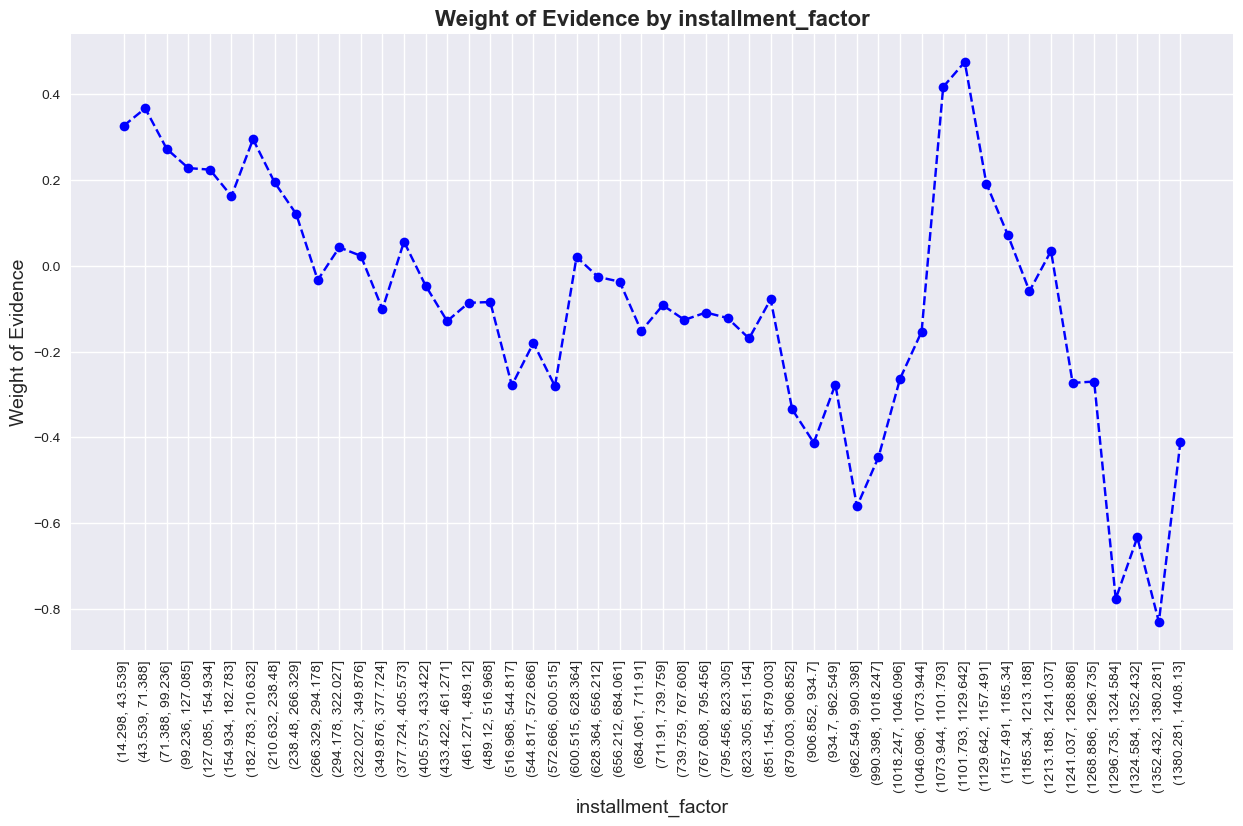

In [172]:
plot_by_woe(df_w, 90)

We don not create dummy variables for the 'installment' variable.

In [173]:
feat_info('annual_inc')

The self-reported annual income provided by the borrower during registration.


In [174]:
df_pre_X['annual_inc_factor'] = pd.cut(df_pre_X['annual_inc'], 50)
df_w = woe_ordered_continuous(df_pre_X, 'annual_inc_factor', df_pre_y)
df_w

annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0     (-5243.882, 144693.64]  171974   0.787090    0.947286  135359.0   
1     (144693.64, 287491.28]    8649   0.844606    0.047641    7305.0   
2     (287491.28, 430288.92]     650   0.835385    0.003580     543.0   
3     (430288.92, 573086.56]     136   0.889706    0.000749     121.0   
4      (573086.56, 715884.2]      64   0.890625    0.000353      57.0   
5      (715884.2, 858681.84]      30   0.800000    0.000165      24.0   
6    (858681.84, 1001479.48]      19   0.947368    0.000105      18.0   
7   (1001479.48, 1144277.12]       3   1.000000    0.000017       3.0   
8   (1144277.12, 1287074.76]       8   0.875000    0.000044       7.0   
9    (1287074.76, 1429872.4]       2   1.000000    0.000011       2.0   
10   (1429872.4, 1572670.04]       1   1.000000    0.000006       1.0   
11  (1572670.04, 1715467.68]       0        NaN    0.000000       NaN   
12  (1715467.68, 1858265.32]       1   1.000000    0.000006       1.0   
13  (1858265.32, 2001062.96]       2   1.000000    0.000011       2.0   
14   (2001062.96, 2143860.6]       1   1.000000    0.000006       1.0   
15   (2143860.6, 2286658.24]       0        NaN    0.000000       NaN   
16  (2286658.24, 2429455.88]       0        NaN    0.000000       NaN   
17  (2429455.88, 2572253.52]       0        NaN    0.000000       NaN   
18  (2572253.52, 2715051.16]       0        NaN    0.000000       NaN   
19   (2715051.16, 2857848.8]       0        NaN    0.000000       NaN   
20   (2857848.8, 3000646.44]       0        NaN    0.000000       NaN   
21  (3000646.44, 3143444.08]       0        NaN    0.000000       NaN   
22  (3143444.08, 3286241.72]       0        NaN    0.000000       NaN   
23  (3286241.72, 3429039.36]       0        NaN    0.000000       NaN   
24   (3429039.36, 3571837.0]       0        NaN    0.000000       NaN   
25   (3571837.0, 3714634.64]       0        NaN    0.000000       NaN   
26  (3714634.64, 3857432.28]       0        NaN    0.000000       NaN   
27  (3857432.28, 4000229.92]       0        NaN    0.000000       NaN   
28  (4000229.92, 4143027.56]       0        NaN    0.000000       NaN   
29   (4143027.56, 4285825.2]       0        NaN    0.000000       NaN   
30   (4285825.2, 4428622.84]       0        NaN    0.000000       NaN   
31  (4428622.84, 4571420.48]       0        NaN    0.000000       NaN   
32  (4571420.48, 4714218.12]       0        NaN    0.000000       NaN   
33  (4714218.12, 4857015.76]       0        NaN    0.000000       NaN   
34   (4857015.76, 4999813.4]       1   1.000000    0.000006       1.0   
35   (4999813.4, 5142611.04]       1   1.000000    0.000006       1.0   
36  (5142611.04, 5285408.68]       0        NaN    0.000000       NaN   
37  (5285408.68, 5428206.32]       0        NaN    0.000000       NaN   
38  (5428206.32, 5571003.96]       0        NaN    0.000000       NaN   
39   (5571003.96, 5713801.6]       0        NaN    0.000000       NaN   
40   (5713801.6, 5856599.24]       0        NaN    0.000000       NaN   
41  (5856599.24, 5999396.88]       0        NaN    0.000000       NaN   
42  (5999396.88, 6142194.52]       1   1.000000    0.000006       1.0   
43  (6142194.52, 6284992.16]       0        NaN    0.000000       NaN   
44   (6284992.16, 6427789.8]       0        NaN    0.000000       NaN   
45   (6427789.8, 6570587.44]       0        NaN    0.000000       NaN   
46  (6570587.44, 6713385.08]       0        NaN    0.000000       NaN   
47  (6713385.08, 6856182.72]       0        NaN    0.000000       NaN   
48  (6856182.72, 6998980.36]       0        NaN    0.000000       NaN   
49   (6998980.36, 7141778.0]       1   1.000000    0.000006       1.0   

      n_bad  prop_n_good  prop_n_bad       WoE   IV  
0   36615.0     0.943610    0.961125 -0.018391  inf  
1    1344.0     0.050924    0.035279  0.367045  inf  
2     107.0     0.003785    0.002809  0.298417  inf  
3      15.0     0.000844    0.000394  0.761877  inf  
4       7.0     0

In [175]:
df_pre_X['annual_inc_factor'] = pd.cut(df_pre_X['annual_inc'], 100)
df_w = woe_ordered_continuous(df_pre_X, 'annual_inc_factor', df_pre_y)
df_w

annual_inc_factor   n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0      (-5243.882, 73294.82]  114779   0.766970    0.632238  88032.0  26747.0   
1      (73294.82, 144693.64]   57195   0.827467    0.315048  47327.0   9868.0   
2     (144693.64, 216092.46]    7260   0.844628    0.039990   6132.0   1128.0   
3     (216092.46, 287491.28]    1389   0.844492    0.007651   1173.0    216.0   
4      (287491.28, 358890.1]     486   0.833333    0.002677    405.0     81.0   
5      (358890.1, 430288.92]     164   0.841463    0.000903    138.0     26.0   
6     (430288.92, 501687.74]      97   0.907216    0.000534     88.0      9.0   
7     (501687.74, 573086.56]      39   0.846154    0.000215     33.0      6.0   
8     (573086.56, 644485.38]      34   0.823529    0.000187     28.0      6.0   
9      (644485.38, 715884.2]      30   0.966667    0.000165     29.0      1.0   
10     (715884.2, 787283.02]      17   0.882353    0.000094     15.0      2.0   
11    (787283.02, 858681.84]      13   0.692308    0.000072      9.0      4.0   
12    (858681.84, 930080.66]      12   1.000000    0.000066     12.0      0.0   
13   (930080.66, 1001479.48]       7   0.857143    0.000039      6.0      1.0   
14   (1001479.48, 1072878.3]       0        NaN    0.000000      NaN      NaN   
15   (1072878.3, 1144277.12]       3   1.000000    0.000017      3.0      0.0   
16  (1144277.12, 1215675.94]       6   1.000000    0.000033      6.0      0.0   
17  (1215675.94, 1287074.76]       2   0.500000    0.000011      1.0      1.0   
18  (1287074.76, 1358473.58]       1   1.000000    0.000006      1.0      0.0   
19   (1358473.58, 1429872.4]       1   1.000000    0.000006      1.0      0.0   
20   (1429872.4, 1501271.22]       1   1.000000    0.000006      1.0      0.0   
21  (1501271.22, 1572670.04]       0        NaN    0.000000      NaN      NaN   
22  (1572670.04, 1644068.86]       0        NaN    0.000000      NaN      NaN   
23  (1644068.86, 1715467.68]       0        NaN    0.000000      NaN      NaN   
24   (1715467.68, 1786866.5]       1   1.000000    0.000006      1.0      0.0   
25   (1786866.5, 1858265.32]       0        NaN    0.000000      NaN      NaN   
26  (1858265.32, 1929664.14]       1   1.000000    0.000006      1.0      0.0   
27  (1929664.14, 2001062.96]       1   1.000000    0.000006      1.0      0.0   
28  (2001062.96, 2072461.78]       1   1.000000    0.000006      1.0      0.0   
29   (2072461.78, 2143860.6]       0        NaN    0.000000      NaN      NaN   
30   (2143860.6, 2215259.42]       0        NaN    0.000000      NaN      NaN   
31  (2215259.42, 2286658.24]       0        NaN    0.000000      NaN      NaN   
32  (2286658.24, 2358057.06]       0        NaN    0.000000      NaN      NaN   
33  (2358057.06, 2429455.88]       0        NaN    0.000000      NaN      NaN   
34   (2429455.88, 2500854.7]       0        NaN    0.000000      NaN      NaN   
35   (2500854.7, 2572253.52]       0        NaN    0.000000      NaN      NaN   
36  (2572253.52, 2643652.34]       0        NaN    0.000000      NaN      NaN   
37  (2643652.34, 2715051.16]       0        NaN    0.000000      NaN      NaN   
38  (2715051.16, 2786449.98]       0        NaN    0.000000      NaN      NaN   
39   (2786449.98, 2857848.8]       0        NaN    0.000000      NaN      NaN   
40   (2857848.8, 2929247.62]       0        NaN    0.000000      NaN      NaN   
41  (2929247.62, 3000646.44]       0        NaN    0.000000      NaN      NaN   
42  (3000646.44, 3072045.26]       0        NaN    0.000000      NaN      NaN   
43  (3072045.26, 3143444.08]       0        NaN    0.000000      NaN      NaN   
44   (3143444.08, 3214842.9]       0        NaN    0.000000      NaN      NaN   
45   (3214842.9, 3286241.72]       0        NaN    0.000000      NaN      NaN   
46  (3286241.72, 3357640.54]       0        NaN    0.000000      NaN      NaN   
47  (3357640.54, 3429039.36]       0        NaN    0.000000      NaN      NaN   
48  (3429039.36, 3500438.18]       0      

In [176]:
df_pre_X_temp = df_pre_X.loc[df_pre_X['annual_inc'] < 150000] 
df_pre_X_temp.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
452448  11324653   13236804      13150        13150          13150.0   
363441  19607169   21829881       5000         5000           5000.0   
465236  10179630   12031182      24000        24000          24000.0   
464608  10130139   11981735       3000         3000           3000.0   
214960   1324189    1569198      10000        10000          10000.0   

        int_rate  installment grade sub_grade                   emp_title  \
452448     23.70       513.85     F        F1                         NaN   
363441     10.15       161.69     B        B2                Truck Driver   
465236     22.40       668.33     E        E3                     Bailiff   
464608     23.70       117.23     F        F1              security guard   
214960     12.12       332.72     B        B3  Nursing Personel Home Care   

       home_ownership  annual_inc verification_status  loan_status pymnt_plan  \
452448       MORTGAGE     36640.0            Verified   Fully Paid          n   
363441           RENT     52000.0     Source Verified   Fully Paid          n   
465236           RENT     84000.0     Source Verified   Fully Paid          n   
464608           RENT     32000.0        Not Verified  Charged Off          n   
214960           RENT     32000.0     Source Verified  Charged Off          n   

                                                                          url  \
452448  https://www.lendingclub.com/browse/loanDetail.action?loan_id=11324653   
363441  https://www.lendingclub.com/browse/loanDetail.action?loan_id=19607169   
465236  https://www.lendingclub.com/browse/loanDetail.action?loan_id=10179630   
464608  https://www.lendingclub.com/browse/loanDetail.action?loan_id=10130139   
214960   https://www.lendingclub.com/browse/loanDetail.action?loan_id=1324189   

                                                                                          desc  \
452448                                                                                     NaN   
363441                                                                                     NaN   
465236    Borrower added on 12/31/13 > Pay off credit cards and loan to One Main financial<br>   
464608                                                                                     NaN   
214960                                                                                     NaN   

                   purpose               title zip_code addr_state    dti  \
452448  debt_consolidation  Debt consolidation    483xx         MI  18.08   
363441  debt_consolidation  Debt consolidation    492xx         MI   8.59   
465236  debt_consolidation         one payment    322xx         FL  22.26   
464608  debt_consolidation     pay credit card    895xx         NV   1.13   
214960  debt_consolidation  Debt Consolidation    112xx         NY  13.31   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
452448          1.0             2.0                     5.0   
363441          0.0             0.0                    32.0   
465236          3.0             1.0                    16.0   
464608          0.0             0.0                    47.0   
214960          0.0             0.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
452448                     NaN      12.0      0.0      18215        42.2   
363441                    63.0       6.0      2.0       5899        32.8   
465236                     NaN      11.0      0.0      20820        93.4   
464608                     NaN       2.0      0.0       1549        31.0   
214960                     NaN      10.0      0.0       6160        34.2   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
452448       32.0                   f        0.0            0.0     17199.66   
363441       18.0                   f        0.0            0.0      5294.39   
465236       30.

In [177]:
len(df_pre_X)

181544

In [178]:
len(df_pre_X_temp)

172745

In [179]:
df_pre_X_temp['annual_inc_factor'] = pd.cut(df_pre_X_temp['annual_inc'], 50)
df_w = woe_ordered_continuous(df_pre_X_temp, 'annual_inc_factor', df_pre_y[df_pre_X_temp.index])
df_w  

C:\Users\m10sa\AppData\Local\Temp\ipykernel_5912\2407495065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_X_temp['annual_inc_factor'] = pd.cut(df_pre_X_temp['annual_inc'], 50)


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good   n_bad  \
0      (1747.936, 4857.28]     15   0.733333    0.000087    11.0     4.0   
1       (4857.28, 7818.56]     32   0.781250    0.000185    25.0     7.0   
2      (7818.56, 10779.84]    214   0.747664    0.001239   160.0    54.0   
3     (10779.84, 13741.12]    387   0.702842    0.002240   272.0   115.0   
4      (13741.12, 16702.4]    722   0.711911    0.004180   514.0   208.0   
5      (16702.4, 19663.68]   1034   0.727273    0.005986   752.0   282.0   
6     (19663.68, 22624.96]   1826   0.721796    0.010570  1318.0   508.0   
7     (22624.96, 25586.24]   3254   0.745237    0.018837  2425.0   829.0   
8     (25586.24, 28547.52]   2815   0.716874    0.016296  2018.0   797.0   
9      (28547.52, 31508.8]   5221   0.738939    0.030224  3858.0  1363.0   
10     (31508.8, 34470.08]   4466   0.738468    0.025853  3298.0  1168.0   
11    (34470.08, 37431.36]   7195   0.741209    0.041651  5333.0  1862.0   
12    (37431.36, 40392.64]   9168   0.751200    0.053072  6887.0  2281.0   
13    (40392.64, 43353.92]   6307   0.757571    0.036510  4778.0  1529.0   
14     (43353.92, 46315.2]   8299   0.763947    0.048042  6340.0  1959.0   
15     (46315.2, 49276.48]   5802   0.766287    0.033587  4446.0  1356.0   
16    (49276.48, 52237.76]  11037   0.775482    0.063892  8559.0  2478.0   
17    (52237.76, 55199.04]   8222   0.777062    0.047596  6389.0  1833.0   
18    (55199.04, 58160.32]   5181   0.785563    0.029992  4070.0  1111.0   
19     (58160.32, 61121.6]   9342   0.770392    0.054080  7197.0  2145.0   
20     (61121.6, 64082.88]   4594   0.800827    0.026594  3679.0   915.0   
21    (64082.88, 67044.16]   7740   0.791344    0.044806  6125.0  1615.0   
22    (67044.16, 70005.44]   7669   0.800365    0.044395  6138.0  1531.0   
23    (70005.44, 72966.72]   3492   0.814147    0.020215  2843.0   649.0   
24     (72966.72, 75928.0]   6521   0.801871    0.037749  5229.0  1292.0   
25     (75928.0, 78889.28]   3070   0.820521    0.017772  2519.0   551.0   
26    (78889.28, 81850.56]   5909   0.807751    0.034206  4773.0  1136.0   
27    (81850.56, 84811.84]   3002   0.834777    0.017378  2506.0   496.0   
28    (84811.84, 87773.12]   4847   0.824015    0.028059  3994.0   853.0   
29     (87773.12, 90734.4]   4847   0.820508    0.028059  3977.0   870.0   
30     (90734.4, 93695.68]   2177   0.841066    0.012602  1831.0   346.0   
31    (93695.68, 96656.96]   3389   0.828563    0.019619  2808.0   581.0   
32    (96656.96, 99618.24]   1835   0.832698    0.010623  1528.0   307.0   
33   (99618.24, 102579.52]   4427   0.825841    0.025627  3656.0   771.0   
34   (102579.52, 105540.8]   2233   0.838334    0.012927  1872.0   361.0   
35   (105540.8, 108502.08]   1220   0.837705    0.007062  1022.0   198.0   
36  (108502.08, 111463.36]   2637   0.832765    0.015265  2196.0   441.0   
37  (111463.36, 114424.64]    829   0.860072    0.004799   713.0   116.0   
38  (114424.64, 117385.92]   1547   0.862961    0.008955  1335.0   212.0   
39   (117385.92, 120347.2]   2893   0.827515    0.016747  2394.0   499.0   
40   (120347.2, 123308.48]    479   0.872651    0.002773   418.0    61.0   
41  (123308.48, 126269.76]   1632   0.837010    0.009447  1366.0   266.0   
42  (126269.76, 129231.04]    442   0.841629    0.002559   372.0    70.0   
43  (129231.04, 132192.32]   1442   0.851595    0.008348  1228.0   214.0   
44   (132192.32, 135153.6]    790   0.872152    0.004573   689.0   101.0   
45   (135153.6, 138114.88]    332   0.873494    0.001922   290.0    42.0   
46  (138114.88, 141076.16]   1075   0.833488    0.006223   896.0   179.0   
47  (141076.16, 144037.44]    348   0.856322    0.002015   298.0    50.0   
48  (144037.44, 146998.72]    555   0.848649    0.003213   471.0    84.0   
49   (146998.72, 149960.0]    233   0.815451    0.001349   190.0    43.0   

    prop_n_good  prop_n_bad       WoE        IV  
0      0.000081    0.000109 -0.297259  0.046701  
1      0.000184    0.000191 -0.0

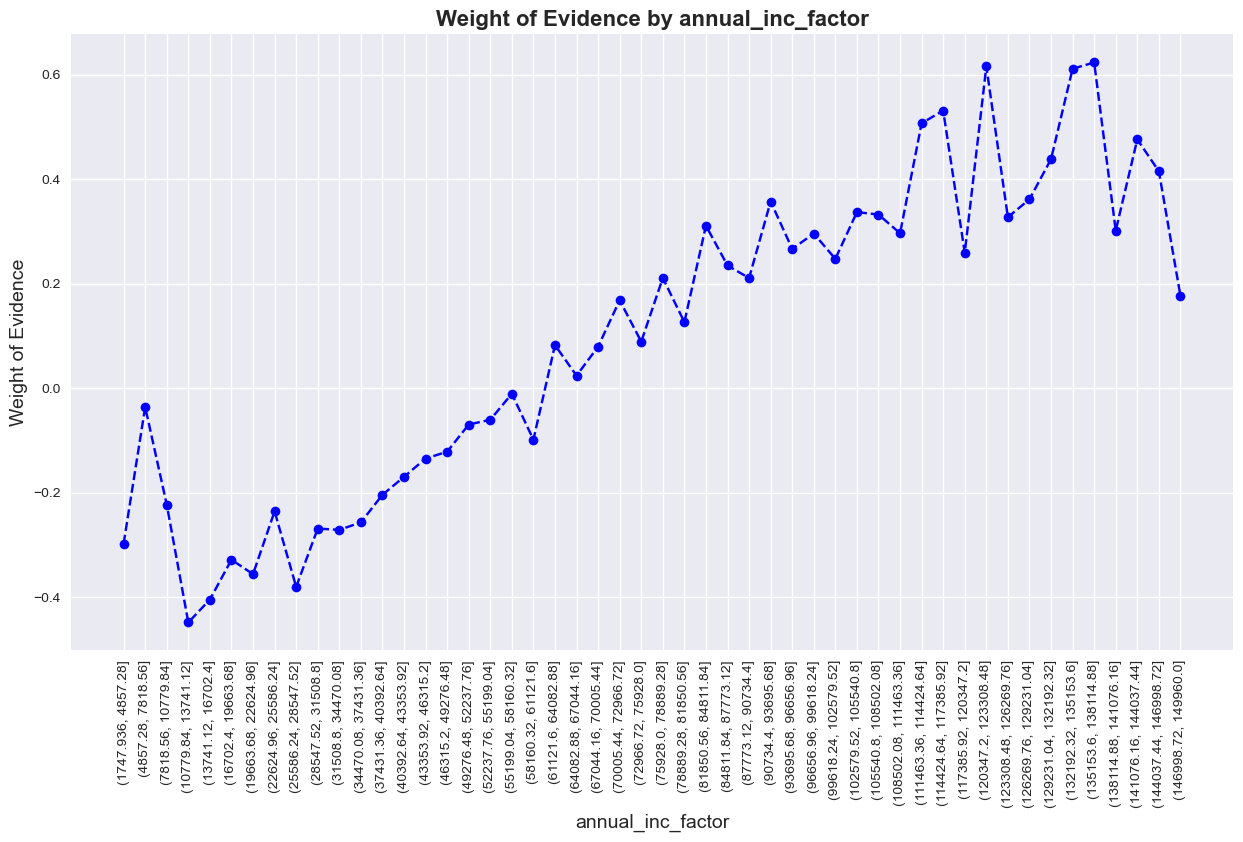

In [180]:
plot_by_woe(df_w, 90)

In [181]:
df_pre_X['annual_inc:<20K'] = np.where((df_pre_X['annual_inc'] <= 20000), 1, 0)
df_pre_X['annual_inc:20K-30K'] = np.where((df_pre_X['annual_inc'] > 20000) & (df_pre_X['annual_inc'] <= 30000), 1, 0)
df_pre_X['annual_inc:30K-40K'] = np.where((df_pre_X['annual_inc'] > 30000) & (df_pre_X['annual_inc'] <= 40000), 1, 0)
df_pre_X['annual_inc:40K-50K'] = np.where((df_pre_X['annual_inc'] > 40000) & (df_pre_X['annual_inc'] <= 50000), 1, 0)
df_pre_X['annual_inc:50K-60K'] = np.where((df_pre_X['annual_inc'] > 50000) & (df_pre_X['annual_inc'] <= 60000), 1, 0)
df_pre_X['annual_inc:60K-70K'] = np.where((df_pre_X['annual_inc'] > 60000) & (df_pre_X['annual_inc'] <= 70000), 1, 0)
df_pre_X['annual_inc:70K-80K'] = np.where((df_pre_X['annual_inc'] > 70000) & (df_pre_X['annual_inc'] <= 80000), 1, 0)
df_pre_X['annual_inc:80K-90K'] = np.where((df_pre_X['annual_inc'] > 80000) & (df_pre_X['annual_inc'] <= 90000), 1, 0)
df_pre_X['annual_inc:90K-100K'] = np.where((df_pre_X['annual_inc'] > 90000) & (df_pre_X['annual_inc'] <= 100000), 1, 0)
df_pre_X['annual_inc:100K-120K'] = np.where((df_pre_X['annual_inc'] > 100000) & (df_pre_X['annual_inc'] <= 120000), 1, 0)
df_pre_X['annual_inc:120K-150K'] = np.where((df_pre_X['annual_inc'] > 120000) & (df_pre_X['annual_inc'] <= 150000), 1, 0)
df_pre_X['annual_inc:>150K'] = np.where((df_pre_X['annual_inc'] > 150000), 1, 0)

In [182]:
feat_info('mths_since_last_delinq')

The number of months since the borrower's last delinquency.


In [183]:
pd.isnull(df_pre_X['mths_since_last_delinq']).sum()         

101281

In [184]:
df_pre_X_temp = df_pre_X[pd.notnull(df_pre_X['mths_since_last_delinq'])]
df_pre_X_temp['mths_since_last_delinq_factor'] = pd.cut(df_pre_X_temp['mths_since_last_delinq'], 50)
df_w = woe_ordered_continuous(df_pre_X_temp, 'mths_since_last_delinq_factor', df_pre_y[df_pre_X_temp.index])
df_w

C:\Users\m10sa\AppData\Local\Temp\ipykernel_5912\3943792957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_X_temp['mths_since_last_delinq_factor'] = pd.cut(df_pre_X_temp['mths_since_last_delinq'], 50)
C:\Users\m10sa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                 (-0.152, 3.04]   2440   0.734016    0.030400  1791.0   
1                   (3.04, 6.08]   3355   0.753502    0.041800  2528.0   
2                   (6.08, 9.12]   4363   0.756819    0.054359  3302.0   
3                  (9.12, 12.16]   4313   0.775562    0.053736  3345.0   
4                  (12.16, 15.2]   4398   0.758754    0.054795  3337.0   
5                  (15.2, 18.24]   4198   0.780848    0.052303  3278.0   
6                 (18.24, 21.28]   4046   0.777064    0.050409  3144.0   
7                 (21.28, 24.32]   3767   0.792939    0.046933  2987.0   
8                 (24.32, 27.36]   3810   0.787402    0.047469  3000.0   
9                  (27.36, 30.4]   3715   0.792463    0.046285  2944.0   
10                 (30.4, 33.44]   3566   0.799495    0.044429  2851.0   
11                (33.44, 36.48]   3521   0.803465    0.043868  2829.0   
12                (36.48, 39.52]   3424   0.785339    0.042660  2689.0   
13                (39.52, 42.56]   3306   0.794918    0.041190  2628.0   
14                 (42.56, 45.6]   3244   0.790999    0.040417  2566.0   
15                 (45.6, 48.64]   3074   0.797658    0.038299  2452.0   
16                (48.64, 51.68]   2380   0.776050    0.029653  1847.0   
17                (51.68, 54.72]   2208   0.786232    0.027510  1736.0   
18                (54.72, 57.76]   2098   0.792183    0.026139  1662.0   
19                 (57.76, 60.8]   2073   0.803666    0.025828  1666.0   
20                 (60.8, 63.84]   1953   0.778290    0.024333  1520.0   
21                (63.84, 66.88]   1906   0.796957    0.023747  1519.0   
22                (66.88, 69.92]   1938   0.793086    0.024146  1537.0   
23                (69.92, 72.96]   1832   0.782205    0.022825  1433.0   
24                 (72.96, 76.0]   2368   0.802365    0.029503  1900.0   
25                 (76.0, 79.04]   1602   0.791511    0.019959  1268.0   
26                (79.04, 82.08]   1242   0.772142    0.015474   959.0   
27                (82.08, 85.12]     50   0.640000    0.000623    32.0   
28                (85.12, 88.16]     14   0.857143    0.000174    12.0   
29                 (88.16, 91.2]      9   0.777778    0.000112     7.0   
30                 (91.2, 94.24]      6   0.833333    0.000075     5.0   
31                (94.24, 97.28]     11   0.636364    0.000137     7.0   
32               (97.28, 100.32]      5   0.800000    0.000062     4.0   
33              (100.32, 103.36]      3   1.000000    0.000037     3.0   
34               (103.36, 106.4]      2   1.000000    0.000025     2.0   
35               (106.4, 109.44]      2   0.000000    0.000025     0.0   
36              (109.44, 112.48]      1   0.000000    0.000012     0.0   
37              (112.48, 115.52]      2   0.500000    0.000025     1.0   
38              (115.52, 118.56]      1   1.000000    0.000012     1.0   
39               (118.56, 121.6]      2   1.000000    0.000025     2.0   
40               (121.6, 124.64]      1   1.000000    0.000012     1.0   
41              (124.64, 127.68]      0        NaN    0.000000     NaN   
42              (127.68, 130.72]      1   1.000000    0.000012     1.0   
43              (130.72, 133.76]      4   1.000000    0.000050     4.0   
44               (133.76, 136.8]      3   0.333333    0.000037     1.0   
45               (136.8, 139.84]      1   1.000000    0.000012     1.0   
46              (139.84, 142.88]      2   1.000000    0.000025     2.0   
47              (142.88, 145.92]      0        NaN    0.000000     NaN   
48              (145.92, 148.96]      1   0.000000    0.000012     0.0   
49               (148.96, 152.0]      2   0.500000    0.000025     1.0   

     n_bad  prop_n_good  prop_n_bad       WoE   IV  
0    649.0     0.028517    0.037175 -0.265140  inf  
1    827.0     0.040252    0.047371 -0.162858  inf  
2   1061.0     0.052575    0.060774 -0.144920  inf  
3    968.0     0

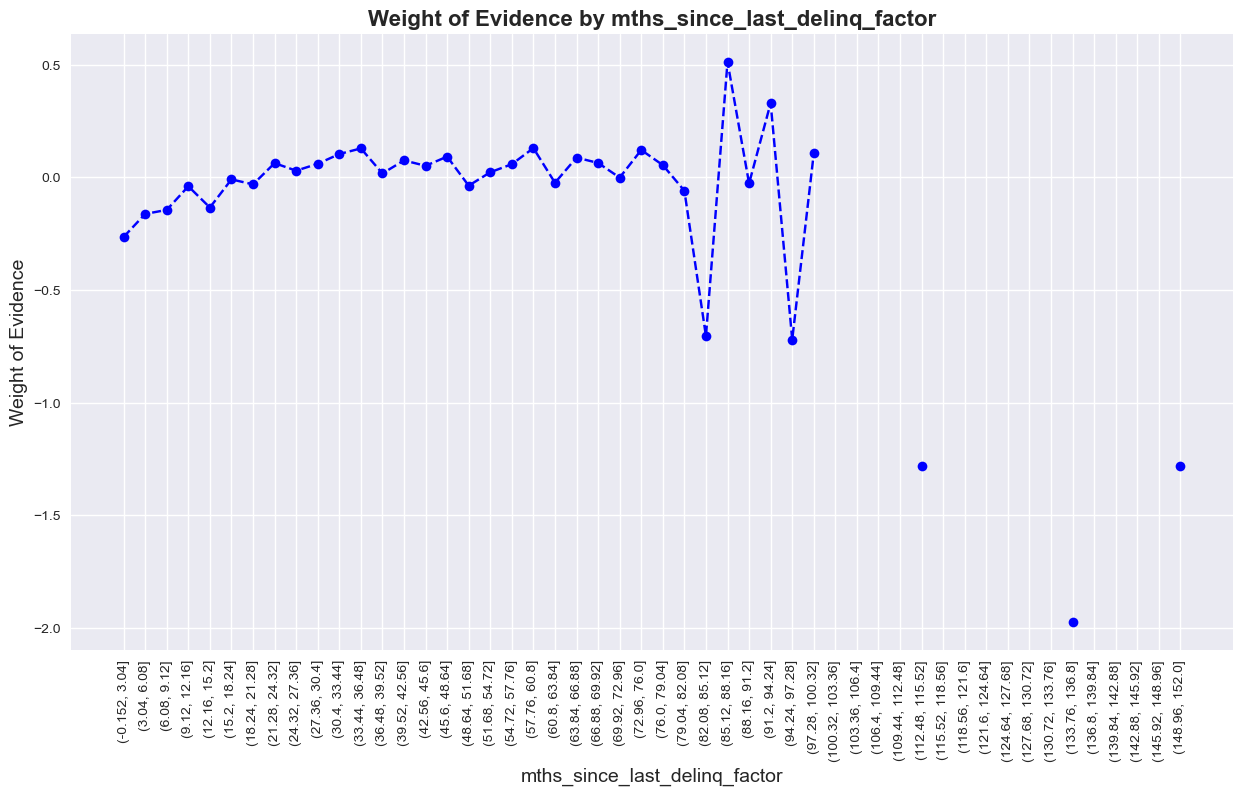

In [185]:
plot_by_woe(df_w, 90)

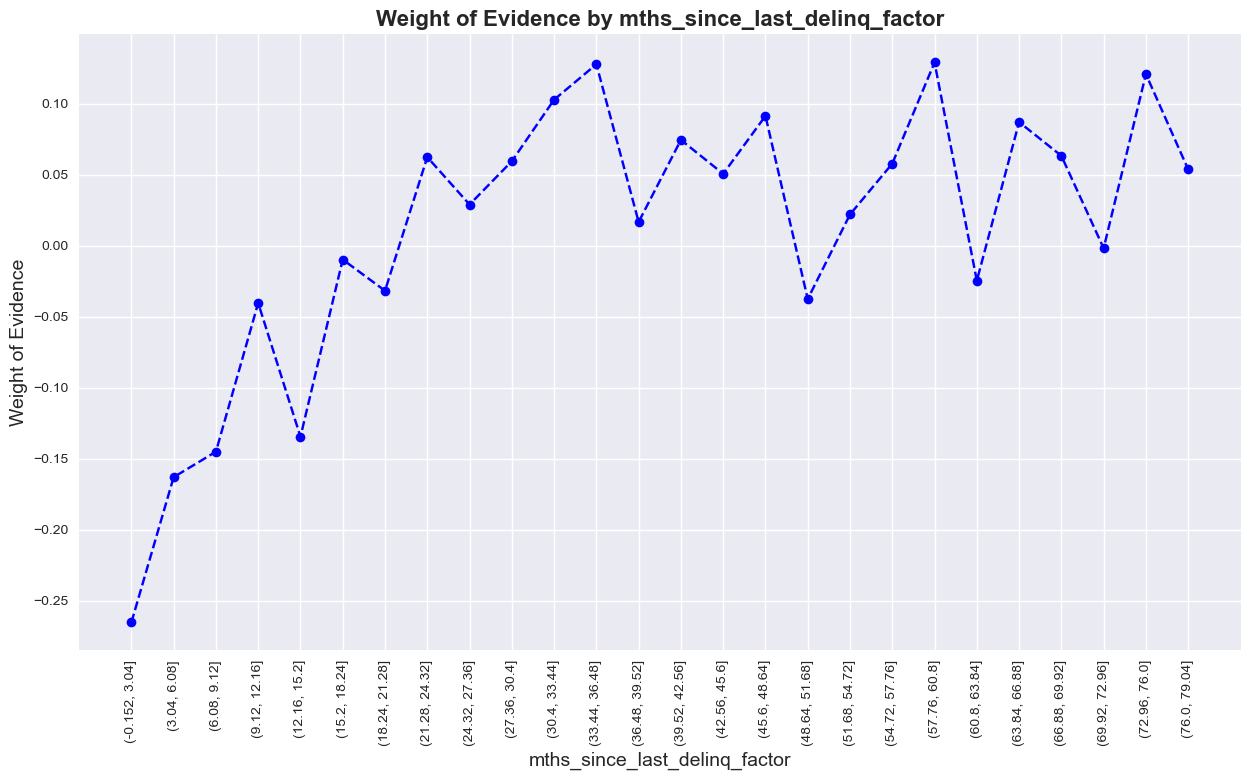

In [186]:
plot_by_woe(df_w.iloc[:26, :], 90)

In [187]:
feat_info('dti')

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [188]:
df_pre_X['dti_factor'] = pd.cut(df_pre_X['dti'], 100)
df_w = woe_ordered_continuous(df_pre_X, 'dti_factor', df_pre_y)
df_w

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    580   0.855172    0.003195   496.0   84.0   
1         (0.4, 0.8]    602   0.898671    0.003316   541.0   61.0   
2         (0.8, 1.2]    599   0.853088    0.003299   511.0   88.0   
3         (1.2, 1.6]    696   0.856322    0.003834   596.0  100.0   
4         (1.6, 2.0]    754   0.854111    0.004153   644.0  110.0   
5       (2.0, 2.399]    793   0.883985    0.004368   701.0   92.0   
6     (2.399, 2.799]    890   0.865169    0.004902   770.0  120.0   
7     (2.799, 3.199]   1039   0.848893    0.005723   882.0  157.0   
8     (3.199, 3.599]   1159   0.846419    0.006384   981.0  178.0   
9     (3.599, 3.999]   1275   0.862745    0.007023  1100.0  175.0   
10    (3.999, 4.399]   1392   0.864224    0.007668  1203.0  189.0   
11    (4.399, 4.799]   1441   0.860514    0.007937  1240.0  201.0   
12    (4.799, 5.199]   1655   0.856193    0.009116  1417.0  238.0   
13    (5.199, 5.599]   1752   0.848174    0.009651  1486.0  266.0   
14    (5.599, 5.999]   1677   0.846154    0.009237  1419.0  258.0   
15    (5.999, 6.398]   1891   0.835008    0.010416  1579.0  312.0   
16    (6.398, 6.798]   2023   0.854177    0.011143  1728.0  295.0   
17    (6.798, 7.198]   2090   0.847368    0.011512  1771.0  319.0   
18    (7.198, 7.598]   2171   0.844772    0.011959  1834.0  337.0   
19    (7.598, 7.998]   2422   0.847647    0.013341  2053.0  369.0   
20    (7.998, 8.398]   2460   0.847967    0.013550  2086.0  374.0   
21    (8.398, 8.798]   2461   0.839496    0.013556  2066.0  395.0   
22    (8.798, 9.198]   2691   0.839836    0.014823  2260.0  431.0   
23    (9.198, 9.598]   2659   0.818729    0.014647  2177.0  482.0   
24    (9.598, 9.998]   2775   0.836757    0.015286  2322.0  453.0   
25   (9.998, 10.397]   2891   0.827395    0.015925  2392.0  499.0   
26  (10.397, 10.797]   2994   0.833667    0.016492  2496.0  498.0   
27  (10.797, 11.197]   3101   0.818123    0.017081  2537.0  564.0   
28  (11.197, 11.597]   3065   0.829038    0.016883  2541.0  524.0   
29  (11.597, 11.997]   3141   0.820758    0.017302  2578.0  563.0   
30  (11.997, 12.397]   3290   0.820973    0.018122  2701.0  589.0   
31  (12.397, 12.797]   3435   0.815429    0.018921  2801.0  634.0   
32  (12.797, 13.197]   3405   0.829956    0.018756  2826.0  579.0   
33  (13.197, 13.597]   3444   0.814750    0.018971  2806.0  638.0   
34  (13.597, 13.997]   3414   0.806678    0.018805  2754.0  660.0   
35  (13.997, 14.396]   3394   0.816441    0.018695  2771.0  623.0   
36  (14.396, 14.796]   3445   0.812192    0.018976  2798.0  647.0   
37  (14.796, 15.196]   3428   0.807176    0.018882  2767.0  661.0   
38  (15.196, 15.596]   3376   0.810427    0.018596  2736.0  640.0   
39  (15.596, 15.996]   3498   0.797885    0.019268  2791.0  707.0   
40  (15.996, 16.396]   3322   0.799819    0.018299  2657.0  665.0   
41  (16.396, 16.796]   3328   0.794772    0.018332  2645.0  683.0   
42  (16.796, 17.196]   3491   0.793182    0.019229  2769.0  722.0   
43  (17.196, 17.596]   3374   0.788975    0.018585  2662.0  712.0   
44  (17.596, 17.996]   3290   0.788754    0.018122  2595.0  695.0   
45  (17.996, 18.395]   3332   0.792617    0.018354  2641.0  691.0   
46  (18.395, 18.795]   3227   0.781841    0.017775  2523.0  704.0   
47  (18.795, 19.195]   3144   0.772265    0.017318  2428.0  716.0   
48  (19.195, 19.595]   3162   0.774194    0.017417  2448.0  714.0   
49  (19.595, 19.995]   3140   0.774204    0.017296  2431.0  709.0   
50  (19.995, 20.395]   2978   0.770651    0.016404  2295.0  683.0   
51  (20.395, 20.795]   3146   0.777177    0.017329  2445.0  701.0   
52  (20.795, 21.195]   2895   0.754750    0.015947  2185.0  710.0   
53  (21.195, 21.595]   2830   0.762544    0.015589  2158.0  672.0   
54  (21.595, 21.995]   2739   0.760862    0.015087  2084.0  655.0   
55  (21.995, 22.394]   2710   0.760148    0.014928  2060.0  650.0   
56  (22.394, 22.794]   2646   0.752079    0.014575  1990.0  656.0   
57  (22.

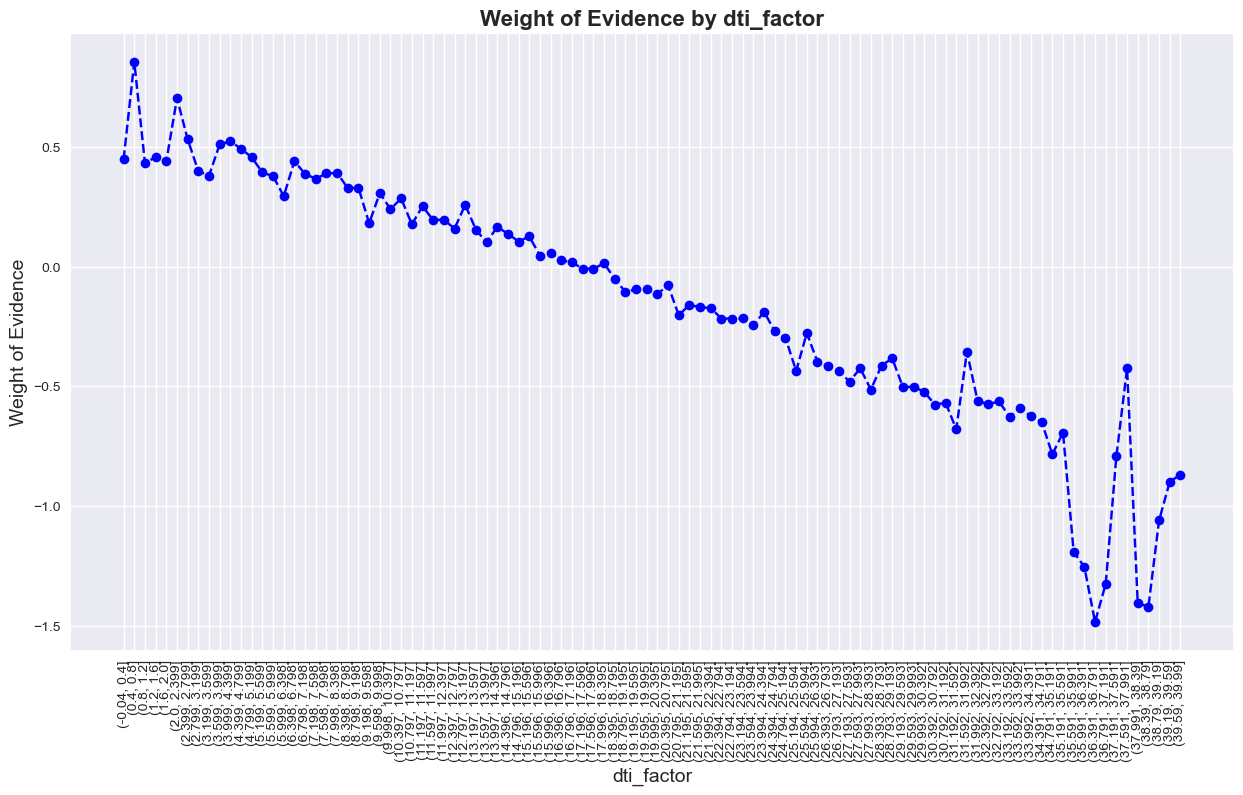

In [189]:
plot_by_woe(df_w, 90)

In [190]:
df_pre_X_temp = df_pre_X.loc[df_pre_X['dti'] <= 35, :]

In [191]:
df_pre_X_temp['dti_factor'] = pd.cut(df_pre_X_temp['dti'], 50)
df_w = woe_ordered_continuous(df_pre_X_temp, 'dti_factor', df_pre_y[df_pre_X_temp.index])
df_w

C:\Users\m10sa\AppData\Local\Temp\ipykernel_5912\1897248489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_X_temp['dti_factor'] = pd.cut(df_pre_X_temp['dti'], 50)


dti_factor  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0   (-0.035, 0.7]   1046   0.871893    0.005782   912.0   134.0     0.006374   
1      (0.7, 1.4]   1109   0.856628    0.006131   950.0   159.0     0.006639   
2      (1.4, 2.1]   1276   0.865204    0.007054  1104.0   172.0     0.007716   
3      (2.1, 2.8]   1506   0.869854    0.008325  1310.0   196.0     0.009155   
4      (2.8, 3.5]   1902   0.850683    0.010514  1618.0   284.0     0.011308   
5      (3.5, 4.2]   2258   0.864925    0.012482  1953.0   305.0     0.013649   
6      (4.2, 4.9]   2548   0.852826    0.014086  2173.0   375.0     0.015187   
7      (4.9, 5.6]   3025   0.853554    0.016722  2582.0   443.0     0.018045   
8      (5.6, 6.3]   3121   0.842358    0.017253  2629.0   492.0     0.018374   
9      (6.3, 7.0]   3478   0.848189    0.019227  2950.0   528.0     0.020617   
10     (7.0, 7.7]   3796   0.847471    0.020985  3217.0   579.0     0.022483   
11     (7.7, 8.4]   4296   0.847300    0.023749  3640.0   656.0     0.025439   
12     (8.4, 9.1]   4519   0.838681    0.024981  3790.0   729.0     0.026488   
13     (9.1, 9.8]   4731   0.828789    0.026153  3921.0   810.0     0.027403   
14    (9.8, 10.5]   5015   0.829711    0.027723  4161.0   854.0     0.029080   
15   (10.5, 11.2]   5376   0.823661    0.029719  4428.0   948.0     0.030946   
16   (11.2, 11.9]   5405   0.825902    0.029879  4464.0   941.0     0.031198   
17   (11.9, 12.6]   5793   0.822199    0.032024  4763.0  1030.0     0.033288   
18   (12.6, 13.3]   5968   0.820375    0.032992  4896.0  1072.0     0.034217   
19   (13.3, 14.0]   6066   0.810748    0.033533  4918.0  1148.0     0.034371   
20   (14.0, 14.7]   6007   0.815549    0.033207  4899.0  1108.0     0.034238   
21   (14.7, 15.4]   5841   0.807910    0.032289  4719.0  1122.0     0.032980   
22   (15.4, 16.1]   6024   0.803619    0.033301  4841.0  1183.0     0.033833   
23   (16.1, 16.8]   5812   0.795251    0.032129  4622.0  1190.0     0.032302   
24   (16.8, 17.5]   6137   0.789637    0.033926  4846.0  1291.0     0.033868   
25   (17.5, 18.2]   5791   0.796581    0.032013  4613.0  1178.0     0.032239   
26   (18.2, 18.9]   5685   0.776781    0.031427  4416.0  1269.0     0.030863   
27   (18.9, 19.6]   5407   0.775106    0.029890  4191.0  1216.0     0.029290   
28   (19.6, 20.3]   5433   0.772501    0.030034  4197.0  1236.0     0.029332   
29   (20.3, 21.0]   5441   0.771366    0.030078  4197.0  1244.0     0.029332   
30   (21.0, 21.7]   4877   0.761944    0.026960  3716.0  1161.0     0.025970   
31   (21.7, 22.4]   4745   0.757007    0.026231  3592.0  1153.0     0.025104   
32   (22.4, 23.1]   4497   0.750500    0.024860  3375.0  1122.0     0.023587   
33   (23.1, 23.8]   4354   0.753560    0.024069  3281.0  1073.0     0.022930   
34   (23.8, 24.5]   4197   0.751251    0.023201  3153.0  1044.0     0.022036   
35   (24.5, 25.2]   3697   0.736543    0.020437  2723.0   974.0     0.019031   
36   (25.2, 25.9]   2978   0.722968    0.016463  2153.0   825.0     0.015047   
37   (25.9, 26.6]   2803   0.719943    0.015495  2018.0   785.0     0.014103   
38   (26.6, 27.3]   2642   0.710825    0.014605  1878.0   764.0     0.013125   
39   (27.3, 28.0]   2459   0.704758    0.013594  1733.0   726.0     0.012112   
40   (28.0, 28.7]   2288   0.706731    0.012648  1617.0   671.0     0.011301   
41   (28.7, 29.4]   2084   0.703935    0.011520  1467.0   617.0     0.010253   
42   (29.4, 30.1]   1957   0.694430    0.010818  1359.0   598.0     0.009498   
43   (30.1, 30.8]   1391   0.687275    0.007690   956.0   435.0     0.006681   
44   (30.8, 31.5]   1264   0.662975    0.006987   838.0   426.0     0.005857   
45   (31.5, 32.2]   1197   0.715957    0.006617   857.0   340.0     0.005989   
46   (32.2, 32.9]   1044   0.673372    0.005771   703.0   341.0     0.004913   
47   (32.9, 33.6]    974   0.676591    0.005384   659.0   315.0     0.004606   
48   (33.6, 34.3]    872   0.680046    0.004820   593.0   279.0     0.004144   
49   (3

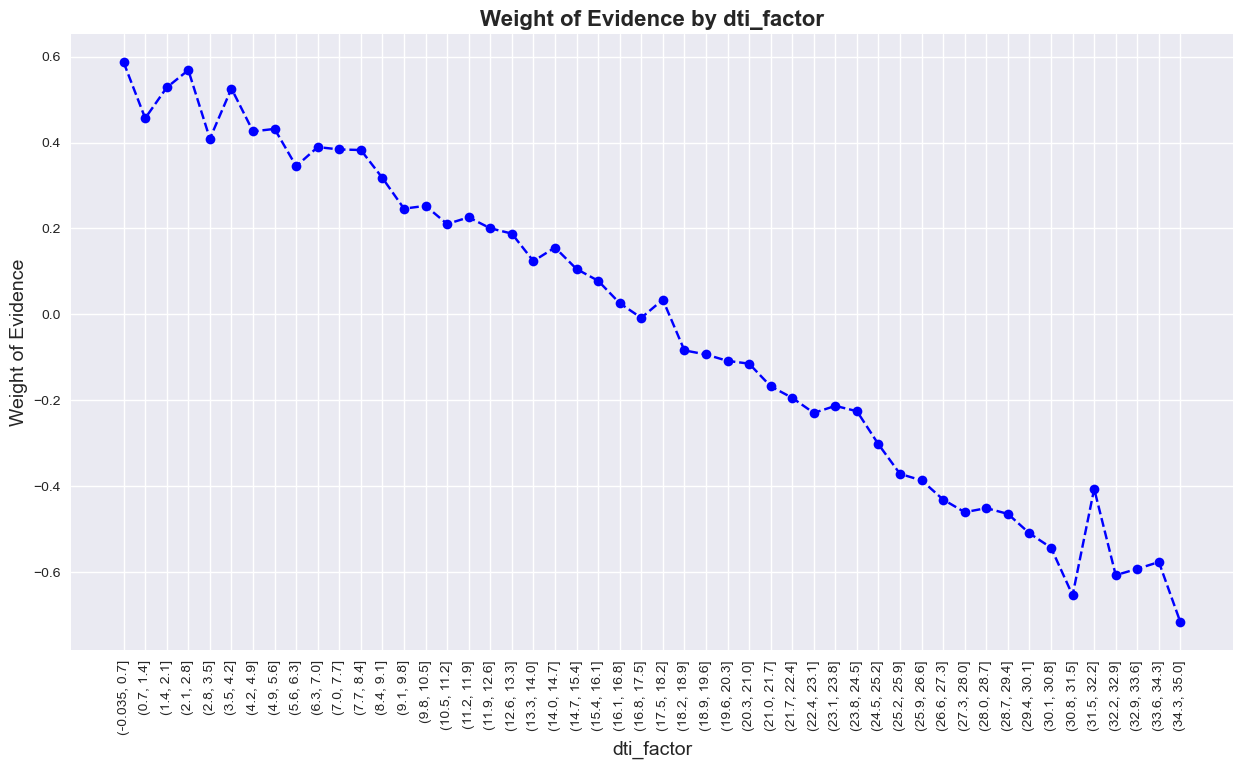

In [192]:
plot_by_woe(df_w, 90)

In [193]:
df_pre_X['dti:<=5.6'] = np.where((df_pre_X['dti'] <= 5.6), 1, 0)
df_pre_X['dti:5.6-9.1'] = np.where((df_pre_X['dti'] > 5.6) & (df_pre_X['dti'] <= 9.1), 1, 0)
df_pre_X['dti:9.1-13.3'] = np.where((df_pre_X['dti'] > 9.1) & (df_pre_X['dti'] <= 13.3), 1, 0)
df_pre_X['dti:13.3-16.1'] = np.where((df_pre_X['dti'] > 13.3) & (df_pre_X['dti'] <= 16.1), 1, 0)
df_pre_X['dti:16.1-18.2'] = np.where((df_pre_X['dti'] > 16.1) & (df_pre_X['dti'] <= 18.2), 1, 0)
df_pre_X['dti:18.2-21'] = np.where((df_pre_X['dti'] > 18.2) & (df_pre_X['dti'] <= 21), 1, 0)
df_pre_X['dti:21-24.5'] = np.where((df_pre_X['dti'] > 21) & (df_pre_X['dti'] <= 24.5), 1, 0)
df_pre_X['dti:24.5-26.6'] = np.where((df_pre_X['dti'] > 24.5) & (df_pre_X['dti'] <= 26.6), 1, 0)
df_pre_X['dti:26.6-35'] = np.where((df_pre_X['dti'] > 26.6) & (df_pre_X['dti'] <= 35), 1, 0)
df_pre_X['dti:>35'] = np.where((df_pre_X['dti'] > 35), 1, 0)

In [194]:
feat_info('mths_since_last_record')

The number of months since the last public record.


In [195]:
df_pre_X['mths_since_last_record'].isnull().sum()  # Too many nulls

159576

In [196]:
df_pre_X_temp = df_pre_X[pd.notnull(df_pre_X['mths_since_last_record'])]
df_pre_X_temp['mths_since_last_record_factor'] = pd.cut(df_pre_X_temp['mths_since_last_record'], 50)
df_w = woe_ordered_continuous(df_pre_X_temp, 'mths_since_last_record_factor', df_pre_y[df_pre_X_temp.index])
df_w

C:\Users\m10sa\AppData\Local\Temp\ipykernel_5912\2075053073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_X_temp['mths_since_last_record_factor'] = pd.cut(df_pre_X_temp['mths_since_last_record'], 50)
C:\Users\m10sa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    968   0.750000    0.044064   726.0  242.0   
1                   (2.58, 5.16]     32   0.656250    0.001457    21.0   11.0   
2                   (5.16, 7.74]     41   0.804878    0.001866    33.0    8.0   
3                  (7.74, 10.32]     69   0.782609    0.003141    54.0   15.0   
4                  (10.32, 12.9]     63   0.714286    0.002868    45.0   18.0   
5                  (12.9, 15.48]     98   0.785714    0.004461    77.0   21.0   
6                 (15.48, 18.06]    116   0.706897    0.005280    82.0   34.0   
7                 (18.06, 20.64]     82   0.804878    0.003733    66.0   16.0   
8                 (20.64, 23.22]    169   0.751479    0.007693   127.0   42.0   
9                  (23.22, 25.8]    103   0.699029    0.004689    72.0   31.0   
10                 (25.8, 28.38]    221   0.723982    0.010060   160.0   61.0   
11                (28.38, 30.96]    195   0.789744    0.008877   154.0   41.0   
12                (30.96, 33.54]    269   0.788104    0.012245   212.0   57.0   
13                (33.54, 36.12]    293   0.778157    0.013338   228.0   65.0   
14                 (36.12, 38.7]    232   0.831897    0.010561   193.0   39.0   
15                 (38.7, 41.28]    367   0.798365    0.016706   293.0   74.0   
16                (41.28, 43.86]    314   0.805732    0.014294   253.0   61.0   
17                (43.86, 46.44]    464   0.810345    0.021122   376.0   88.0   
18                (46.44, 49.02]    506   0.830040    0.023034   420.0   86.0   
19                 (49.02, 51.6]    379   0.799472    0.017252   303.0   76.0   
20                 (51.6, 54.18]    650   0.812308    0.029588   528.0  122.0   
21                (54.18, 56.76]    445   0.800000    0.020257   356.0   89.0   
22                (56.76, 59.34]    674   0.799703    0.030681   539.0  135.0   
23                (59.34, 61.92]    463   0.775378    0.021076   359.0  104.0   
24                 (61.92, 64.5]    663   0.796380    0.030180   528.0  135.0   
25                 (64.5, 67.08]    651   0.820276    0.029634   534.0  117.0   
26                (67.08, 69.66]    424   0.794811    0.019301   337.0   87.0   
27                (69.66, 72.24]    643   0.788491    0.029270   507.0  136.0   
28                (72.24, 74.82]    365   0.775342    0.016615   283.0   82.0   
29                 (74.82, 77.4]    550   0.758182    0.025036   417.0  133.0   
30                 (77.4, 79.98]    379   0.791557    0.017252   300.0   79.0   
31                (79.98, 82.56]    567   0.756614    0.025810   429.0  138.0   
32                (82.56, 85.14]    482   0.763485    0.021941   368.0  114.0   
33                (85.14, 87.72]    494   0.728745    0.022487   360.0  134.0   
34                 (87.72, 90.3]    654   0.776758    0.029771   508.0  146.0   
35                 (90.3, 92.88]    511   0.771037    0.023261   394.0  117.0   
36                (92.88, 95.46]    817   0.752754    0.037190   615.0  202.0   
37                (95.46, 98.04]    870   0.755172    0.039603   657.0  213.0   
38               (98.04, 100.62]    596   0.750000    0.027130   447.0  149.0   
39               (100.62, 103.2]    961   0.749220    0.043745   720.0  241.0   
40               (103.2, 105.78]    722   0.765928    0.032866   553.0  169.0   
41              (105.78, 108.36]   1047   0.749761    0.047660   785.0  262.0   
42              (108.36, 110.94]    712   0.771067    0.032411   549.0  163.0   
43              (110.94, 113.52]    955   0.758115    0.043472   724.0  231.0   
44               (113.52, 116.1]    932   0.746781    0.042425   696.0  236.0   
45               (116.1, 118.68]    576   0.779514    0.026220   449.0  127.0   
46              (118.68, 121.26]    183   0.743169    0.008330   136.0   47.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

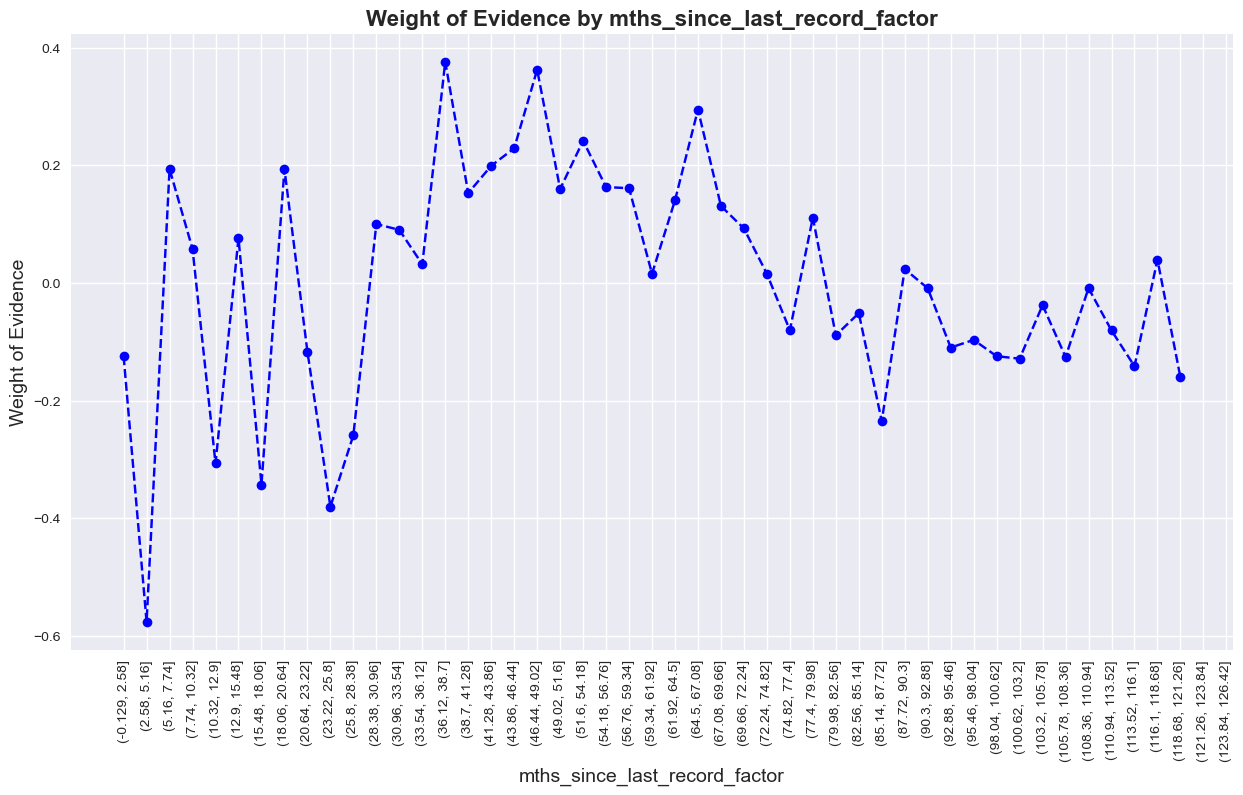

In [197]:
plot_by_woe(df_w, 90)

There are too many nulls and there are no relationships between 'mths_since_last_record' and 'WoE'. Hence, we __do not to include the mths_since_last_record variable in the PD model__.

### Preprocessing the Test Dataset

In [198]:
# We need to create the same dummy variables for the X_test dataframe 
df_inputs_train = df_pre_X
df_targets_train = df_pre_y

# We let df_pre_X be X_test and df_pre_y be Y_test and rerun the code
# df_inputs_test = df_pre_X 
# df_targets_test = df_pre_y

In [199]:
df_inputs_train.to_csv('df_inputs_train.csv')
df_targets_train.to_csv('df_targets_train.csv')

# df_inputs_test.to_csv('df_inputs_test.csv')
# df_targets_test.to_csv('df_targets_test.csv')